In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_23_24_sales = pd.read_excel('SECONDARY YTD 23-24 Fragrance - Till February.xlsx', sheet_name="BASE DATA")

In [3]:
df_22_23_sales = pd.read_excel('Sales Data - Pivot (FY 16-23).xlsx', sheet_name="FY 22-23")

In [4]:
df_22_23_sales_lfs = df_22_23_sales[df_22_23_sales['Channel-1'] == 'LFS']

In [5]:
#To get the data of the LFS from the Channel-2 column from the data with all the columns
df_23_24_sales_lfs = df_23_24_sales[df_23_24_sales['Channel-2'] == 'LFS']

In [6]:
df_22_23_sales_lfs.shape

(196694, 23)

In [7]:
df_23_24_sales_lfs.shape

(182374, 23)

In [8]:
# Assuming df_22_23_sales_lfs and df_23_24_sales_lfs are your dataframes
combined_df_lfs = pd.concat([df_22_23_sales_lfs, df_23_24_sales_lfs], ignore_index=True)

In [9]:
combined_df_lfs.shape

(379068, 25)

In [10]:
combined_df_lfs['Gender'].value_counts()

Gender
G    207062
L    154384
P     16987
U       635
Name: count, dtype: int64

In [11]:
combined_df_lfs['Brand'].value_counts()

Brand
TF    375396
Tf      2520
FP      1152
Name: count, dtype: int64

In [12]:
demo_brand_check = df_23_24_sales_lfs[df_23_24_sales_lfs['Brand'] == 'Tf']

In [13]:
df_23_24_sales_lfs['Brand'] = df_23_24_sales_lfs['Brand'].replace('Tf', 'TF')

In [14]:
df_23_24_sales_lfs['ShiptopartyStateCode'].value_counts(1)

ShiptopartyStateCode
MAHARASTRA           0.217383
KARNATAKA            0.120872
WEST BENGAL          0.108475
DELHI                0.068732
UTTAR PRADESH        0.062076
WESTBENGAL           0.045379
GUJARAT              0.044206
Telangana            0.040093
HARYANA              0.034029
TAMIL NADU           0.030322
UTTARPRADESH         0.024982
MADHYA PRADESH       0.022317
ORISSA               0.018111
ANDHRA PRADESH       0.017327
RAJASTHAN            0.016307
TELANGANA            0.014114
BIHAR                0.014037
TAMILNADU            0.012716
PUNJAB               0.012189
ASSAM                0.011899
Kerala               0.011827
MADHYAPRADESH        0.008833
JHARKHAND            0.008718
CHATTISGARH          0.008707
Mumbai               0.006004
Goa                  0.005856
KERALA               0.004644
UTTARAKHAND          0.003361
GOA                  0.002149
JAMMU & KASHMIR      0.001607
Meghalaya            0.001404
MEGHALAYA            0.000658
Arunachal Pradesh  

In [15]:
combined_df_lfs.head()

Year      Month Month Key QTR Region         Invoice Date   Material  \
0  2022-23 2022-04-01       Apr  Q1  South  2022-04-01 00:00:00   NFM03DQ1   
1  2022-23 2022-04-01       Apr  Q1  South  2022-04-01 00:00:00  NDFM13PD1   
2  2022-23 2022-04-01       Apr  Q1  South  2022-04-01 00:00:00   NFM05DQ1   
3  2022-23 2022-04-01       Apr  Q1   West  2022-04-01 00:00:00    FW19PC1   
4  2022-23 2022-04-01       Apr  Q1  South  2022-04-01 00:00:00  NEFW05PGC   

   Quantity Gender Brand  ... Gross UCP  Net UCP Bill to Party City  \
0       4.0      G    TF  ...    1996.0   1996.0          Bangalore   
1       1.0      G    TF  ...     595.0    595.0          Hyderabad   
2       1.0      G    TF  ...     499.0    499.0          Hyderabad   
3       1.0      L    TF  ...    1595.0   1595.0             Mumbai   
4       1.0      L    TF  ...    2295.0   2295.0          Bangalore   

   ShiptopartyStateCode  Billing grp  Channel-1             Variant Name  \
0  KARNATAKA                     LFS        LFS  3. 150 M Amalfi Men deo   
1             TELANGANA          LFS        LFS            3. 20 M Verge   
2             TELANGANA          LFS        LFS  8. Deo M C. Road 150 ml   
3            MAHARASTRA          LFS        LFS  3. Tales W Ibiza 100 ml   
4  KARNATAKA                     LFS        LFS        7. 100 W Pristine   

          Collection Channel-2 Varient Name2  
0     g. Premium Deo       NaN           NaN  
1   f. Classic 20 ml       NaN           NaN  
2    g. Escapade Deo       NaN           NaN  
3     I. Tales 100ml       NaN           NaN  
4  a. Classic 100 ml       NaN           NaN  

[5 rows x 25 columns]

In [16]:
combined_df_lfs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379068 entries, 0 to 379067
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Year                  379068 non-null  object        
 1   Month                 379068 non-null  datetime64[ns]
 2   Month Key             379068 non-null  object        
 3   QTR                   379068 non-null  object        
 4   Region                364711 non-null  object        
 5   Invoice Date          379068 non-null  object        
 6   Material              379068 non-null  object        
 7   Quantity              379068 non-null  float64       
 8   Gender                379068 non-null  object        
 9   Brand                 379068 non-null  object        
 10  Channel               379068 non-null  object        
 11  Franchisee store      360949 non-null  object        
 12  Bill to Party code    379068 non-null  object        
 13 

In [17]:
column_names = combined_df_lfs.columns.tolist()
print(column_names)


['Year', 'Month', 'Month Key', 'QTR', 'Region', 'Invoice Date', 'Material', 'Quantity', 'Gender', 'Brand', 'Channel', 'Franchisee store', 'Bill to Party code', 'Bill to Party Name', 'MRP', 'Gross UCP', ' Net UCP', 'Bill to Party City', 'ShiptopartyStateCode', 'Billing grp', 'Channel-1', 'Variant Name', 'Collection', 'Channel-2', 'Varient Name2']


In [18]:
filtered_df = combined_df_lfs[(combined_df_lfs['Varient Name2'].isnull()) & (combined_df_lfs['Variant Name'].notnull())]
filtered_df.shape

(196694, 25)

In [19]:
df_23_24_sales_lfs['Bill to Party City'].value_counts(1) #Location where billed party is located

Bill to Party City
Kolkata      0.113624
Mumbai       0.110515
Bangalore    0.105333
Pune         0.066528
Delhi        0.057547
               ...   
Hadapsard    0.000027
ITANAGAR     0.000022
Kompally     0.000022
Rajkot       0.000022
DIMAPUR      0.000016
Name: proportion, Length: 139, dtype: float64

In [20]:
mean_value = combined_df_lfs[' Net UCP'].mean()
median_value = combined_df_lfs[' Net UCP'].median()
print(mean_value, median_value)

1776.897975244547 1695.75


<Axes: xlabel=' Net UCP', ylabel='Count'>

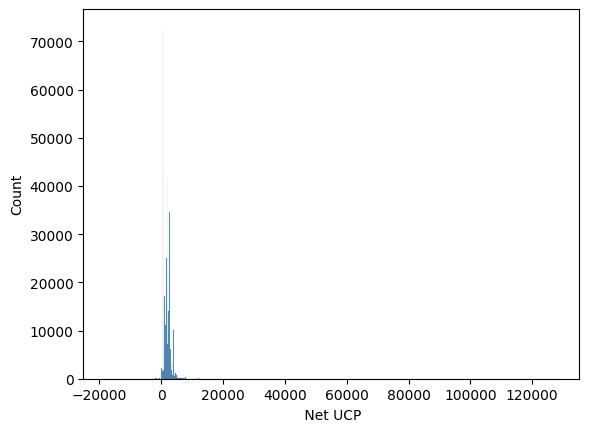

In [21]:
sns.histplot(data=combined_df_lfs, x=' Net UCP', bins=1000)

Column: MRP
Skewness: 0.36956217859151236


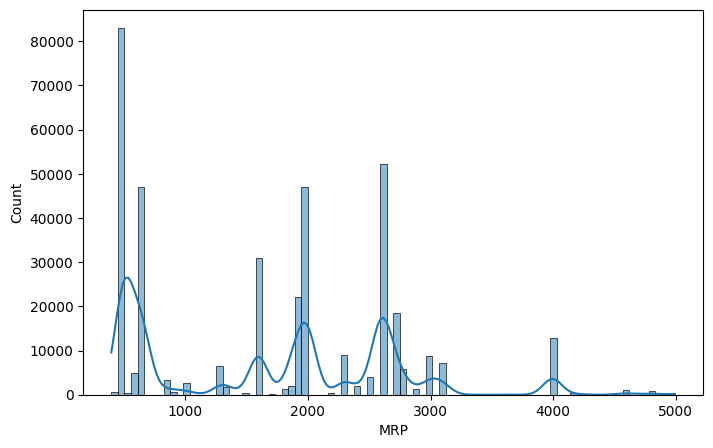

Column: Gross UCP
Skewness: 13.478183885335262


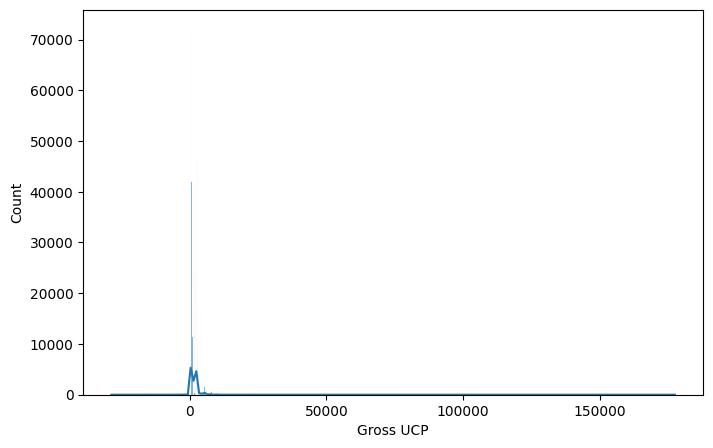

Column:  Net UCP
Skewness: 10.408414430341384


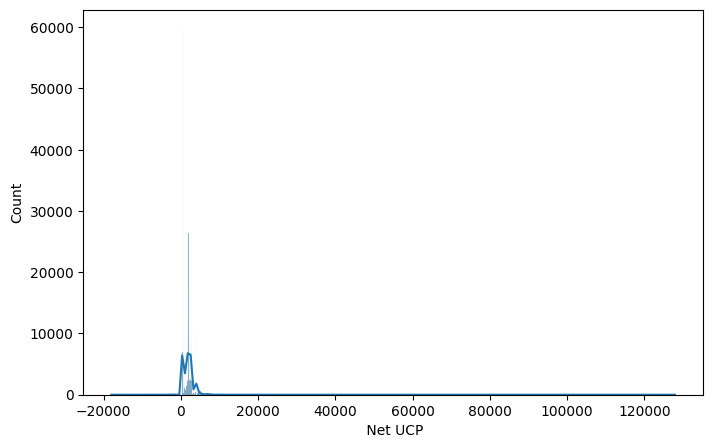

Column: Quantity
Skewness: 29.650319863040373


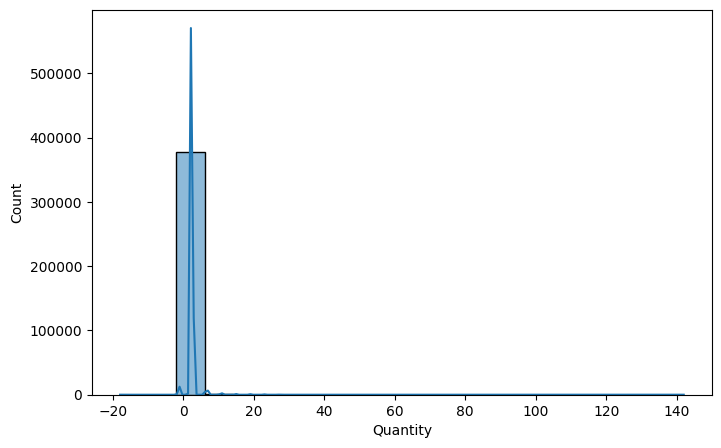

In [22]:
from scipy.stats import skew
columns_to_check = ['MRP', 'Gross UCP', ' Net UCP', 'Quantity']
for col in columns_to_check:
    print(f"Column: {col}")
    print(f"Skewness: {skew(combined_df_lfs[col])}")
    plt.figure(figsize=(8, 5))
    sns.histplot(combined_df_lfs[col], kde=True)
    plt.show()

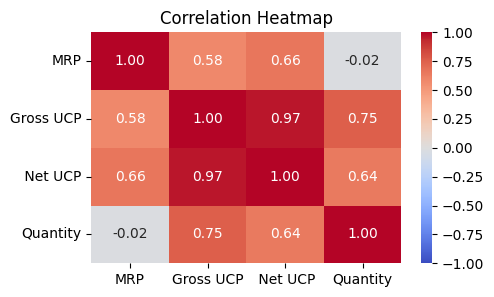

In [23]:
#CORRELATION MATRIX
corr_matrix = combined_df_lfs[columns_to_check].corr()
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

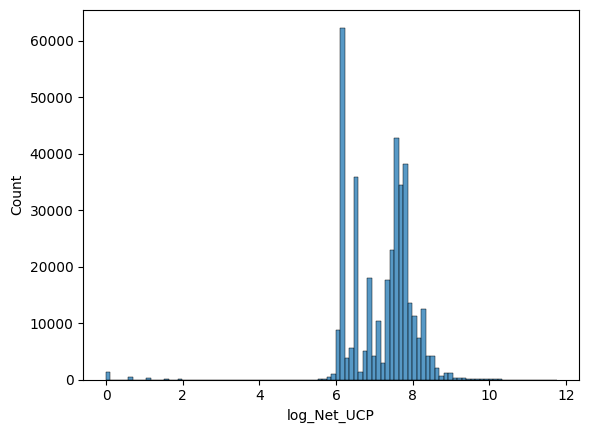

In [24]:
#LOG TRANSFORMATION

df_transformed = combined_df_lfs.copy()

# Apply log transformation (natural logarithm) on the 'Net UCP' column
df_transformed['log_Net_UCP'] = np.log(df_transformed[' Net UCP'] + 1)  # Add 1 to avoid log of zero

# Generate histogram using the transformed column
sns.histplot(data=df_transformed, x='log_Net_UCP', bins=100)

# Display the plot
plt.show()


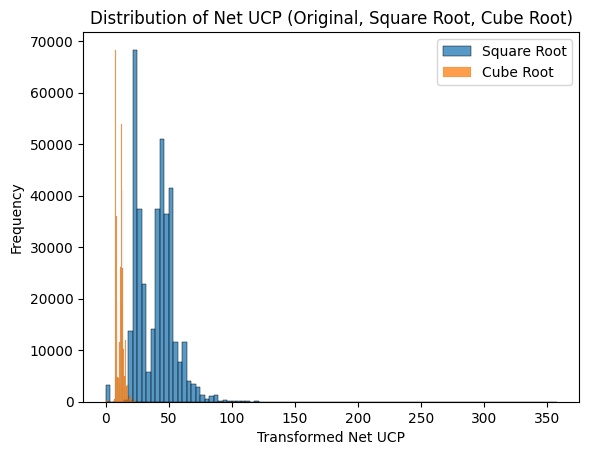

In [25]:
#SQUARE AND CUBE ROOT TRANSFORMATION
import pandas as pd
import seaborn as sns
import numpy as np  # Needed for square root operation

# Assuming 'combined_df_lfs' is your DataFrame

# Create a copy of the DataFrame for transformations
df_transformed2 = df_transformed.copy()

# Square Root Transformation
# Apply square root on 'Net UCP' (avoiding negative values)
df_transformed2['sqrt_Net_UCP'] = np.sqrt(np.where(df_transformed2[' Net UCP'] >= 0, df_transformed2[' Net UCP'], 0))  

# Generate histogram using square root transformed column
sns.histplot(data=df_transformed2, x='sqrt_Net_UCP', bins=100, label='Square Root')

# Cube Root Transformation
# Apply cube root on 'Net UCP' (avoiding negative values)
df_transformed2['cube_root_Net_UCP'] = np.cbrt(np.where(df_transformed2[' Net UCP'] >= 0, df_transformed2[' Net UCP'], 0))  

# Generate histogram using cube root transformed column
sns.histplot(data=df_transformed2, x='cube_root_Net_UCP', bins=100, label='Cube Root')

# Add labels and title
plt.xlabel('Transformed Net UCP')
plt.ylabel('Frequency')
plt.title('Distribution of Net UCP (Original, Square Root, Cube Root)')
plt.legend()  # Show labels for each histogram

# Display the plot
plt.show()


In [26]:
df_transformed2.head()

Year      Month Month Key QTR Region         Invoice Date   Material  \
0  2022-23 2022-04-01       Apr  Q1  South  2022-04-01 00:00:00   NFM03DQ1   
1  2022-23 2022-04-01       Apr  Q1  South  2022-04-01 00:00:00  NDFM13PD1   
2  2022-23 2022-04-01       Apr  Q1  South  2022-04-01 00:00:00   NFM05DQ1   
3  2022-23 2022-04-01       Apr  Q1   West  2022-04-01 00:00:00    FW19PC1   
4  2022-23 2022-04-01       Apr  Q1  South  2022-04-01 00:00:00  NEFW05PGC   

   Quantity Gender Brand  ...  ShiptopartyStateCode Billing grp Channel-1  \
0       4.0      G    TF  ...  KARNATAKA                    LFS       LFS   
1       1.0      G    TF  ...             TELANGANA         LFS       LFS   
2       1.0      G    TF  ...             TELANGANA         LFS       LFS   
3       1.0      L    TF  ...            MAHARASTRA         LFS       LFS   
4       1.0      L    TF  ...  KARNATAKA                    LFS       LFS   

              Variant Name         Collection  Channel-2  Varient Name2  \
0  3. 150 M Amalfi Men deo     g. Premium Deo        NaN            NaN   
1            3. 20 M Verge   f. Classic 20 ml        NaN            NaN   
2  8. Deo M C. Road 150 ml    g. Escapade Deo        NaN            NaN   
3  3. Tales W Ibiza 100 ml     I. Tales 100ml        NaN            NaN   
4        7. 100 W Pristine  a. Classic 100 ml        NaN            NaN   

  log_Net_UCP sqrt_Net_UCP cube_root_Net_UCP  
0    7.599401    44.676616         12.590805  
1    6.390241    24.392622          8.410833  
2    6.214608    22.338308          7.931710  
3    7.375256    39.937451         11.683875  
4    7.738924    47.906158         13.190489  

[5 rows x 28 columns]

Column: MRP
Skewness: 0.36956217859151236


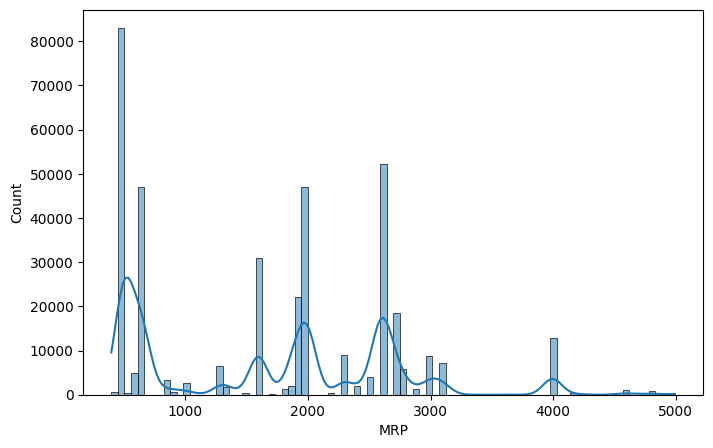

Column: Gross UCP
Skewness: 13.478183885335262


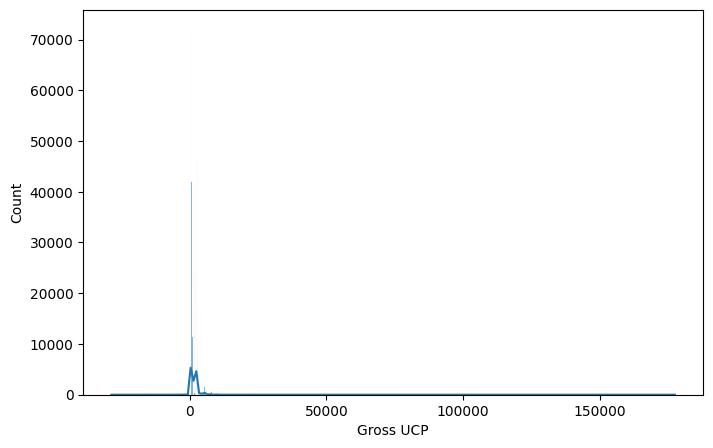

Column:  Net UCP
Skewness: 10.408414430341384


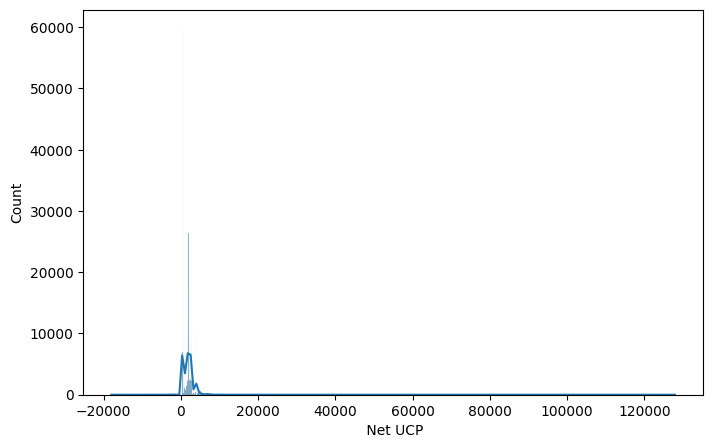

Column: Quantity
Skewness: 29.650319863040373


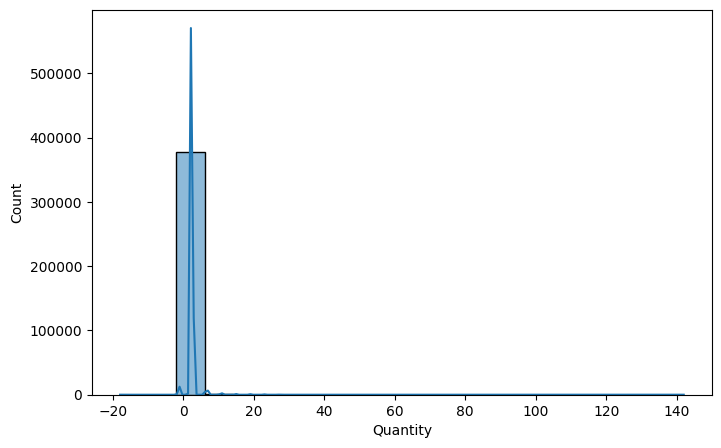

Column: log_Net_UCP
Skewness: nan


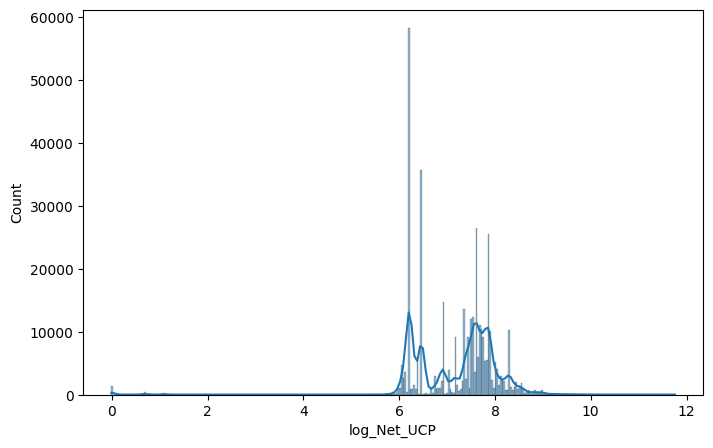

Column: sqrt_Net_UCP
Skewness: 0.873836603794945


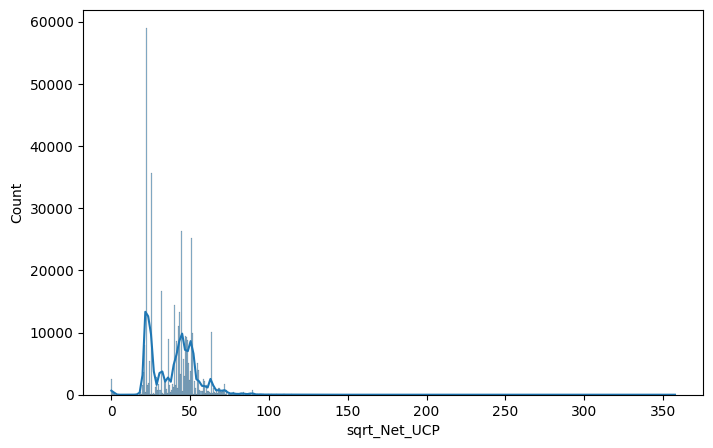

Column: cube_root_Net_UCP
Skewness: 0.053846002086825905


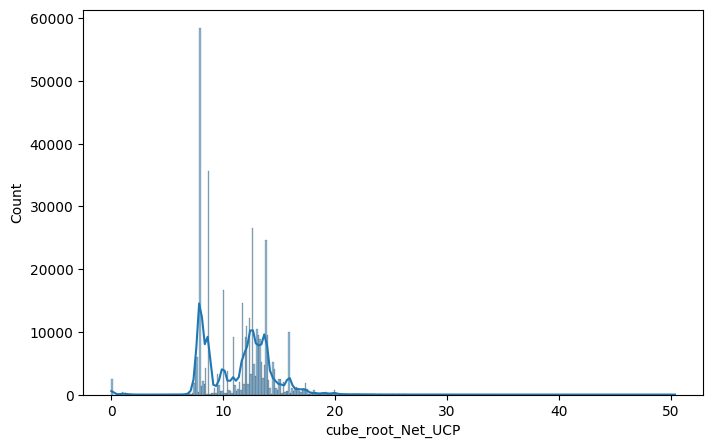

In [27]:
columns_to_check = ['MRP', 'Gross UCP', ' Net UCP', 'Quantity','log_Net_UCP','sqrt_Net_UCP', 'cube_root_Net_UCP']
for col in columns_to_check:
    print(f"Column: {col}")
    print(f"Skewness: {skew(df_transformed2[col])}")
    plt.figure(figsize=(8, 5))
    sns.histplot(df_transformed2[col], kde=True)
    plt.show()

In [28]:
#Reason of Skewness == nan
#Missing values identification
df_transformed2['log_Net_UCP'].isnull().sum()

1131

In [29]:
df_transformed2.dropna(subset=['log_Net_UCP'], inplace=True)

In [30]:
df_transformed2[np.isinf(df_transformed2['log_Net_UCP'])]

Year      Month Month Key QTR Region         Invoice Date  \
321283  2023-24 2023-11-01       Nov  Q3  North  2023-11-11 00:00:00   

         Material  Quantity Gender Brand  ... ShiptopartyStateCode  \
321283  NEFW13PD1      -1.0      L    TF  ...                DELHI   

       Billing grp Channel-1 Variant Name     Collection  Channel-2  \
321283         LFS       NaN          NaN  Classic 20 ml        LFS   

        Varient Name2 log_Net_UCP sqrt_Net_UCP cube_root_Net_UCP  
321283     20 W Sheer        -inf          0.0               0.0  

[1 rows x 28 columns]

In [31]:
df_transformed2 = df_transformed2[~np.isinf(df_transformed2['log_Net_UCP'])]


In [32]:
df_transformed2.isna().sum()

Year                         0
Month                        0
Month Key                    0
QTR                          0
Region                   14313
Invoice Date                 0
Material                     0
Quantity                     0
Gender                       0
Brand                        0
Channel                      0
Franchisee store         18064
Bill to Party code           0
Bill to Party Name           0
MRP                          0
Gross UCP                    0
 Net UCP                     0
Bill to Party City           0
ShiptopartyStateCode         0
Billing grp                  0
Channel-1               181832
Variant Name            181832
Collection                   0
Channel-2               196104
Varient Name2           196104
log_Net_UCP                  0
sqrt_Net_UCP                 0
cube_root_Net_UCP            0
dtype: int64

In [33]:
(df_transformed2['log_Net_UCP'] == 0).sum()
df_transformed2 = df_transformed2[df_transformed2['log_Net_UCP'] != 0]

In [34]:
df_transformed2 = df_transformed2.dropna(subset=['log_Net_UCP'])

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias=False)
df_poly = poly.fit_transform(df_transformed2[['MRP', 'Gross UCP', ' Net UCP', 'Quantity','log_Net_UCP', 'sqrt_Net_UCP', 'cube_root_Net_UCP']])
df_poly = pd.DataFrame(df_poly, columns=poly.get_feature_names_out(['MRP', 'Gross UCP', ' Net UCP', 'Quantity','log_Net_UCP', 'sqrt_Net_UCP', 'cube_root_Net_UCP']))
df_poly.head()

MRP  Gross UCP   Net UCP  Quantity  log_Net_UCP  sqrt_Net_UCP  \
0   499.0     1996.0    1996.0       4.0     7.599401     44.676616   
1   595.0      595.0     595.0       1.0     6.390241     24.392622   
2   499.0      499.0     499.0       1.0     6.214608     22.338308   
3  1595.0     1595.0    1595.0       1.0     7.375256     39.937451   
4  2295.0     2295.0    2295.0       1.0     7.738924     47.906158   

   cube_root_Net_UCP      MRP^2  MRP Gross UCP  MRP  Net UCP  ...  \
0          12.590805   249001.0       996004.0      996004.0  ...   
1           8.410833   354025.0       354025.0      354025.0  ...   
2           7.931710   249001.0       249001.0      249001.0  ...   
3          11.683875  2544025.0      2544025.0     2544025.0  ...   
4          13.190489  5267025.0      5267025.0     5267025.0  ...   

   log_Net_UCP sqrt_Net_UCP^3 cube_root_Net_UCP  \
0                                  8.532449e+06   
1                                  7.800665e+05   
2                                  5.494541e+05   
3                                  5.489149e+06   
4                                  1.122317e+07   

   log_Net_UCP sqrt_Net_UCP^2 cube_root_Net_UCP^2  \
0                                    2.404623e+06   
1                                    2.689751e+05   
2                                    1.950958e+05   
3                                    1.605874e+06   
4                                    3.090189e+06   

   log_Net_UCP sqrt_Net_UCP cube_root_Net_UCP^3  \
0                                 677673.005343   
1                                  92745.460797   
2                                  69273.090772   
3                                 469805.522536   
4                                 850853.134069   

   log_Net_UCP cube_root_Net_UCP^4  sqrt_Net_UCP^5  \
0                    190982.436652    1.779924e+08   
1                     31979.610436    8.635598e+06   
2                     24596.943345    5.562261e+06   
3                    137443.646762    1.016019e+08   
4                    234274.033346    2.523229e+08   

   sqrt_Net_UCP^4 cube_root_Net_UCP  sqrt_Net_UCP^3 cube_root_Net_UCP^2  \
0                      5.016197e+07                        1.413669e+07   
1                      2.977645e+06                        1.026723e+06   
2                      1.975004e+06                        7.012688e+05   
3                      2.972407e+07                        8.695906e+06   
4                      6.947464e+07                        1.912916e+07   

   sqrt_Net_UCP^2 cube_root_Net_UCP^3  sqrt_Net_UCP cube_root_Net_UCP^4  \
0                           3984016.0                      1.122779e+06   
1                            354025.0                      1.220715e+05   
2                            249001.0                      8.841331e+04   
3                           2544025.0                      7.442656e+05   
4                           5267025.0                      1.450223e+06   

   cube_root_Net_UCP^5  
0        316422.648694  
1         42091.552342  
2         31393.102838  
3        217738.125106  
4        399304.756133  

[5 rows x 791 columns]

In [36]:
from scipy.stats import skew

skewness_values = {}
for col in df_poly.columns:
    col_skewness = skew(df_poly[col])
    skewness_values[col] = col_skewness
    print(f"Column: {col}")
    print(f"Skewness: {col_skewness}")

# Find the minimum absolute skewness value
min_abs_skewness_col = min(skewness_values, key=lambda k: abs(skewness_values[k]))
min_abs_skewness_value = skewness_values[min_abs_skewness_col]

print(f"\nColumn with minimum absolute skewness: {min_abs_skewness_col}")
print(f"Minimum absolute skewness value: {min_abs_skewness_value}")


Column: MRP
Skewness: 0.36582505639917196
Column: Gross UCP
Skewness: 13.79732151746665
Column:  Net UCP
Skewness: 10.779967984196189
Column: Quantity
Skewness: 30.559208764764673
Column: log_Net_UCP
Skewness: -1.09339900142393
Column: sqrt_Net_UCP
Skewness: 1.0026494546114932
Column: cube_root_Net_UCP
Skewness: 0.3934229683027011
Column: MRP^2
Skewness: 1.593912014396163
Column: MRP Gross UCP
Skewness: 7.523788687531
Column: MRP  Net UCP
Skewness: 5.965693051864139
Column: MRP Quantity
Skewness: 13.79732151746665
Column: MRP log_Net_UCP
Skewness: 0.48006806736238217
Column: MRP sqrt_Net_UCP
Skewness: 1.0552097683406312
Column: MRP cube_root_Net_UCP
Skewness: 0.7530731098089269
Column: Gross UCP^2
Skewness: 177.23543745561375
Column: Gross UCP  Net UCP
Skewness: 188.69642639032813
Column: Gross UCP Quantity
Skewness: 167.01816130740315
Column: Gross UCP log_Net_UCP
Skewness: 21.17119011299718
Column: Gross UCP sqrt_Net_UCP
Skewness: 86.57744636053157
Column: Gross UCP cube_root_Net_UCP

In [37]:
df_transformed2.head()

Year      Month Month Key QTR Region         Invoice Date   Material  \
0  2022-23 2022-04-01       Apr  Q1  South  2022-04-01 00:00:00   NFM03DQ1   
1  2022-23 2022-04-01       Apr  Q1  South  2022-04-01 00:00:00  NDFM13PD1   
2  2022-23 2022-04-01       Apr  Q1  South  2022-04-01 00:00:00   NFM05DQ1   
3  2022-23 2022-04-01       Apr  Q1   West  2022-04-01 00:00:00    FW19PC1   
4  2022-23 2022-04-01       Apr  Q1  South  2022-04-01 00:00:00  NEFW05PGC   

   Quantity Gender Brand  ...  ShiptopartyStateCode Billing grp Channel-1  \
0       4.0      G    TF  ...  KARNATAKA                    LFS       LFS   
1       1.0      G    TF  ...             TELANGANA         LFS       LFS   
2       1.0      G    TF  ...             TELANGANA         LFS       LFS   
3       1.0      L    TF  ...            MAHARASTRA         LFS       LFS   
4       1.0      L    TF  ...  KARNATAKA                    LFS       LFS   

              Variant Name         Collection  Channel-2  Varient Name2  \
0  3. 150 M Amalfi Men deo     g. Premium Deo        NaN            NaN   
1            3. 20 M Verge   f. Classic 20 ml        NaN            NaN   
2  8. Deo M C. Road 150 ml    g. Escapade Deo        NaN            NaN   
3  3. Tales W Ibiza 100 ml     I. Tales 100ml        NaN            NaN   
4        7. 100 W Pristine  a. Classic 100 ml        NaN            NaN   

  log_Net_UCP sqrt_Net_UCP cube_root_Net_UCP  
0    7.599401    44.676616         12.590805  
1    6.390241    24.392622          8.410833  
2    6.214608    22.338308          7.931710  
3    7.375256    39.937451         11.683875  
4    7.738924    47.906158         13.190489  

[5 rows x 28 columns]

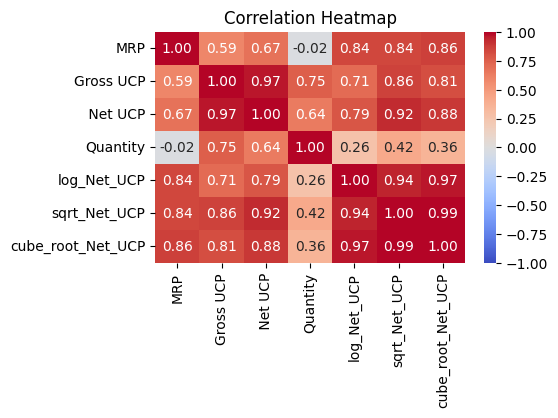

In [38]:
columns_to_check = ['MRP', 'Gross UCP', ' Net UCP', 'Quantity','log_Net_UCP','sqrt_Net_UCP', 'cube_root_Net_UCP']
corr_matrix = df_poly[columns_to_check].corr()
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [39]:
df_transformed2['Collection'].value_counts()

Collection
d. Gift Pack         33149
g. Premium Deo       32685
a. Classic 100 ml    32144
Gift Pack            29360
Classic 100 ml       29221
f. Classic 20 ml     27996
 Premium Deo         25441
Classic 20 ml        23840
e. Aqua              17142
g. Escapade Deo      14011
Classic 50 ml        13915
b. Classic 50 ml     12460
Aqua                 12421
 Escapade Deo        10258
c. Escapade          10159
Escapade              9766
Nox 100 ml            6483
 Deo Bundle Pack      6366
j1. Nox 100 ml        6327
I. Tales 100ml        6165
Noura W 100ml         4973
Nox 20 ml             2640
Noura 20 ml           2581
Tales 100ml           2493
j2. Noura W 100ml     2135
Classic Flanker       1268
h. Fastrack            838
Fastrack               342
Skinn Mist              15
h. Fastrack-Bold         4
x. Bohemian              4
 Bohemian                2
Name: count, dtype: int64

In [40]:
df_transformed2.head()

Year      Month Month Key QTR Region         Invoice Date   Material  \
0  2022-23 2022-04-01       Apr  Q1  South  2022-04-01 00:00:00   NFM03DQ1   
1  2022-23 2022-04-01       Apr  Q1  South  2022-04-01 00:00:00  NDFM13PD1   
2  2022-23 2022-04-01       Apr  Q1  South  2022-04-01 00:00:00   NFM05DQ1   
3  2022-23 2022-04-01       Apr  Q1   West  2022-04-01 00:00:00    FW19PC1   
4  2022-23 2022-04-01       Apr  Q1  South  2022-04-01 00:00:00  NEFW05PGC   

   Quantity Gender Brand  ...  ShiptopartyStateCode Billing grp Channel-1  \
0       4.0      G    TF  ...  KARNATAKA                    LFS       LFS   
1       1.0      G    TF  ...             TELANGANA         LFS       LFS   
2       1.0      G    TF  ...             TELANGANA         LFS       LFS   
3       1.0      L    TF  ...            MAHARASTRA         LFS       LFS   
4       1.0      L    TF  ...  KARNATAKA                    LFS       LFS   

              Variant Name         Collection  Channel-2  Varient Name2  \
0  3. 150 M Amalfi Men deo     g. Premium Deo        NaN            NaN   
1            3. 20 M Verge   f. Classic 20 ml        NaN            NaN   
2  8. Deo M C. Road 150 ml    g. Escapade Deo        NaN            NaN   
3  3. Tales W Ibiza 100 ml     I. Tales 100ml        NaN            NaN   
4        7. 100 W Pristine  a. Classic 100 ml        NaN            NaN   

  log_Net_UCP sqrt_Net_UCP cube_root_Net_UCP  
0    7.599401    44.676616         12.590805  
1    6.390241    24.392622          8.410833  
2    6.214608    22.338308          7.931710  
3    7.375256    39.937451         11.683875  
4    7.738924    47.906158         13.190489  

[5 rows x 28 columns]

In [41]:
df_transformed2['Collection'] = df_transformed2['Collection'].str.strip()

# Create a mapping dictionary to standardize the category names
mapping = {
    'd. Gift Pack': 'Gift Pack',
    'g. Premium Deo': 'Premium Deo',
    'a. Classic 100 ml': 'Classic 100 ml',
    'f. Classic 20 ml': 'Classic 20 ml',
    'b. Classic 50 ml': 'Classic 50 ml',
    'e. Aqua': 'Aqua',
    'g. Escapade Deo': 'Escapade Deo',
    'c. Escapade': 'Escapade',
    'j1. Nox 100 ml': 'Nox 100 ml',
    'I. Tales 100ml': 'Tales 100ml',
    'j2. Noura W 100ml': 'Noura W 100ml',
    'h. Fastrack': 'Fastrack',
    'h. Fastrack-Bold': 'Fastrack-Bold',
    'x. Bohemian': 'Bohemian'
    # Add more mappings as needed
}

# Apply the mapping to the 'Collection' column
df_transformed2['Collection'] = df_transformed2['Collection'].replace(mapping)
# df_transformed2['Collection'] = df_transformed2['Collection'].replace(mapping)

# Aggregate the counts after standardizing the names
# df_aggregated = df_transformed2.groupby('Collection').sum().reset_index()

# Display the aggregated results
# print(df_aggregated)
# df_transformed2.head()
df_transformed2['Collection'].value_counts()

Collection
Gift Pack          62509
Classic 100 ml     61365
Premium Deo        58126
Classic 20 ml      51836
Aqua               29563
Classic 50 ml      26375
Escapade Deo       24269
Escapade           19925
Nox 100 ml         12810
Tales 100ml         8658
Noura W 100ml       7108
Deo Bundle Pack     6366
Nox 20 ml           2640
Noura 20 ml         2581
Classic Flanker     1268
Fastrack            1180
Skinn Mist            15
Bohemian               6
Fastrack-Bold          4
Name: count, dtype: int64

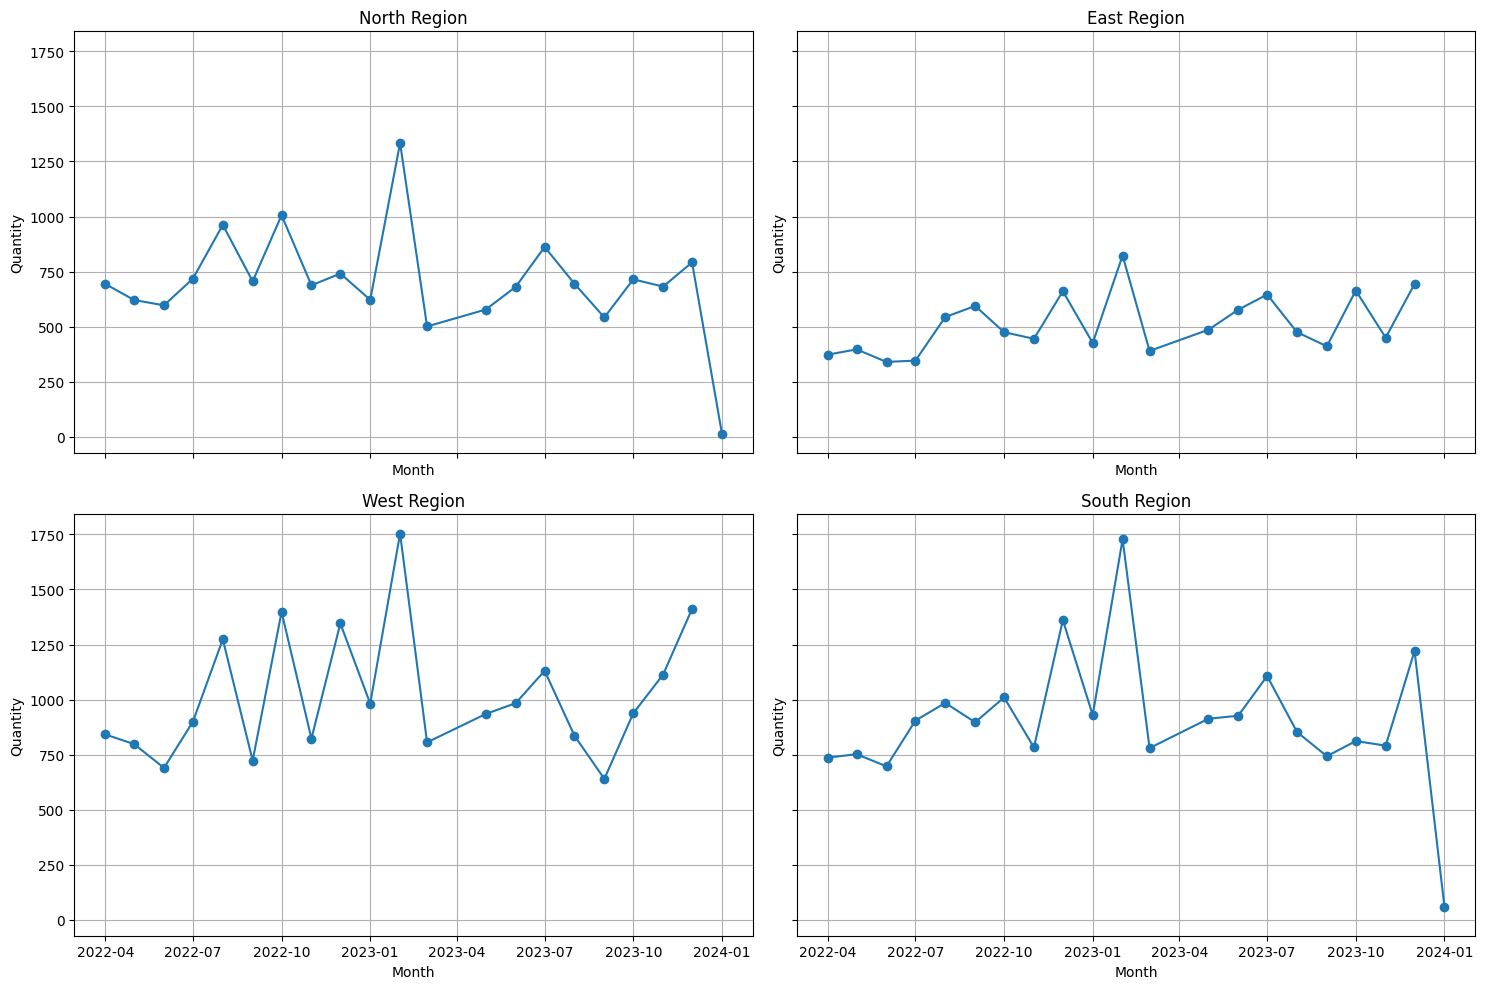

In [42]:
regions = ["North", "East", "West", "South"]

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i, region in enumerate(regions):
    df_region = df_transformed2[(df_transformed2['Region'] == region) & (df_transformed2['Collection']=='Classic 100 ml')]
    df_sales_region = df_region.copy()
    monthly_quantity = df_sales_region.groupby('Month')['Quantity'].sum().reset_index()
    monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]
    
    axs[i].plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['Quantity'], marker='o')
    axs[i].set_title(f'{region} Region')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Quantity')
    axs[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

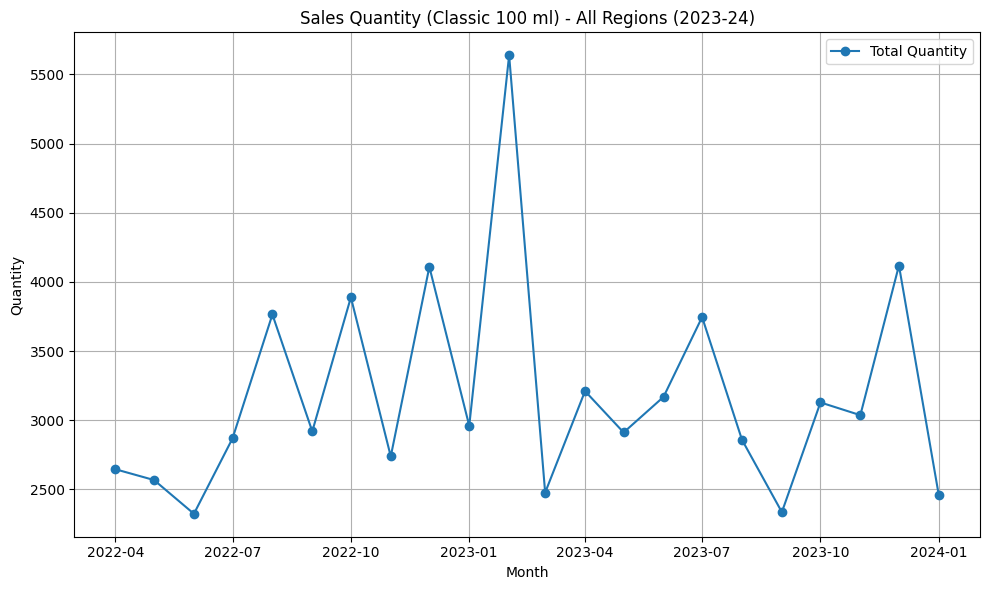

In [43]:
regions = ["North", "East", "West", "South"]

# Create a figure and single axis
fig, ax = plt.subplots(figsize=(10, 6))

# Combine data for all regions
df_all_regions = df_transformed2[(df_transformed2['Collection']=='Classic 100 ml')]
monthly_quantity = df_all_regions.groupby('Month')['Quantity'].sum().reset_index()
monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]

# Plot the combined data
ax.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['Quantity'], marker='o', label='Total Quantity')
ax.set_title('Sales Quantity (Classic 100 ml) - All Regions (2023-24)')
ax.set_xlabel('Month')
ax.set_ylabel('Quantity')
ax.grid(True)

# Add legend for clarity
ax.legend()

plt.tight_layout()
plt.show()


In [44]:
monthly_quantity_1st_day

Month  Quantity
0  2022-04-01    2646.0
1  2022-05-01    2568.0
2  2022-06-01    2324.0
3  2022-07-01    2869.0
4  2022-08-01    3765.0
5  2022-09-01    2920.0
6  2022-10-01    3889.0
7  2022-11-01    2739.0
8  2022-12-01    4109.0
9  2023-01-01    2960.0
10 2023-02-01    5639.0
11 2023-03-01    2477.0
12 2023-04-01    3211.0
13 2023-05-01    2912.0
14 2023-06-01    3169.0
15 2023-07-01    3746.0
16 2023-08-01    2859.0
17 2023-09-01    2336.0
19 2023-10-01    3129.0
21 2023-11-01    3037.0
24 2023-12-01    4119.0
29 2024-01-01    2457.0

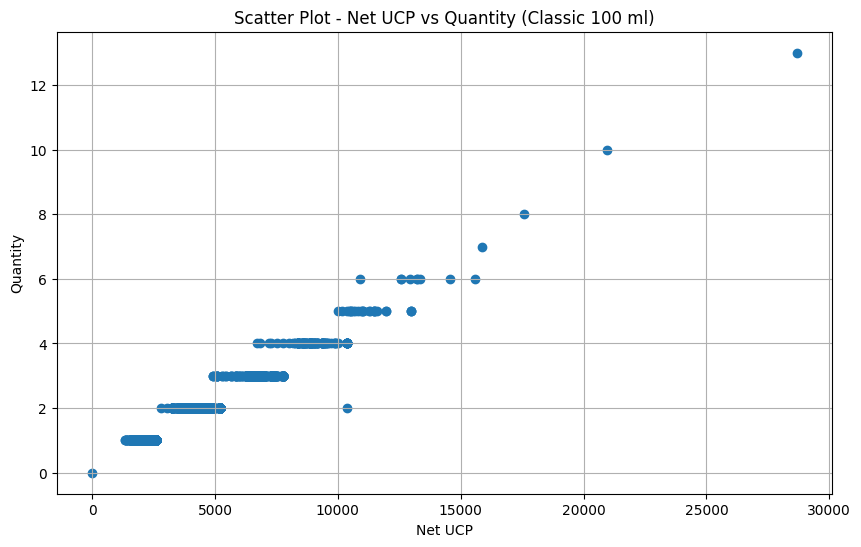

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df_transformed2'

# Filter data for Classic 100 ml collection for the year 2023-24
df_classic_100ml = df_transformed2[(df_transformed2['Year'] == '2023-24') & (df_transformed2['Collection']=='Classic 100 ml')]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_classic_100ml[' Net UCP'], df_classic_100ml['Quantity'], marker='o')
plt.title('Scatter Plot - Net UCP vs Quantity (Classic 100 ml)')
plt.xlabel('Net UCP')
plt.ylabel('Quantity')
plt.grid(True)

# Display the plot
plt.show()


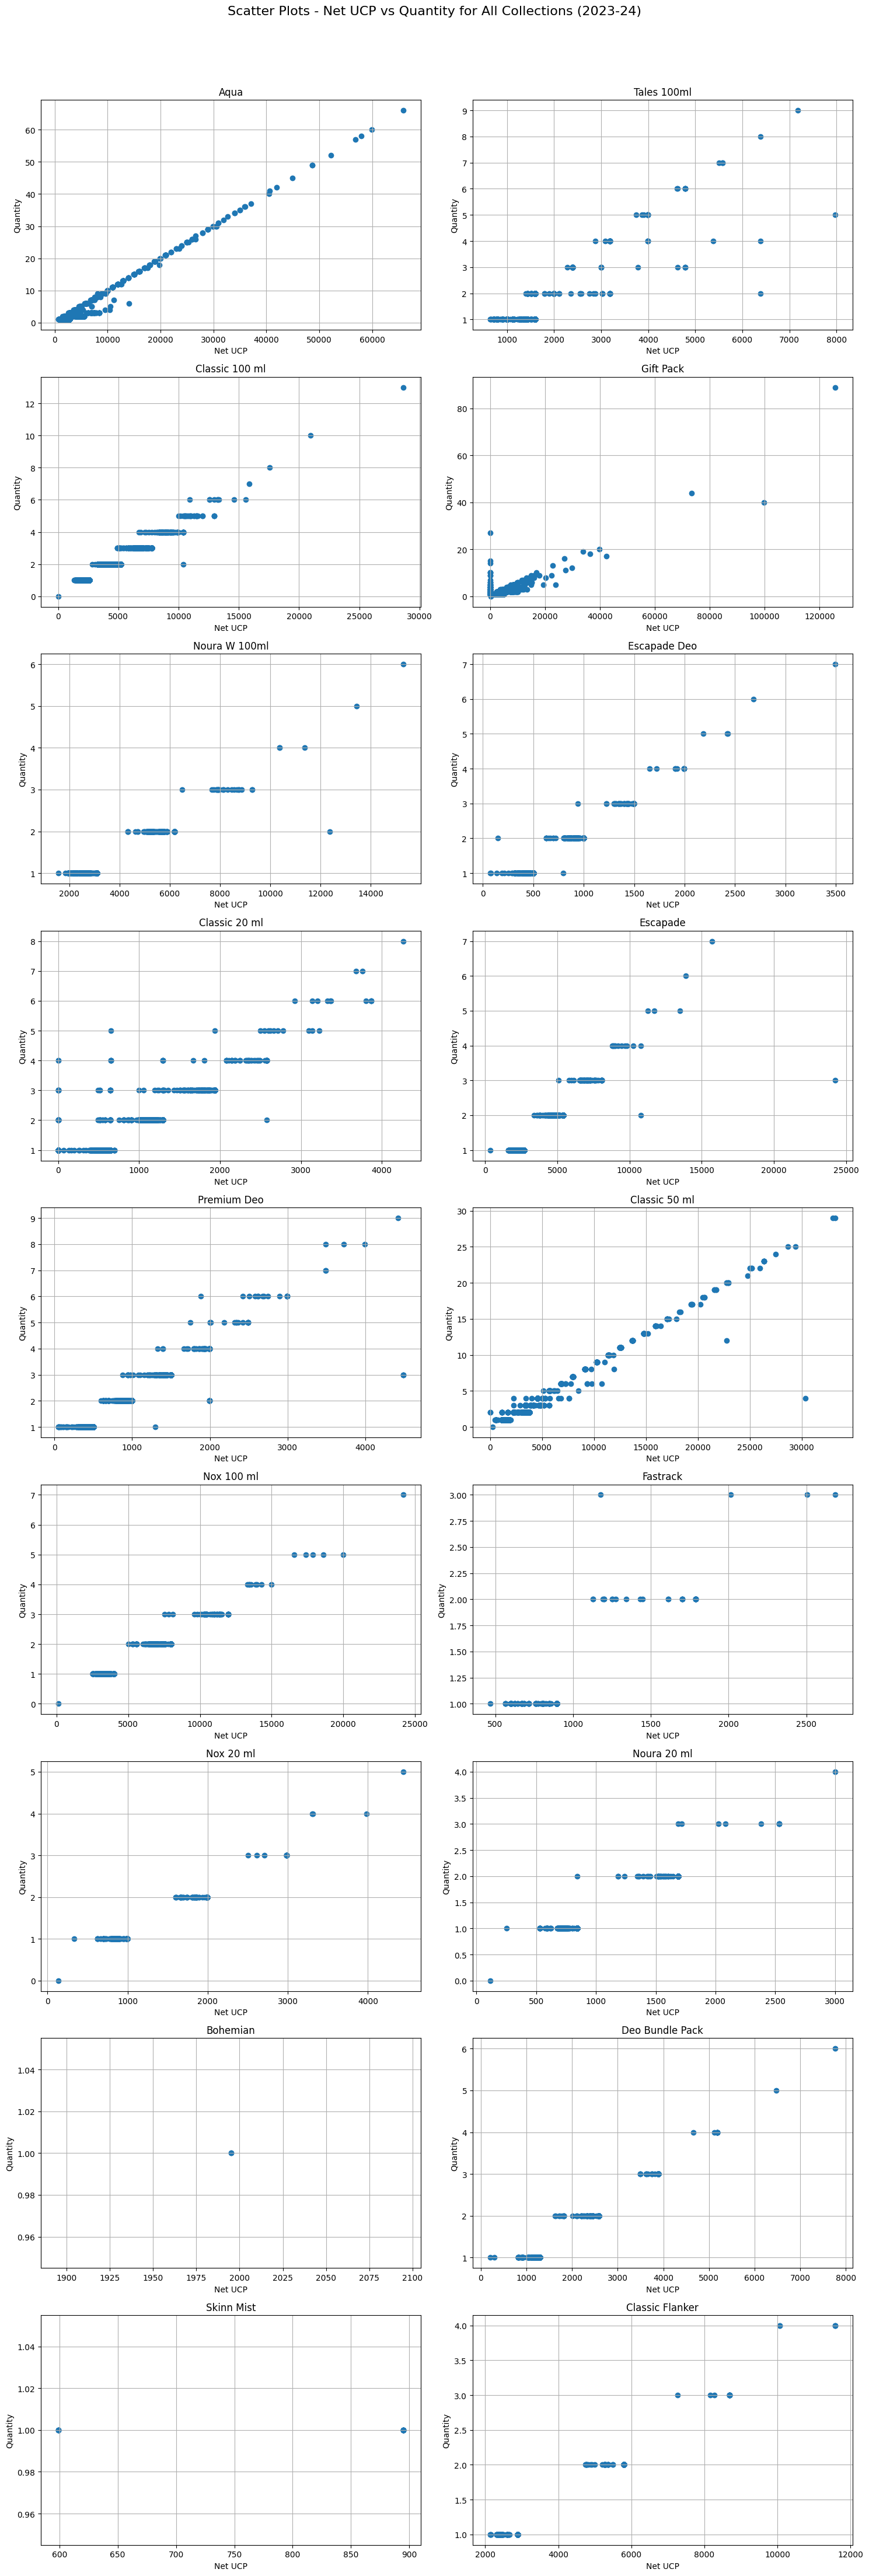

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df_transformed2'

# Filter data for the year 2023-24
df_2023_24 = df_transformed2[df_transformed2['Year'] == '2023-24']

# Get unique collections
collections = df_2023_24['Collection'].unique()

# Create subplots
num_collections = len(collections)
num_rows = (num_collections + 1) // 2  # Adjust the number of rows for the subplot grid

fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
fig.suptitle('Scatter Plots - Net UCP vs Quantity for All Collections (2023-24)', fontsize=16)

for i, collection in enumerate(collections):
    ax = axs[i // 2, i % 2]  # Determine subplot position
    df_collection = df_2023_24[df_2023_24['Collection'] == collection]
    ax.scatter(df_collection[' Net UCP'], df_collection['Quantity'], marker='o')
    ax.set_title(f'{collection}')
    ax.set_xlabel('Net UCP')
    ax.set_ylabel('Quantity')
    ax.grid(True)

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [47]:
df_transformed2['Year'].value_counts()

Year
2022-23    195219
2023-24    181385
Name: count, dtype: int64

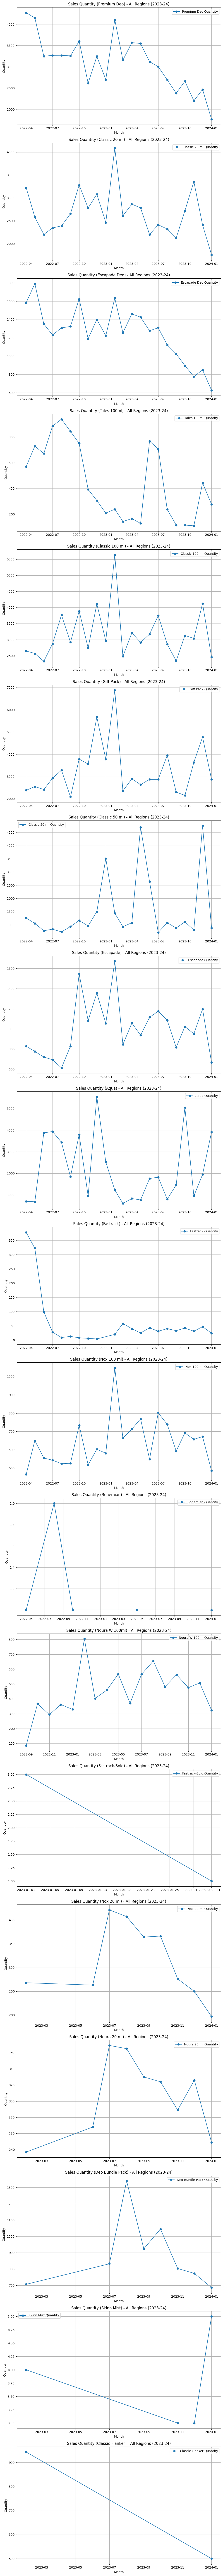

In [48]:
import matplotlib.pyplot as plt

# Assuming df_transformed2 is your DataFrame and is already loaded
collections = df_transformed2['Collection'].unique()

# Create a figure and axes for each collection
fig, axes = plt.subplots(len(collections), 1, figsize=(10, 6 * len(collections)))

# If there's only one collection, axes is not an array, we need to handle it differently
if len(collections) == 1:
    axes = [axes]

for ax, collection in zip(axes, collections):
    # Filter data for the current collection
    df_collection = df_transformed2[df_transformed2['Collection'] == collection]
    monthly_quantity = df_collection.groupby('Month')['Quantity'].sum().reset_index()
    monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]

    # Plot the data for the current collection
    ax.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['Quantity'], marker='o', label=f'{collection} Quantity')
    ax.set_title(f'Sales Quantity ({collection}) - All Regions (2023-24)')
    ax.set_xlabel('Month')
    ax.set_ylabel('Quantity')
    ax.grid(True)

    # Add legend for clarity
    ax.legend()

plt.tight_layout()
plt.show()


In [49]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming your data is stored in a DataFrame named 'df_transformed2'

# # Filter data for the year 2023-24
# df_2023_24 = df_transformed2[(df_transformed2['Year'] == '2023-24')]

# # Get unique collections
# collections = df_2023_24['Collection'].unique()

# # Create subplots
# num_collections = len(collections)
# num_rows = (num_collections + 1) // 2  # Adjust the number of rows for the subplot grid

# fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
# fig.suptitle('Monthly Sales Quantity for All Collections (2023-24)', fontsize=16)

# for i, collection in enumerate(collections):
#     ax = axs[i // 2, i % 2]  # Determine subplot position
#     df_collection = df_2023_24[df_2023_24['Collection'] == collection]
    
#     # Group by month and sum the quantities
#     monthly_quantity = df_collection.groupby('Month')['Quantity'].sum().reset_index()
#     monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]
    
#     # Plot the monthly quantities
#     ax.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['Quantity'], marker='o', label=f'Total Quantity for {collection}')
#     ax.set_title(f'{collection}')
#     ax.set_xlabel('Month')
#     ax.set_ylabel('Quantity')
#     ax.grid(True)
#     ax.legend()

# # Adjust layout and show the plot
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()


In [50]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming your data is stored in a DataFrame named 'df_transformed2'

# # Filter data for the year 2023-24
# df_2023_24 = df_transformed2[df_transformed2['Year'] == '2023-24']

# # Get unique collections
# collections = df_2023_24['Collection'].unique()

# # Create subplots
# num_collections = len(collections)
# num_rows = (num_collections + 1) // 2  # Adjust the number of rows for the subplot grid

# fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
# fig.suptitle('Monthly Sales Quantity for All Collections (2023-24)', fontsize=16)

# for i, collection in enumerate(collections):
#     ax = axs[i // 2, i % 2]  # Determine subplot position
#     df_collection = df_2023_24[df_2023_24['Collection'] == collection]
    
#     # Group by month and sum the quantities
#     monthly_quantity = df_collection.groupby('Month')[' Net UCP'].sum().reset_index()
#     monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]
    
#     # Plot the monthly quantities
#     ax.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day[' Net UCP'], marker='o', label=f'Total Quantity for {collection}')
#     ax.set_title(f'{collection}')
#     ax.set_xlabel('Month')
#     ax.set_ylabel(' Net UCP')
#     ax.grid(True)
#     ax.legend()

# # Adjust layout and show the plot
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()


In [51]:
df_transformed2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376604 entries, 0 to 379067
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Year                  376604 non-null  object        
 1   Month                 376604 non-null  datetime64[ns]
 2   Month Key             376604 non-null  object        
 3   QTR                   376604 non-null  object        
 4   Region                362347 non-null  object        
 5   Invoice Date          376604 non-null  object        
 6   Material              376604 non-null  object        
 7   Quantity              376604 non-null  float64       
 8   Gender                376604 non-null  object        
 9   Brand                 376604 non-null  object        
 10  Channel               376604 non-null  object        
 11  Franchisee store      358557 non-null  object        
 12  Bill to Party code    376604 non-null  object        
 13  Bill

In [52]:
# Combine 'Variant Name' and 'Varient Name2'
df_transformed2['Variant Name Combined'] = df_transformed2['Variant Name'].combine_first(df_transformed2['Varient Name2'])

# Combine 'Channel-1' and 'Channel-2'
df_transformed2['Channel Combined'] = df_transformed2['Channel-1'].combine_first(df_transformed2['Channel-2'])

# Optionally, drop the original columns if no longer needed
df_transformed2 = df_transformed2.drop(columns=['Variant Name', 'Varient Name2', 'Channel-1', 'Channel-2'])

# Display the updated DataFrame info to confirm changes
df_transformed2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 376604 entries, 0 to 379067
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Year                   376604 non-null  object        
 1   Month                  376604 non-null  datetime64[ns]
 2   Month Key              376604 non-null  object        
 3   QTR                    376604 non-null  object        
 4   Region                 362347 non-null  object        
 5   Invoice Date           376604 non-null  object        
 6   Material               376604 non-null  object        
 7   Quantity               376604 non-null  float64       
 8   Gender                 376604 non-null  object        
 9   Brand                  376604 non-null  object        
 10  Channel                376604 non-null  object        
 11  Franchisee store       358557 non-null  object        
 12  Bill to Party code     376604 non-null  object   

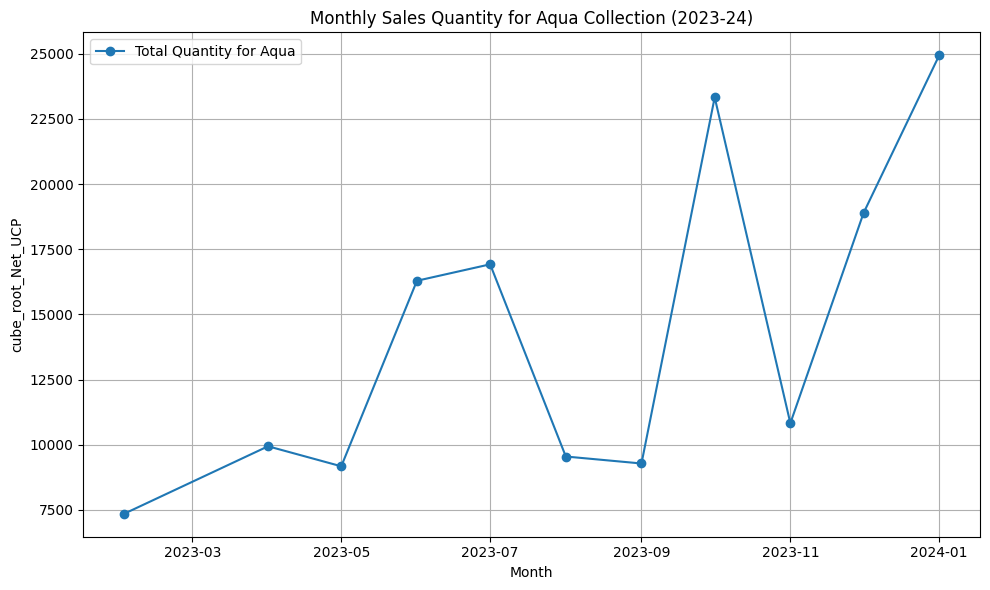

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df_transformed2'

# Filter data for the year 2023-24
df_2023_24 = df_transformed2[df_transformed2['Year'] == '2023-24']

# Filter data for the 'Aqua' collection
df_aqua = df_2023_24[df_2023_24['Collection'] == 'Aqua']

# Group by month and sum the quantities
monthly_quantity = df_aqua.groupby('Month')['cube_root_Net_UCP'].sum().reset_index()

# Ensure that 'Month' column is in datetime format if it's not already
if not pd.api.types.is_datetime64_any_dtype(monthly_quantity['Month']):
    monthly_quantity['Month'] = pd.to_datetime(monthly_quantity['Month'])

# Extract data for the first day of each month
monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]

# Create the plot for the 'Aqua' collection
plt.figure(figsize=(10, 6))
plt.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['cube_root_Net_UCP'], marker='o', label='Total Quantity for Aqua')
plt.title('Monthly Sales Quantity for Aqua Collection (2023-24)')
plt.xlabel('Month')
plt.ylabel('cube_root_Net_UCP')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


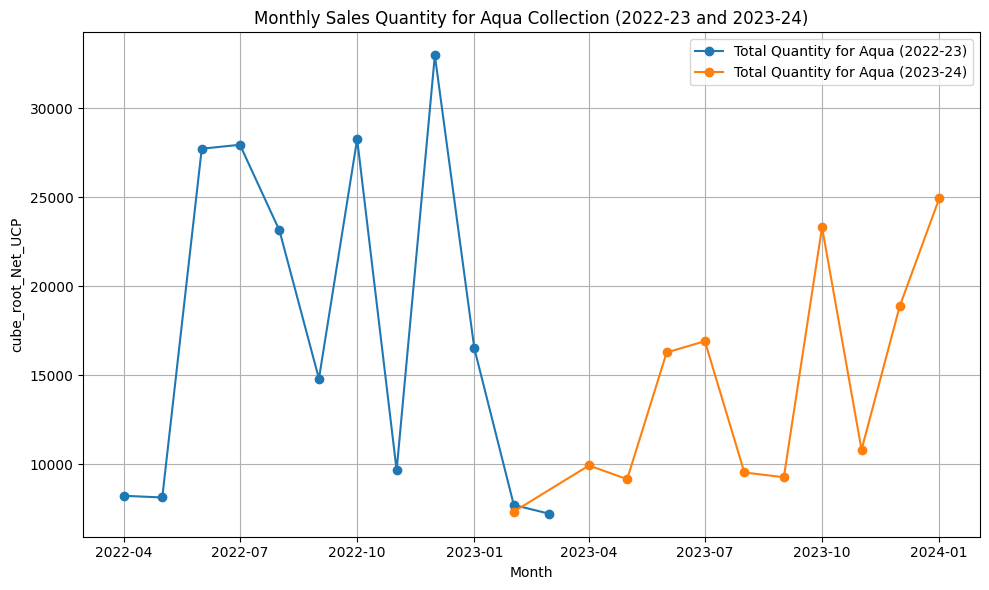

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df_transformed2'

# Ensure that 'Month' column is in datetime format if it's not already
if not pd.api.types.is_datetime64_any_dtype(df_transformed2['Month']):
    df_transformed2['Month'] = pd.to_datetime(df_transformed2['Month'])

# Filter data for the 'Aqua' collection
df_aqua = df_transformed2[df_transformed2['Collection'] == 'Aqua']

# Define the years you want to plot
years = ['2022-23', '2023-24']

# Create a figure for the combined plot
plt.figure(figsize=(10, 6))

# Loop through each year and plot the data
for year in years:
    # Filter data for the current year
    df_year = df_aqua[df_aqua['Year'] == year]

    # Group by month and sum the quantities
    monthly_quantity = df_year.groupby('Month')['cube_root_Net_UCP'].sum().reset_index()

    # Extract data for the first day of each month
    monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]

    # Plot the data for the current year
    plt.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['cube_root_Net_UCP'], marker='o', label=f'Total Quantity for Aqua ({year})')

# Add titles and labels
plt.title('Monthly Sales Quantity for Aqua Collection (2022-23 and 2023-24)')
plt.xlabel('Month')
plt.ylabel('cube_root_Net_UCP')
plt.grid(True)
plt.legend()

# Adjust layout to ensure plots are displayed properly
plt.tight_layout()
plt.show()


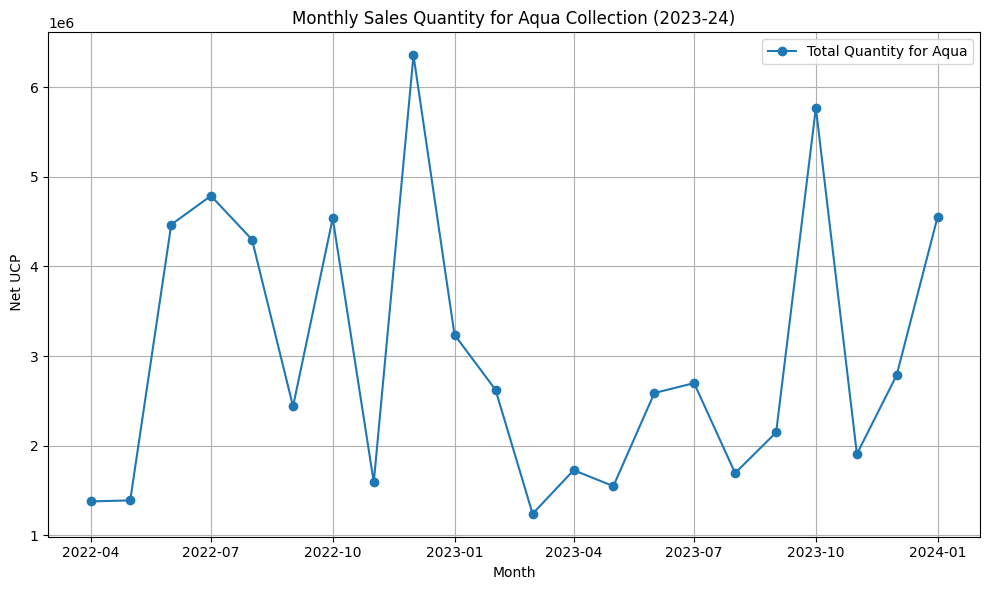

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df_transformed2'

# Filter data for all the years
df_2023_24 = df_transformed2[(df_transformed2['Year'] == '2023-24') | (df_transformed2['Year'] == '2022-23')]

# Filter data for the 'Aqua' collection
df_aqua = df_2023_24[df_2023_24['Collection'] == 'Aqua']

# Group by month and sum the quantities
monthly_quantity = df_aqua.groupby('Month')[' Net UCP'].sum().reset_index()

# Ensure that 'Month' column is in datetime format if it's not already
if not pd.api.types.is_datetime64_any_dtype(monthly_quantity['Month']):
    monthly_quantity['Month'] = pd.to_datetime(monthly_quantity['Month'])

# Extract data for the first day of each month
monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]

# Create the plot for the 'Aqua' collection
plt.figure(figsize=(10, 6))
plt.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day[' Net UCP'], marker='o', label='Total Quantity for Aqua')
plt.title('Monthly Sales Quantity for Aqua Collection (2023-24)')
plt.xlabel('Month')
plt.ylabel(' Net UCP')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [56]:
monthly_quantity_1st_day_net_ucp = monthly_quantity_1st_day.copy()
monthly_quantity_1st_day_net_ucp

Month     Net UCP
0  2022-04-01  1378295.67
1  2022-05-01  1389775.21
2  2022-06-01  4466376.66
3  2022-07-01  4786854.29
4  2022-08-01  4299166.29
5  2022-09-01  2438413.82
6  2022-10-01  4536983.03
7  2022-11-01  1591648.12
8  2022-12-01  6355002.69
9  2023-01-01  3237468.53
10 2023-02-01  2622962.20
11 2023-03-01  1240204.48
12 2023-04-01  1726411.55
13 2023-05-01  1548935.82
14 2023-06-01  2587427.36
15 2023-07-01  2697976.67
16 2023-08-01  1694131.88
17 2023-09-01  2148348.97
22 2023-10-01  5769339.59
24 2023-11-01  1907409.75
28 2023-12-01  2785379.82
31 2024-01-01  4553606.80

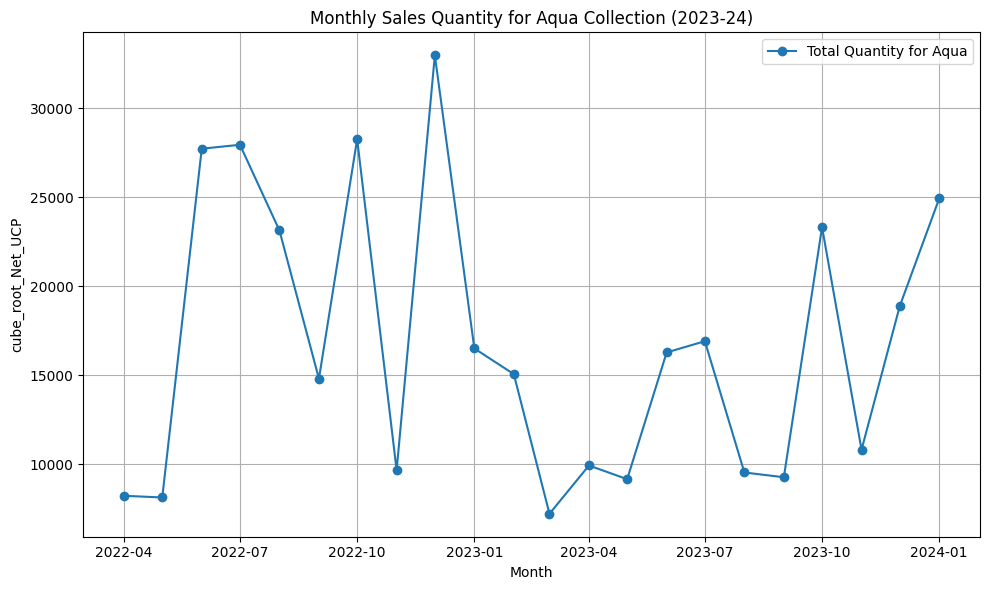

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df_transformed2'

# Filter data for all the years
df_2023_24 = df_transformed2[(df_transformed2['Year'] == '2023-24') | (df_transformed2['Year'] == '2022-23')]

# Filter data for the 'Aqua' collection
df_aqua = df_2023_24[df_2023_24['Collection'] == 'Aqua']

# Group by month and sum the quantities
monthly_quantity = df_aqua.groupby('Month')['cube_root_Net_UCP'].sum().reset_index()

# Ensure that 'Month' column is in datetime format if it's not already
if not pd.api.types.is_datetime64_any_dtype(monthly_quantity['Month']):
    monthly_quantity['Month'] = pd.to_datetime(monthly_quantity['Month'])

# Extract data for the first day of each month
monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]

# Create the plot for the 'Aqua' collection
plt.figure(figsize=(10, 6))
plt.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['cube_root_Net_UCP'], marker='o', label='Total Quantity for Aqua')
plt.title('Monthly Sales Quantity for Aqua Collection (2023-24)')
plt.xlabel('Month')
plt.ylabel('cube_root_Net_UCP')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [58]:
monthly_quantity_1st_day = pd.merge(monthly_quantity_1st_day, monthly_quantity_1st_day_net_ucp[['Month', ' Net UCP']], on='Month', how='left')

monthly_quantity_1st_day

Month  cube_root_Net_UCP     Net UCP
0  2022-04-01        8238.483535  1378295.67
1  2022-05-01        8143.221909  1389775.21
2  2022-06-01       27739.044050  4466376.66
3  2022-07-01       27959.173820  4786854.29
4  2022-08-01       23143.629101  4299166.29
5  2022-09-01       14814.586087  2438413.82
6  2022-10-01       28273.271603  4536983.03
7  2022-11-01        9671.882997  1591648.12
8  2022-12-01       32989.108392  6355002.69
9  2023-01-01       16518.123807  3237468.53
10 2023-02-01       15072.487955  2622962.20
11 2023-03-01        7226.650324  1240204.48
12 2023-04-01        9940.642440  1726411.55
13 2023-05-01        9172.580464  1548935.82
14 2023-06-01       16292.129835  2587427.36
15 2023-07-01       16923.121979  2697976.67
16 2023-08-01        9547.726117  1694131.88
17 2023-09-01        9280.069019  2148348.97
18 2023-10-01       23330.258112  5769339.59
19 2023-11-01       10826.012359  1907409.75
20 2023-12-01       18894.906204  2785379.82
21 2024-01-01       24945.798654  4553606.80

In [59]:
!pip install statsmodels

In [60]:
monthly_quantity_1st_day.head()

Month  cube_root_Net_UCP     Net UCP
0 2022-04-01        8238.483535  1378295.67
1 2022-05-01        8143.221909  1389775.21
2 2022-06-01       27739.044050  4466376.66
3 2022-07-01       27959.173820  4786854.29
4 2022-08-01       23143.629101  4299166.29

c:\Users\Garvit Goyal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Garvit Goyal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Garvit Goyal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


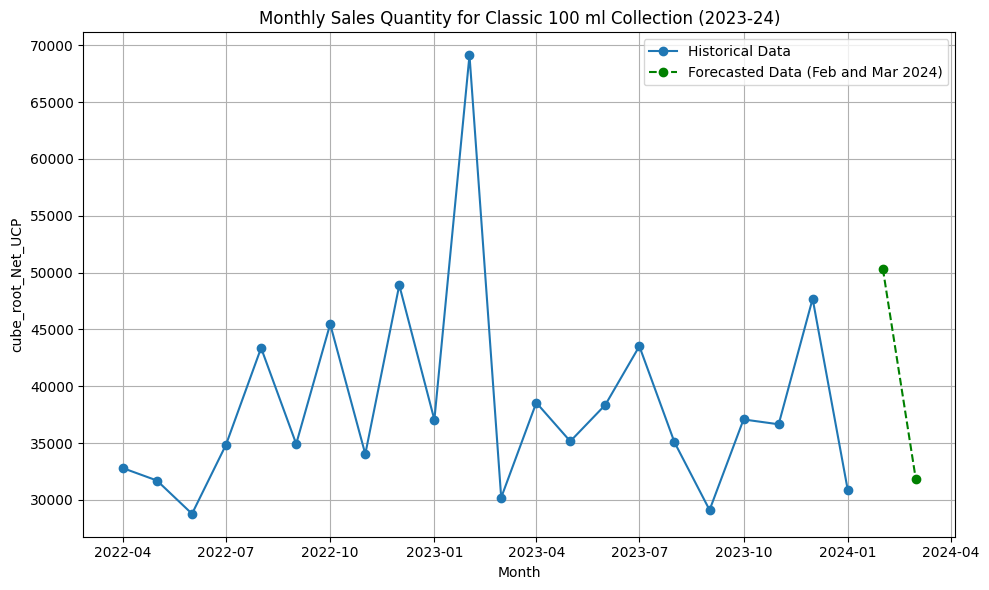

Forecasted Data for February 2024 and March 2024:
22    50331.983943
23    31888.612081
dtype: float64


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df_2023_24 = df_transformed2[(df_transformed2['Year'] == '2023-24') | (df_transformed2['Year'] == '2022-23')]

# Filter data for the '____' collection
df_aqua = df_2023_24[df_2023_24['Collection'] == 'Classic 100 ml']

# Group by month and sum the quantities
monthly_quantity = df_aqua.groupby('Month')['cube_root_Net_UCP'].sum().reset_index()

# Ensure that 'Month' column is in datetime format if it's not already
if not pd.api.types.is_datetime64_any_dtype(monthly_quantity['Month']):
    monthly_quantity['Month'] = pd.to_datetime(monthly_quantity['Month'])

# Extract data for the first day of each month
monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]

# Create the plot for the '____' collection
plt.figure(figsize=(10, 6))
plt.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['cube_root_Net_UCP'], marker='o', label='Historical Data')
plt.title('Monthly Sales Quantity for Classic 100 ml Collection (2023-24)')
plt.xlabel('Month')
plt.ylabel('cube_root_Net_UCP')
plt.grid(True)
plt.legend()

# Compute initial seasonal and level values
initial_seasonal = [monthly_quantity_1st_day.loc[monthly_quantity_1st_day['Month'].dt.month == i, 'cube_root_Net_UCP'].mean() for i in range(1, 13)]
initial_level = monthly_quantity_1st_day['cube_root_Net_UCP'].mean()

# Perform exponential smoothing forecast
model = ExponentialSmoothing(monthly_quantity_1st_day['cube_root_Net_UCP'], seasonal='add', seasonal_periods=12, initialization_method='known', initial_seasonal=initial_seasonal, initial_level=initial_level)
fit = model.fit()
forecast_dates = pd.to_datetime(['2024-02-01', '2024-03-01'])
forecast_values = fit.forecast(2)

# Plot the forecasted values for the specified dates
plt.plot(forecast_dates, forecast_values, marker='o', color='green', linestyle='--', label='Forecasted Data (Feb and Mar 2024)')
plt.legend()

plt.tight_layout()
plt.show()

print("Forecasted Data for February 2024 and March 2024:")
print(forecast_values)


In [62]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# import numpy as np

# # Assuming your data is stored in a DataFrame named 'df_transformed2'

# df_2023_24 = df_transformed2[(df_transformed2['Year'] == '2023-24') | (df_transformed2['Year'] == '2022-23')]

# # Filter data for the 'Classic 100 ml' collection
# df_classic_100ml = df_2023_24[df_2023_24['Collection'] == 'Classic 100 ml']

# # Group by month and sum the quantities
# monthly_quantity = df_classic_100ml.groupby('Month')[[' Net UCP', 'cube_root_Net_UCP']].sum().reset_index()

# # Ensure that 'Month' column is in datetime format if it's not already
# if not pd.api.types.is_datetime64_any_dtype(monthly_quantity['Month']):
#     monthly_quantity['Month'] = pd.to_datetime(monthly_quantity['Month'])

# # Extract data for the first day of each month
# monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]

# # Create the plot for the 'Classic 100 ml' collection in the scale of 'cube_root_Net_UCP'
# plt.figure(figsize=(10, 6))
# plt.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['cube_root_Net_UCP'], marker='o', label='Historical Data (cube_root_Net_UCP)')
# plt.title('Monthly Sales Quantity for Classic 100 ml Collection (2023-24)')
# plt.xlabel('Month')
# plt.ylabel('cube_root_Net_UCP')
# plt.grid(True)
# plt.legend()

# # Compute initial seasonal and level values
# initial_seasonal = [monthly_quantity_1st_day.loc[monthly_quantity_1st_day['Month'].dt.month == i, 'cube_root_Net_UCP'].mean() for i in range(1, 13)]
# initial_level = monthly_quantity_1st_day['cube_root_Net_UCP'].mean()

# # Perform exponential smoothing forecast on 'cube_root_Net_UCP'
# model = ExponentialSmoothing(monthly_quantity_1st_day['cube_root_Net_UCP'], seasonal='add', seasonal_periods=12, initialization_method='known', initial_seasonal=initial_seasonal, initial_level=initial_level)
# fit = model.fit()
# forecast_dates = pd.to_datetime(['2024-02-01', '2024-03-01'])
# forecast_values_cube_root = fit.forecast(2)

# # Plot the forecasted values for the specified dates in the scale of 'cube_root_Net_UCP'
# plt.plot(forecast_dates, forecast_values_cube_root, marker='o', color='green', linestyle='--', label='Forecasted Data (Feb and Mar 2024) (cube_root_Net_UCP)')
# plt.legend()

# # Undo the cube root transformation to get forecasted values in the scale of 'Net UCP'
# forecast_values_Net_UCP = np.power(forecast_values_cube_root, 3)

# # Create a new plot for the 'Classic 100 ml' collection in the scale of 'Net UCP'
# plt.figure(figsize=(10, 6))
# plt.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day[' Net UCP'], marker='o', label='Historical Data (Net UCP)', color='blue')
# plt.plot(forecast_dates, forecast_values_Net_UCP, marker='o', linestyle='--', label='Forecasted Data (Feb and Mar 2024) (Net UCP)', color='green')
# plt.title('Monthly Sales Quantity for Classic 100 ml Collection (2023-24)')
# plt.xlabel('Month')
# plt.ylabel('Net UCP')
# plt.grid(True)
# plt.legend()

# plt.tight_layout()
# plt.show()

# print("Forecasted Data for February 2024 and March 2024 (Net UCP):")
# print(forecast_values_Net_UCP)


In [63]:
#EXPONENTIAL SMOOTHING WITH THE MATHEMATICAL RELATIONS

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming your data is stored in a DataFrame named 'df_transformed2'

# # Filter data for the specified years
# df_2023_24 = df_transformed2[(df_transformed2['Year'] == '2023-24') | (df_transformed2['Year'] == '2022-23')]

# # Filter data for the specified collection
# df_aqua = df_2023_24[df_2023_24['Collection'] == 'Classic 100 ml']

# # Group by month and sum the quantities
# monthly_quantity = df_aqua.groupby('Month')['cube_root_Net_UCP'].sum().reset_index()

# # Ensure that 'Month' column is in datetime format if it's not already
# if not pd.api.types.is_datetime64_any_dtype(monthly_quantity['Month']):
#     monthly_quantity['Month'] = pd.to_datetime(monthly_quantity['Month'])

# # Extract data for the first day of each month
# monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]

# # Define smoothing parameters
# alpha = 0.2  # Smoothing parameter for level
# beta = 0.2   # Smoothing parameter for trend
# gamma = 0.2  # Smoothing parameter for seasonality
# period = 12  # Seasonal period (assuming monthly data)

# # Initialize level, trend, and seasonal components
# level = monthly_quantity_1st_day['cube_root_Net_UCP'].iloc[0]
# trend = 0
# seasonal = np.zeros(period)

# # Initialize forecasted values list
# forecast_values = []

# # Perform exponential smoothing forecast manually
# for i in range(len(monthly_quantity_1st_day)):
#     value = monthly_quantity_1st_day['cube_root_Net_UCP'].iloc[i]
#     previous_level = level
#     level = alpha * value + (1 - alpha) * (previous_level + trend)
#     trend = beta * (level - previous_level) + (1 - beta) * trend
#     seasonal[i % period] = gamma * (value - previous_level) + (1 - gamma) * seasonal[i % period]
#     forecast = (level + trend) * seasonal[i % period - period]  # Forecast for next period
#     forecast_values.append(forecast)

# # Plot historical data
# plt.figure(figsize=(10, 6))
# plt.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['cube_root_Net_UCP'], marker='o', label='Historical Data')

# # Plot forecasted values
# forecast_dates = pd.to_datetime(['2024-02-01', '2024-03-01'])
# plt.plot(forecast_dates, forecast_values[-2:], marker='o', color='green', linestyle='--', label='Forecasted Data (Feb and Mar 2024)')

# plt.title('Monthly Sales Quantity for Classic 100 ml Collection (2023-24)')
# plt.xlabel('Month')
# plt.ylabel('cube_root_Net_UCP')
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

# print("Forecasted Data for February 2024 and March 2024:")
# print(forecast_values[-2:])


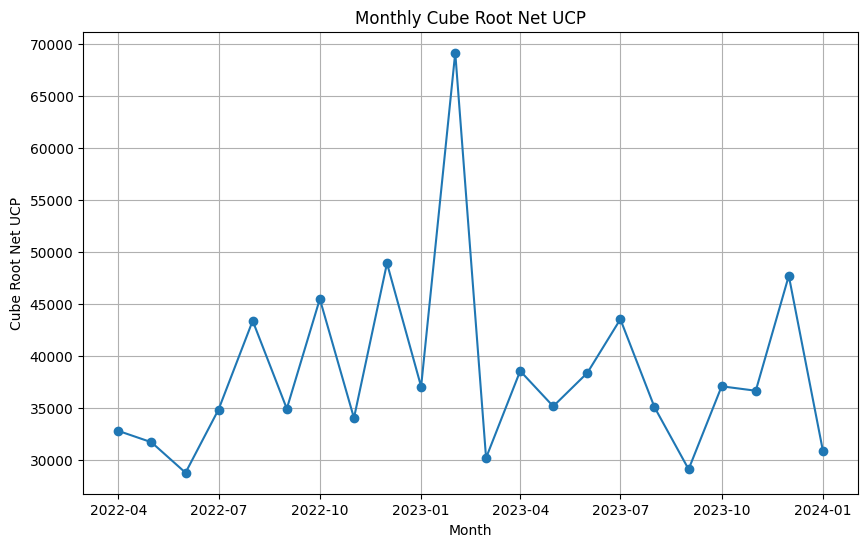

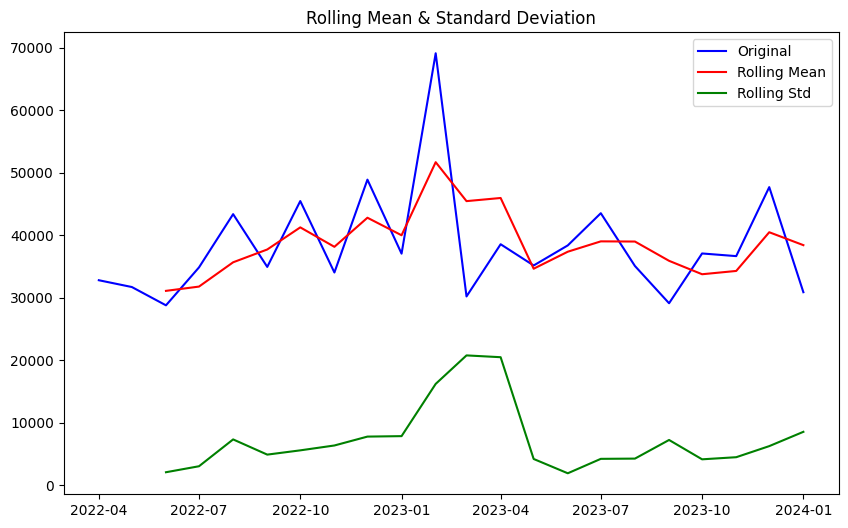

Results of Dickey-Fuller Test:
Test Statistic                 -5.437397
p-value                         0.000003
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


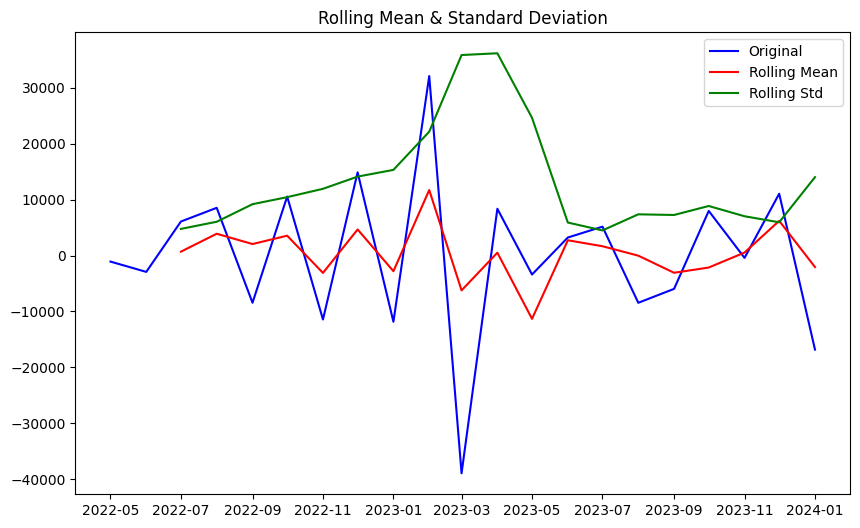

Results of Dickey-Fuller Test:
Test Statistic                -1.032481e+01
p-value                        2.944743e-18
#Lags Used                     0.000000e+00
Number of Observations Used    2.000000e+01
Critical Value (1%)           -3.809209e+00
Critical Value (5%)           -3.021645e+00
Critical Value (10%)          -2.650713e+00
dtype: float64


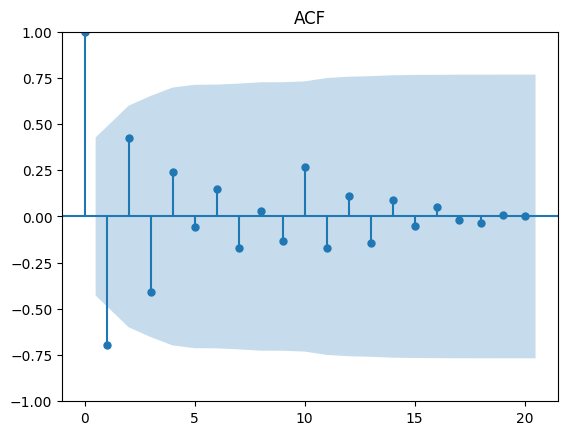

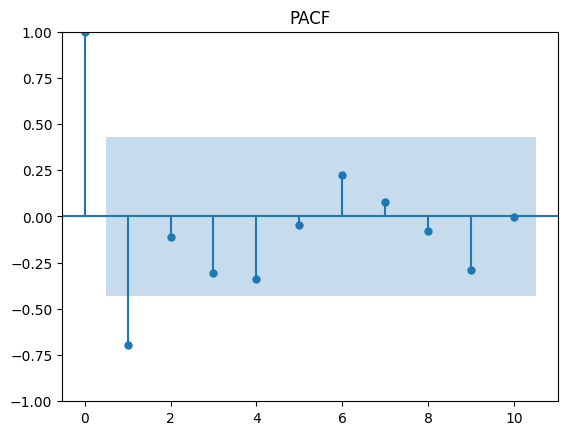

c:\Users\Garvit Goyal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Garvit Goyal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Garvit Goyal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                  
Dep. Variable:     cube_root_Net_UCP_diff   No. Observations:                   18
Model:                     ARIMA(1, 1, 1)   Log Likelihood                -183.228
Date:                    Sun, 02 Jun 2024   AIC                            372.456
Time:                            12:29:46   BIC                            374.956
Sample:                        05-01-2022   HQIC                           372.705
                             - 10-01-2023                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7254      0.178     -4.068      0.000      -1.075      -0.376
ma.L1         -0.8951      0.576     -1.554      0.120      -2.024       0.234
sigma2      1.841e+0

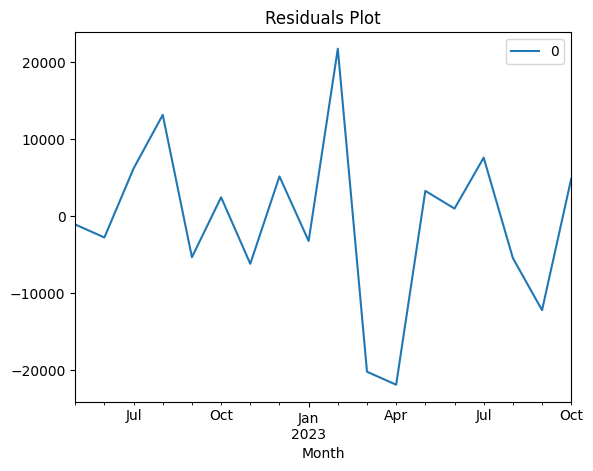

ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

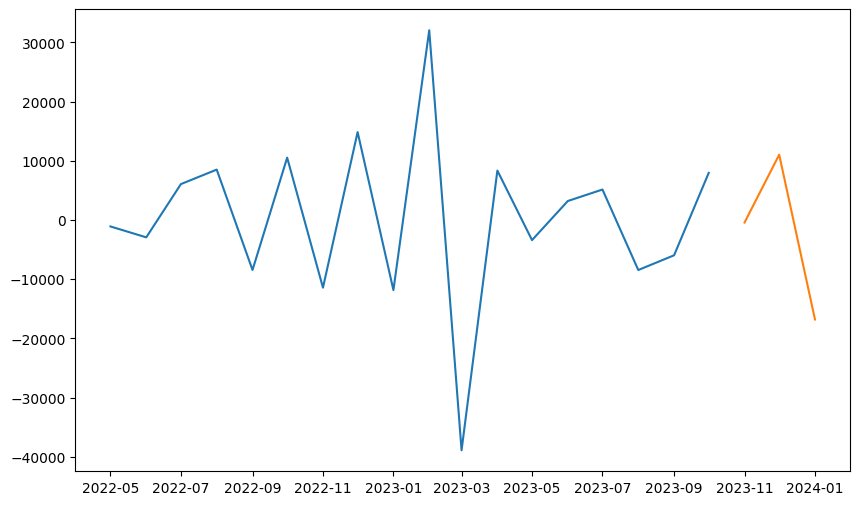

In [64]:
##ARIMA MODEL APPLICATION 
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

# Loading the data
# data = {
#     'Month': ['2023-02-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01',
#               '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01'],
#     'cube_root_Net_UCP': [7349.785690, 9940.642440, 9172.580464, 16292.129835, 16923.121979, 9547.726117,
#                           9280.069019, 23330.258112, 10826.012359, 18894.906204, 24945.798654]
# }

data = pd.DataFrame(monthly_quantity_1st_day)

df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['cube_root_Net_UCP'], marker='o')
plt.title('Monthly Cube Root Net UCP')
plt.xlabel('Month')
plt.ylabel('Cube Root Net UCP')
plt.grid(True)
plt.show()

# Function to test stationarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolling_mean = timeseries.rolling(window=3).mean()
    rolling_std = timeseries.rolling(window=3).std()
    
    # Plotting rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Performing Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Testing stationarity
test_stationarity(df['cube_root_Net_UCP'])

# Differencing to make the series stationary
df['cube_root_Net_UCP_diff'] = df['cube_root_Net_UCP'] - df['cube_root_Net_UCP'].shift(1)
df.dropna(inplace=True)

# Testing stationarity again after differencing
test_stationarity(df['cube_root_Net_UCP_diff'])

# Plotting ACF and PACF
plot_acf(df['cube_root_Net_UCP_diff'], lags=len(df)-1)
plt.title('ACF')
plt.show()

plot_pacf(df['cube_root_Net_UCP_diff'], lags=int(len(df)*0.5))
plt.title('PACF')
plt.show()



# Splitting the data into train and test sets
train_size = int(len(df) * 0.9)
train, test = df['cube_root_Net_UCP_diff'][:train_size], df['cube_root_Net_UCP_diff'][train_size:]

# Fitting the ARIMA model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plotting residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('Residuals Plot')
plt.show()

# Actual vs Fitted
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, model_fit.forecast(steps=len(test))[0], label='ARIMA Forecast')
plt.title('Actual vs Fitted')
plt.xlabel('Month')
plt.ylabel('Cube Root Net UCP Difference')
plt.legend(loc='best')
plt.show()

# Evaluating the model
mse = mean_squared_error(test, model_fit.forecast(steps=len(test))[0])
print('Mean Squared Error:', mse)

# Forecasting future values
forecast = model_fit.forecast(steps=3)[0]
print('Forecasted Values:', forecast)


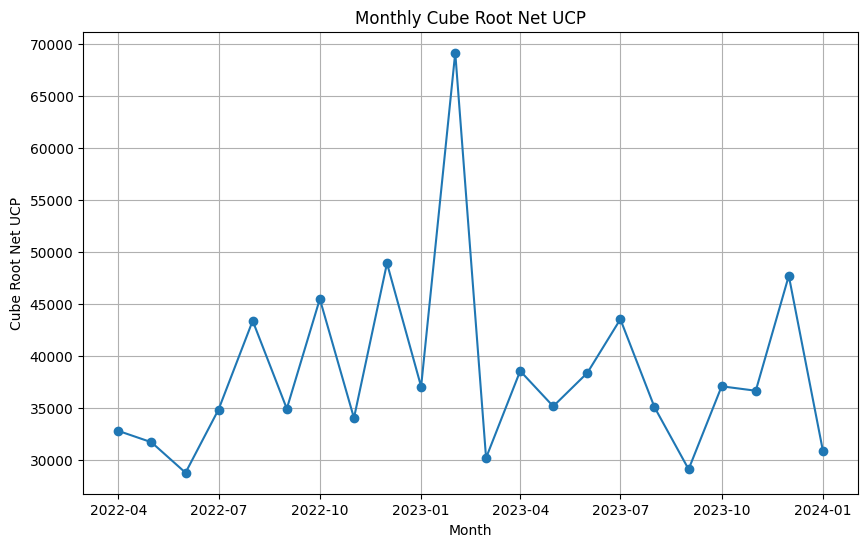

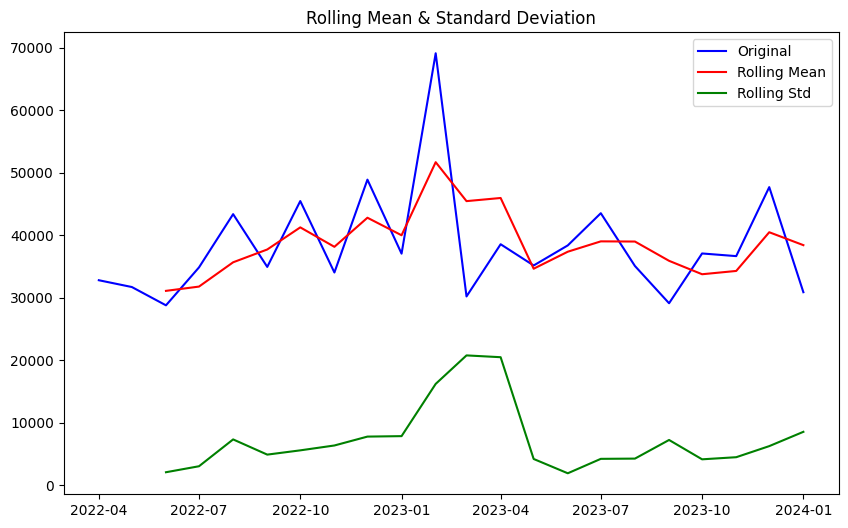

Results of Dickey-Fuller Test:
Test Statistic                 -5.437397
p-value                         0.000003
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


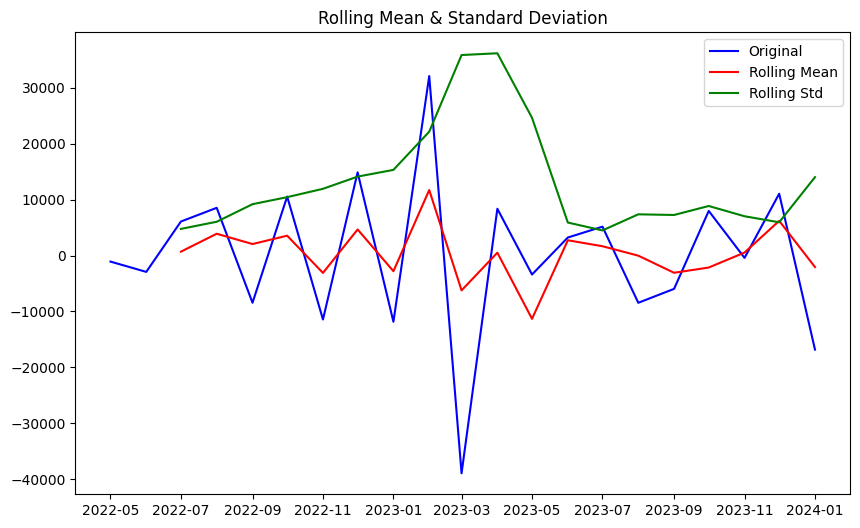

Results of Dickey-Fuller Test:
Test Statistic                -1.032481e+01
p-value                        2.944743e-18
#Lags Used                     0.000000e+00
Number of Observations Used    2.000000e+01
Critical Value (1%)           -3.809209e+00
Critical Value (5%)           -3.021645e+00
Critical Value (10%)          -2.650713e+00
dtype: float64


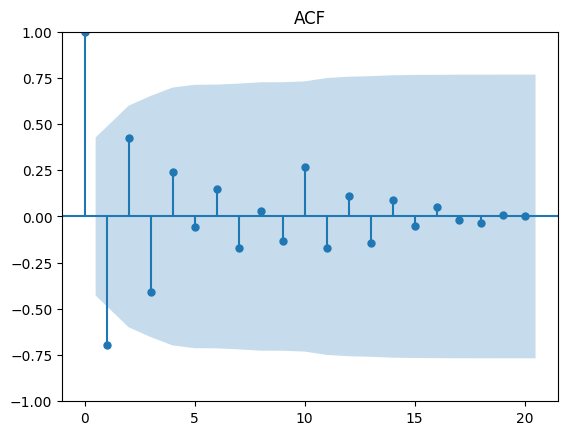

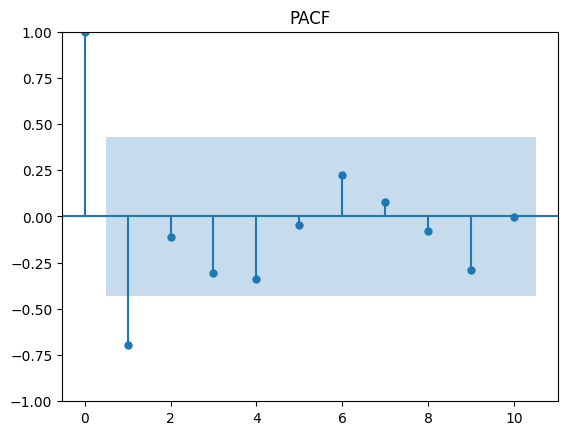

C:\Users\Garvit Goyal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Garvit Goyal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Garvit Goyal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                  
Dep. Variable:     cube_root_Net_UCP_diff   No. Observations:                   18
Model:                     ARIMA(1, 1, 1)   Log Likelihood                -183.228
Date:                    Mon, 27 May 2024   AIC                            372.456
Time:                            15:42:20   BIC                            374.956
Sample:                        05-01-2022   HQIC                           372.705
                             - 10-01-2023                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7254      0.178     -4.068      0.000      -1.075      -0.376
ma.L1         -0.8951      0.576     -1.554      0.120      -2.024       0.234
sigma2      1.841e+0

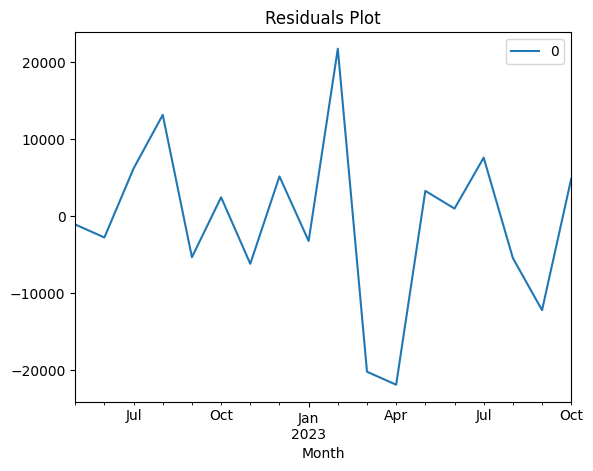

ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

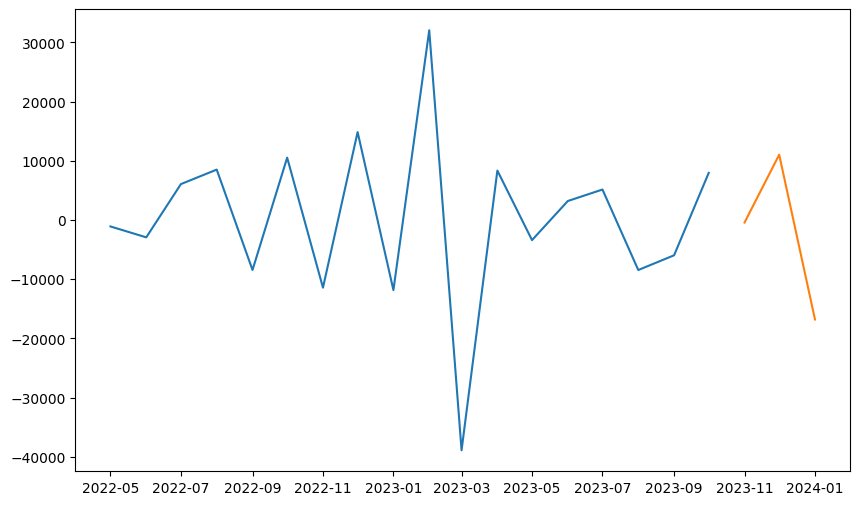

In [ ]:
##ARIMA MODEL APPLICATION 
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

# Loading the data
# data = {
#     'Month': ['2023-02-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01',
#               '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01'],
#     'cube_root_Net_UCP': [7349.785690, 9940.642440, 9172.580464, 16292.129835, 16923.121979, 9547.726117,
#                           9280.069019, 23330.258112, 10826.012359, 18894.906204, 24945.798654]
# }
data = pd.DataFrame(monthly_quantity_1st_day)

df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['cube_root_Net_UCP'], marker='o')
plt.title('Monthly Cube Root Net UCP')
plt.xlabel('Month')
plt.ylabel('Cube Root Net UCP')
plt.grid(True)
plt.show()

# Function to test stationarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolling_mean = timeseries.rolling(window=3).mean()
    rolling_std = timeseries.rolling(window=3).std()
    
    # Plotting rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Performing Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Testing stationarity
test_stationarity(df['cube_root_Net_UCP'])

# Differencing to make the series stationary
df['cube_root_Net_UCP_diff'] = df['cube_root_Net_UCP'] - df['cube_root_Net_UCP'].shift(1)
df.dropna(inplace=True)

# Testing stationarity again after differencing
test_stationarity(df['cube_root_Net_UCP_diff'])

# Plotting ACF and PACF
plot_acf(df['cube_root_Net_UCP_diff'], lags=len(df)-1)
plt.title('ACF')
plt.show()

plot_pacf(df['cube_root_Net_UCP_diff'], lags=int(len(df)*0.5))
plt.title('PACF')
plt.show()



# Splitting the data into train and test sets
train_size = int(len(df) * 0.9)
train, test = df['cube_root_Net_UCP_diff'][:train_size], df['cube_root_Net_UCP_diff'][train_size:]

# Fitting the ARIMA model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plotting residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('Residuals Plot')
plt.show()

# Actual vs Fitted
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, model_fit.forecast(steps=len(test))[0], label='ARIMA Forecast')
plt.title('Actual vs Fitted')
plt.xlabel('Month')
plt.ylabel('Cube Root Net UCP Difference')
plt.legend(loc='best')
plt.show()

# Evaluating the model
mse = mean_squared_error(test, model_fit.forecast(steps=len(test))[0])
print('Mean Squared Error:', mse)

# Forecasting future values
forecast = model_fit.forecast(steps=3)[0]
print('Forecasted Values:', forecast)


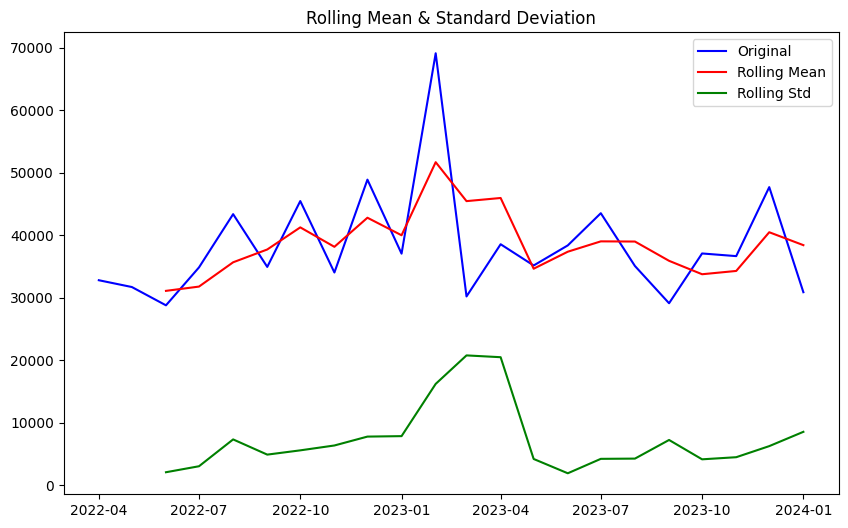

ADF Statistic: -10.324807146827606
p-value: 2.9447427904315806e-18
Critical Values: {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125}


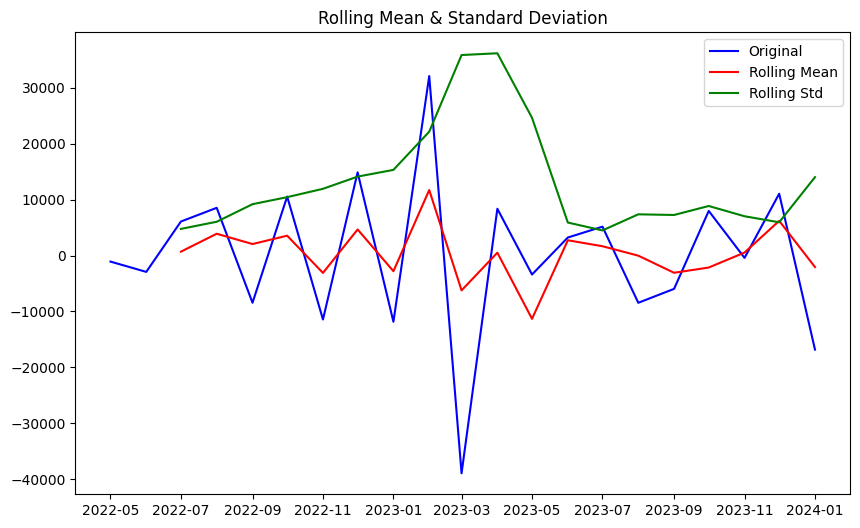

ADF Statistic: -4.377240177770314
p-value: 0.0003256065235410149
Critical Values: {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}


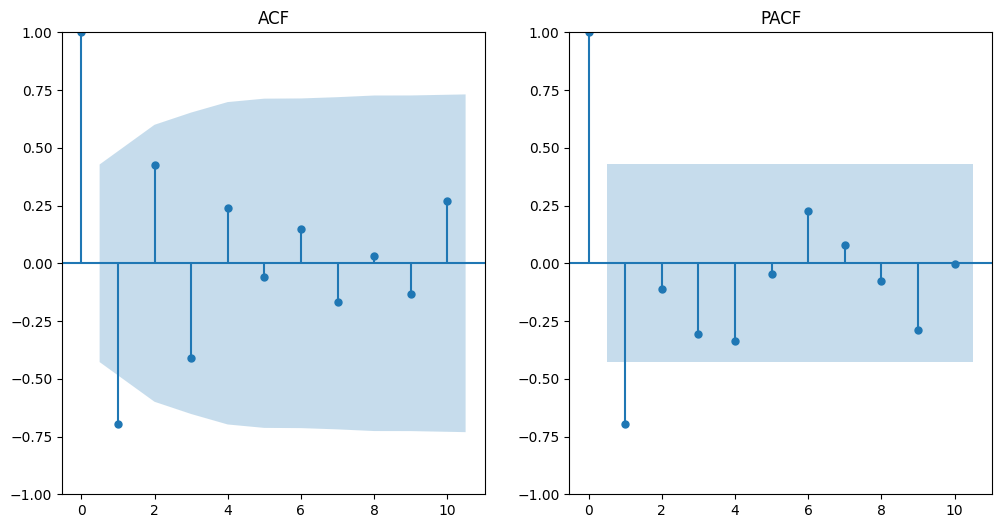

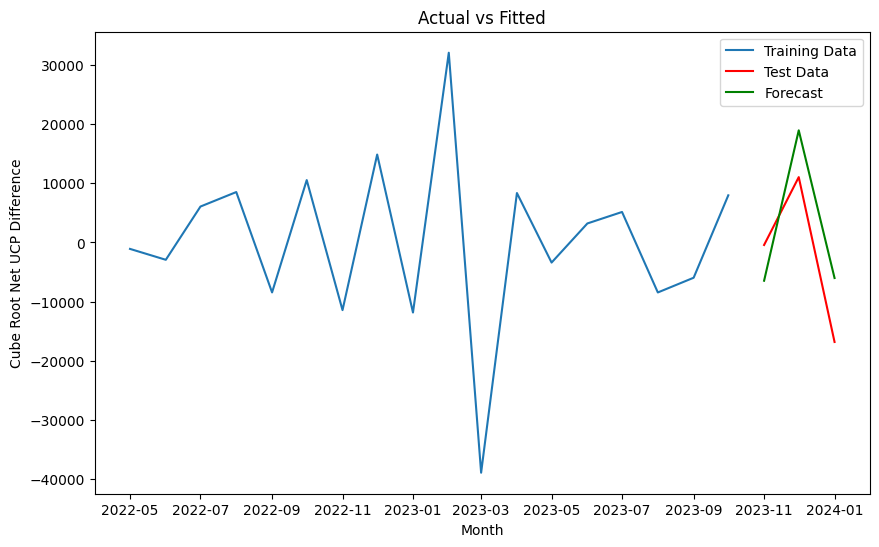

Mean Squared Error: 71924521.91672485


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = pd.DataFrame(monthly_quantity_1st_day)

df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Function to test stationarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolling_mean = timeseries.rolling(window=3).mean()
    rolling_std = timeseries.rolling(window=3).std()

    # Plotting rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Calculating ADF Test
    diff = timeseries.diff().dropna()
    adf_result = adfuller(diff)
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    print('Critical Values:', adf_result[4])

# Testing stationarity
test_stationarity(df['cube_root_Net_UCP'])

# Differencing to make the series stationary
df['cube_root_Net_UCP_diff'] = df['cube_root_Net_UCP'] - df['cube_root_Net_UCP'].shift(1)
df.dropna(inplace=True)

# Testing stationarity again after differencing
test_stationarity(df['cube_root_Net_UCP_diff'])

# Plotting ACF and PACF
def plot_acf_pacf(series):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    plot_acf(series, ax=ax[0])
    ax[0].set_title('ACF')
    plot_pacf(series, ax=ax[1])
    ax[1].set_title('PACF')
    plt.show()

plot_acf_pacf(df['cube_root_Net_UCP_diff'])

# Splitting the data into train and test sets
train_size = int(len(df) * 0.9)
train, test = df['cube_root_Net_UCP_diff'][:train_size], df['cube_root_Net_UCP_diff'][train_size:]

# Fitting the ARIMA model
def fit_arima(train):
    mu = train.mean()
    diff = train - mu
    phi = diff.autocorr()
    sigma2 = diff.var()
    theta = 0  # Assuming no MA component
    return mu, phi, theta, sigma2

mu, phi, theta, sigma2 = fit_arima(train)

# Forecasting future values
def forecast_arima(mu, phi, theta, sigma2, n_steps):
    forecast = np.zeros(n_steps)
    for i in range(n_steps):
        forecast[i] = mu + phi * forecast[i - 1] + np.random.normal(scale=np.sqrt(sigma2))
    return forecast

forecast = forecast_arima(mu, phi, theta, sigma2, len(test))

# Plotting forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data', color='red')  # Test data in red
plt.plot(test.index, forecast, label='Forecast', color='green')  # Forecast in green
plt.title('Actual vs Fitted')
plt.xlabel('Month')
plt.ylabel('Cube Root Net UCP Difference')
plt.legend(loc='best')
plt.show()

# Calculating Mean Squared Error (MSE)
mse = np.mean((test - forecast) ** 2)
print('Mean Squared Error:', mse)


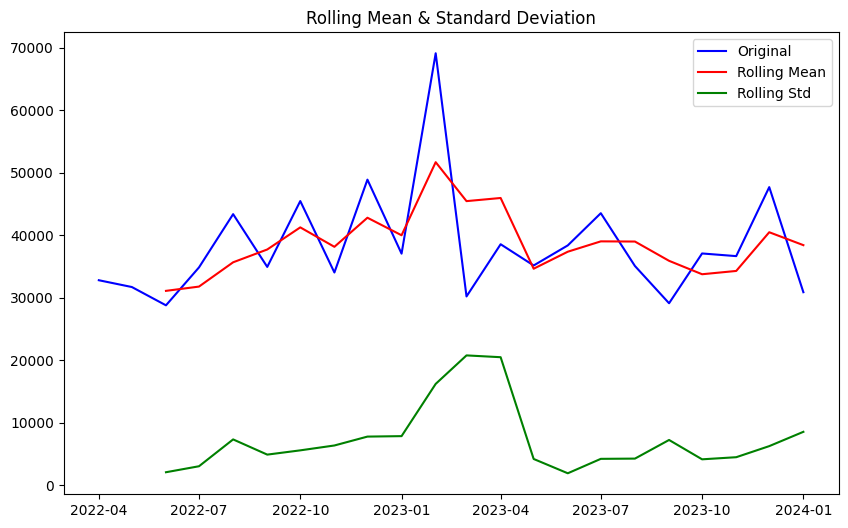

Results of Dickey-Fuller Test:
Test Statistic                 -5.437397
p-value                         0.000003
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


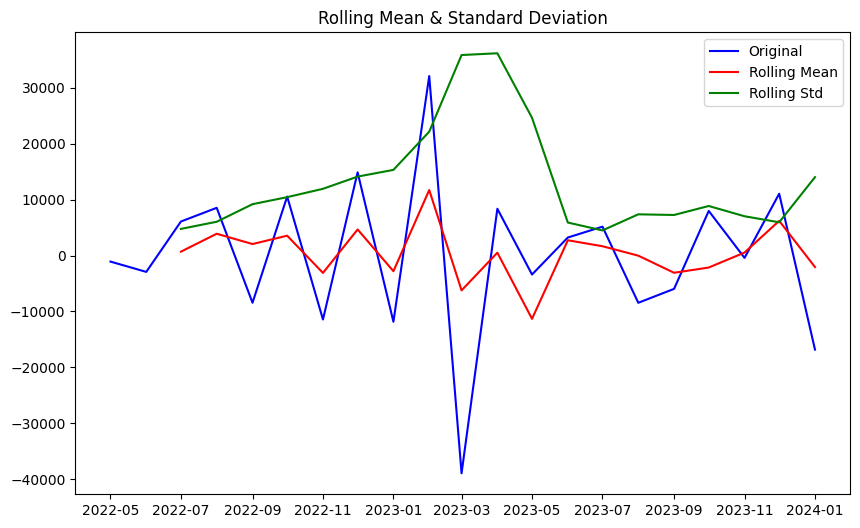

Results of Dickey-Fuller Test:
Test Statistic                -1.032481e+01
p-value                        2.944743e-18
#Lags Used                     0.000000e+00
Number of Observations Used    2.000000e+01
Critical Value (1%)           -3.809209e+00
Critical Value (5%)           -3.021645e+00
Critical Value (10%)          -2.650713e+00
dtype: float64


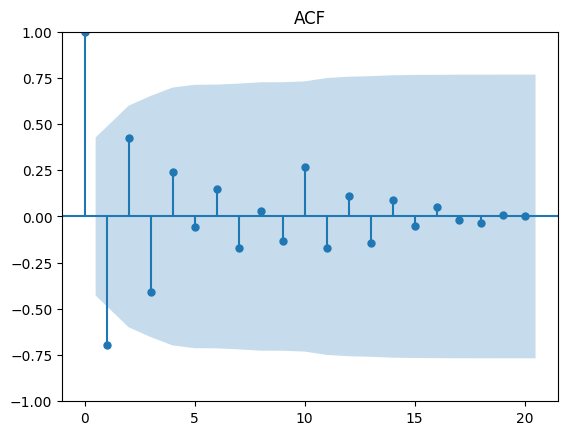

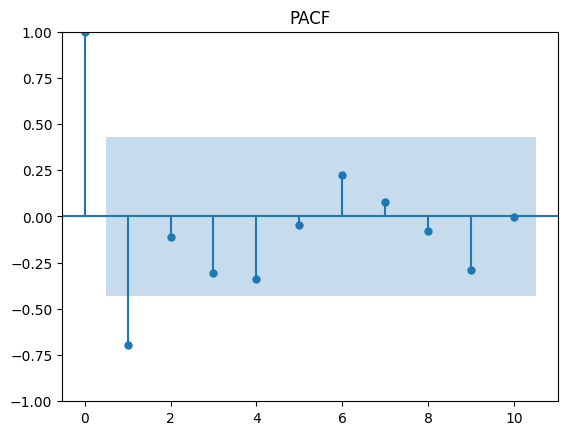

C:\Users\Garvit Goyal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Garvit Goyal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Garvit Goyal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Garvit Goyal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Garvit Goyal\AppData\Roaming\Python\Python311\site-packages\sta

                                 SARIMAX Results                                  
Dep. Variable:     cube_root_Net_UCP_diff   No. Observations:                   18
Model:                     ARIMA(1, 2, 2)   Log Likelihood                -173.806
Date:                    Mon, 27 May 2024   AIC                            355.613
Time:                            15:47:45   BIC                            358.703
Sample:                        05-01-2022   HQIC                           355.771
                             - 10-01-2023                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7202      0.127     -5.650      0.000      -0.970      -0.470
ma.L1         -1.9513      0.368     -5.297      0.000      -2.673      -1.229
ma.L2          0.994

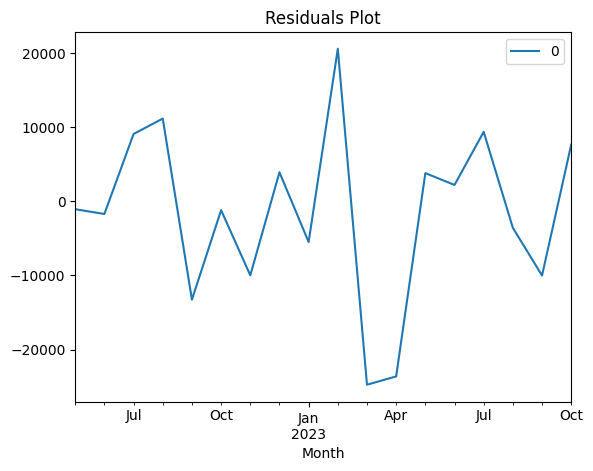

ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

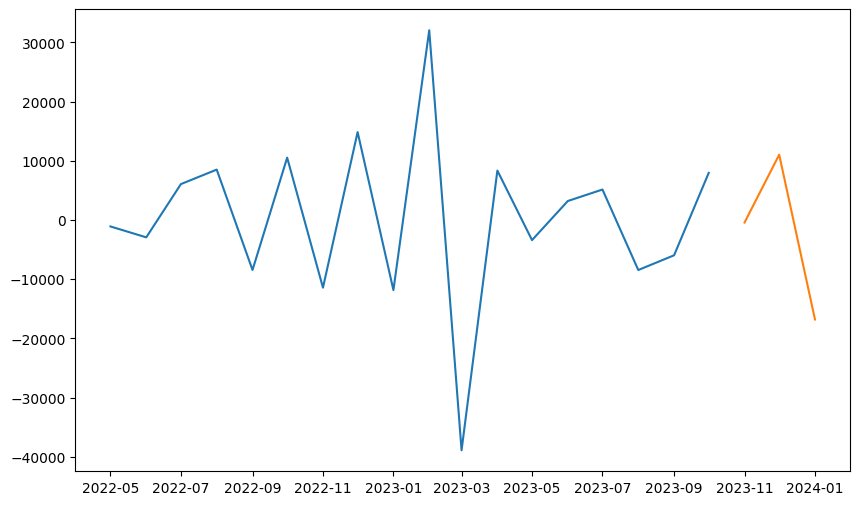

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

data = pd.DataFrame(monthly_quantity_1st_day)


df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Function to test stationarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolling_mean = timeseries.rolling(window=3).mean()
    rolling_std = timeseries.rolling(window=3).std()
    
    # Plotting rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Performing Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Testing stationarity
test_stationarity(df['cube_root_Net_UCP'])

# Differencing to make the series stationary
df['cube_root_Net_UCP_diff'] = df['cube_root_Net_UCP'] - df['cube_root_Net_UCP'].shift(1)
df.dropna(inplace=True)

# Testing stationarity again after differencing
test_stationarity(df['cube_root_Net_UCP_diff'])

# Plotting ACF and PACF
plot_acf(df['cube_root_Net_UCP_diff'], lags=len(df)-1)
plt.title('ACF')
plt.show()

plot_pacf(df['cube_root_Net_UCP_diff'], lags=int(len(df)*0.5))
plt.title('PACF')
plt.show()

# Splitting the data into train and test sets
train_size = int(len(df) * 0.9)
train, test = df['cube_root_Net_UCP_diff'][:train_size], df['cube_root_Net_UCP_diff'][train_size:]

best_aic = np.inf
best_order = None
best_model = None

# Loop through different p, d, q values
for p in range(3):
    for d in range(3):
        for q in range(3):
            try:
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
                    best_model = model_fit
            except:
                continue

# Summary of the best model
print(best_model.summary())

# Plotting residuals
residuals = pd.DataFrame(best_model.resid)
residuals.plot()
plt.title('Residuals Plot')
plt.show()

# Actual vs Fitted
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, best_model.forecast(steps=len(test))[0], label='ARIMA Forecast')
plt.title('Actual vs Fitted')
plt.xlabel('Month')
plt.ylabel('Cube Root Net UCP Difference')
plt.legend(loc='best')
plt.show()

# Evaluating the model
mse = mean_squared_error(test, best_model.forecast(steps=len(test))[0])
print('Mean Squared Error:', mse)

# Forecasting future values
forecast = best_model.forecast(steps=3)[0]
print('Forecasted Values:', forecast)


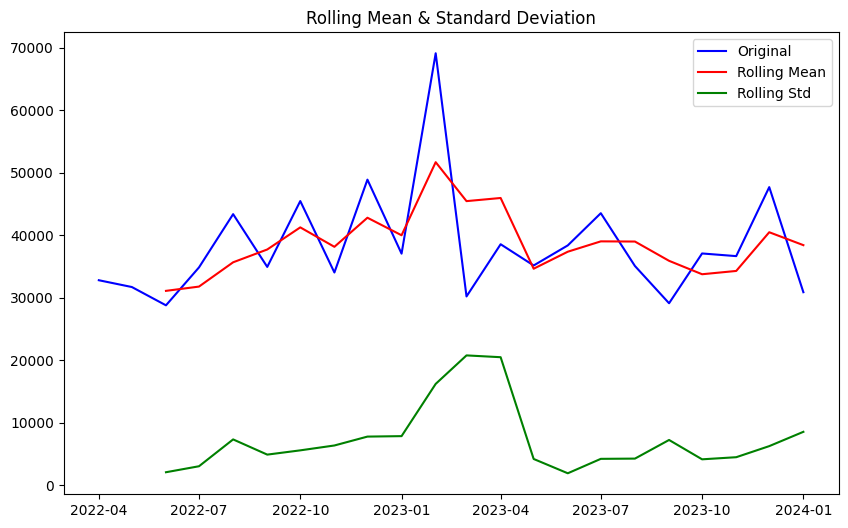

Results of Dickey-Fuller Test:
Test Statistic                 -5.437397
p-value                         0.000003
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


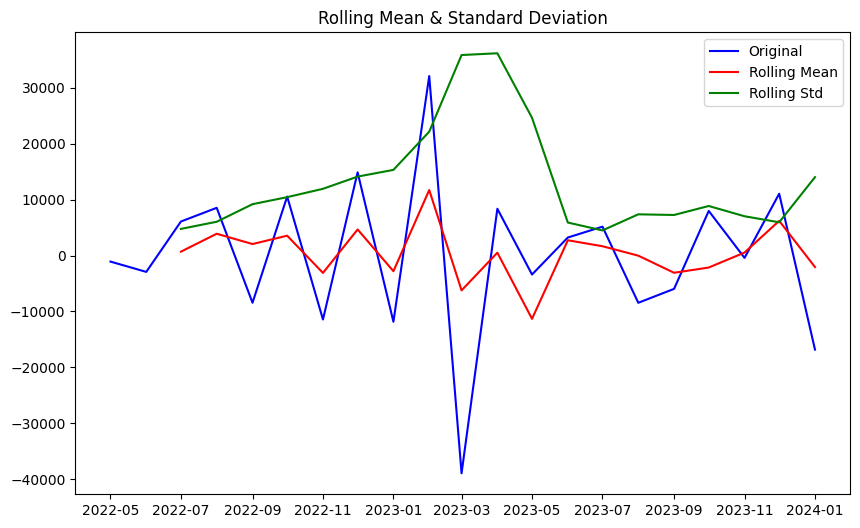

Results of Dickey-Fuller Test:
Test Statistic                -1.032481e+01
p-value                        2.944743e-18
#Lags Used                     0.000000e+00
Number of Observations Used    2.000000e+01
Critical Value (1%)           -3.809209e+00
Critical Value (5%)           -3.021645e+00
Critical Value (10%)          -2.650713e+00
dtype: float64


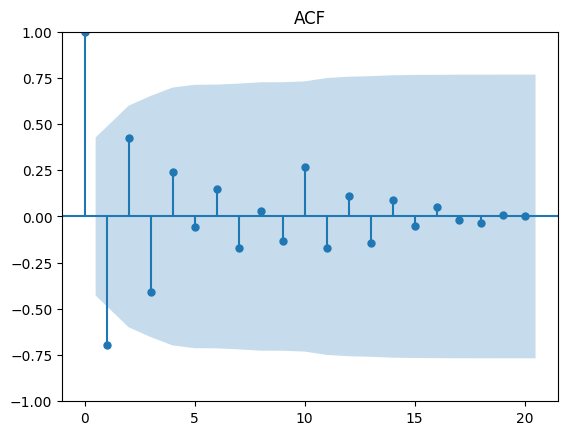

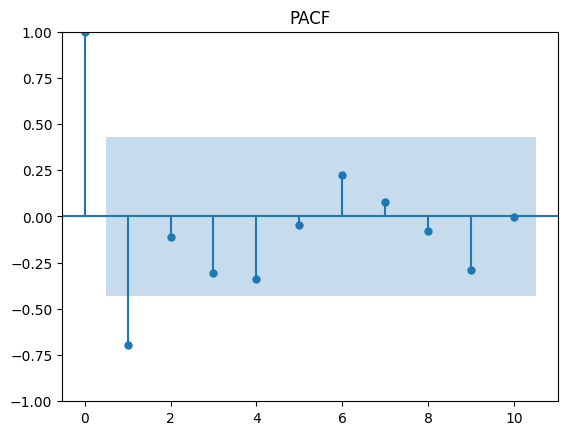

C:\Users\Garvit Goyal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Garvit Goyal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Garvit Goyal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Garvit Goyal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Garvit Goyal\AppData\Roaming\Python\Python311\site-packages\sta

Best ARIMA order: None
Best MSE: inf


TypeError: 'NoneType' object is not subscriptable

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

data = pd.DataFrame(monthly_quantity_1st_day)

df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Function to test stationarity
def test_stationarity(timeseries):
    rolling_mean = timeseries.rolling(window=3).mean()
    rolling_std = timeseries.rolling(window=3).std()
    
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Testing stationarity
test_stationarity(df['cube_root_Net_UCP'])

# Differencing to make the series stationary
df['cube_root_Net_UCP_diff'] = df['cube_root_Net_UCP'] - df['cube_root_Net_UCP'].shift(1)
df.dropna(inplace=True)

# Testing stationarity again after differencing
test_stationarity(df['cube_root_Net_UCP_diff'])

# Plotting ACF and PACF
plot_acf(df['cube_root_Net_UCP_diff'], lags=len(df)-1)
plt.title('ACF')
plt.show()

plot_pacf(df['cube_root_Net_UCP_diff'], lags=int(len(df)*0.5))
plt.title('PACF')
plt.show()

# Splitting the data into train and test sets
train_size = int(len(df) * 0.9)
train, test = df['cube_root_Net_UCP_diff'][:train_size], df['cube_root_Net_UCP_diff'][train_size:]

best_mse = float('inf')
best_order = None

# Iterate over different ARIMA parameters
for p in range(3):  # p
    for d in range(3):  # d
        for q in range(3):  # q
            try:
                # Fitting the ARIMA model
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()
                
                # Check if the model fitting is successful
                if model_fit is not None:
                    # Evaluating the model
                    mse = mean_squared_error(test, model_fit.forecast(steps=len(test))[0])

                    # Save the best parameters
                    if mse < best_mse:
                        best_mse = mse
                        best_order = (p, d, q)
            except:
                continue

print("Best ARIMA order:", best_order)
print("Best MSE:", best_mse)

# Fitting the best ARIMA model
best_model = ARIMA(train, order=best_order)
best_model_fit = best_model.fit()

# Summary of the best model
print(best_model_fit.summary())

# Plotting residuals
residuals = pd.DataFrame(best_model_fit.resid)
residuals.plot()
plt.title('Residuals Plot')
plt.show()

# Actual vs Fitted
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, best_model_fit.forecast(steps=len(test))[0], label='ARIMA Forecast')
plt.title('Actual vs Fitted')
plt.xlabel('Month')
plt.ylabel('Cube Root Net UCP Difference')
plt.legend(loc='best')
plt.show()

# Evaluating the best model
print('Mean Squared Error (Best Model):', best_mse)

# Forecasting future values with the best model
forecast = best_model_fit.forecast(steps=3)[0]
print('Forecasted Values (Best Model):', forecast)


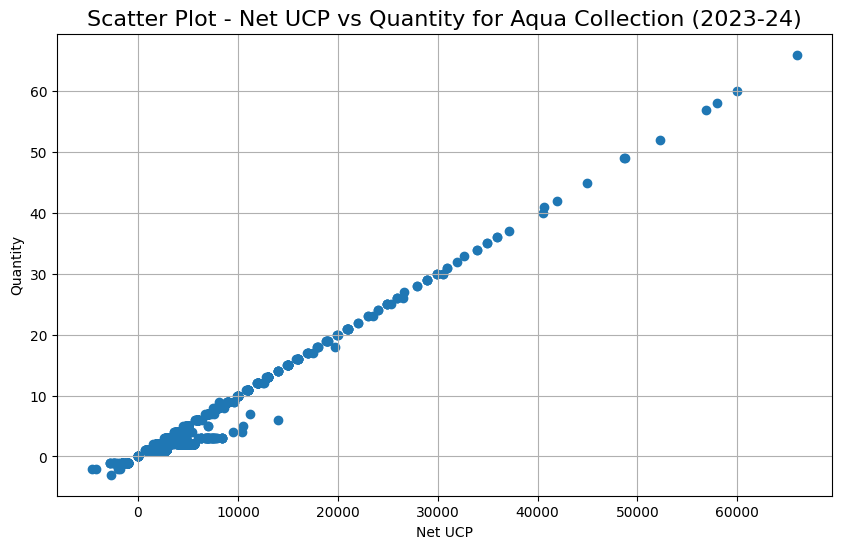

In [ ]:
#OUTLIER DETECTION
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df_transformed2'

# Filter data for the year 2023-24
df_2023_24 = df_transformed2[df_transformed2['Year'] == '2023-24']

# Filter data for the 'Aqua' collection
df_aqua = df_2023_24[df_2023_24['Collection'] == 'Aqua']

# Create the scatter plot for the 'Aqua' collection
plt.figure(figsize=(10, 6))
plt.scatter(df_aqua[' Net UCP'], df_aqua['Quantity'], marker='o')
plt.title('Scatter Plot - Net UCP vs Quantity for Aqua Collection (2023-24)', fontsize=16)
plt.xlabel('Net UCP')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()


Numeric values of Z-scores:
        Net UCP Z-score  Quantity Z-score
42915          0.338426          0.156839
42916         -0.108827         -0.217583
42967          0.078308         -0.217583
42984         -0.258535         -0.217583
43049         -0.352103         -0.217583
...                 ...               ...
940471         0.190589         -0.217583
940482        -0.258535         -0.217583
940483        -0.258535         -0.217583
940484        -0.258535         -0.217583
940524         0.190589         -0.217583

[12519 rows x 2 columns]

Percentage of data lost if outliers are removed:
1.4458023803818196


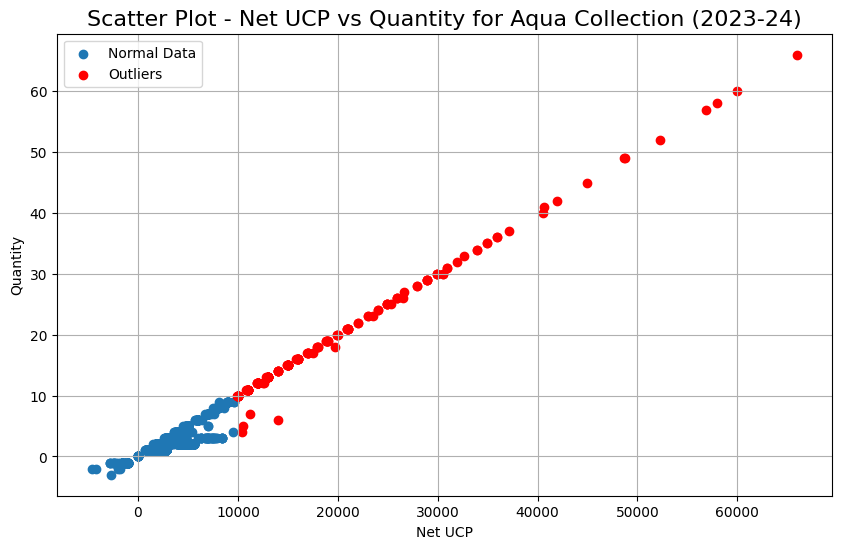

In [ ]:
#OUTLIERS DETECTION USING ZSCORE CALCULATION

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

# Assuming your data is stored in a DataFrame named 'df_transformed2'

# Filter data for the year 2023-24
df_2023_24 = df_transformed2[df_transformed2['Year'] == '2023-24']

# Filter data for the 'Aqua' collection
df_aqua = df_2023_24[df_2023_24['Collection'] == 'Aqua']

# Calculate Z-scores for 'Net UCP' and 'Quantity' columns
df_aqua['Net UCP Z-score'] = zscore(df_aqua[' Net UCP'])
df_aqua['Quantity Z-score'] = zscore(df_aqua['Quantity'])

# Output the numeric values of the Z-scores
print("Numeric values of Z-scores:")
print(df_aqua[['Net UCP Z-score', 'Quantity Z-score']])

# Determine outliers based on Z-score threshold (e.g., |Z| > 3)
z_score_threshold = 3
outliers = (np.abs(df_aqua['Net UCP Z-score']) > z_score_threshold) | (np.abs(df_aqua['Quantity Z-score']) > z_score_threshold)

# Calculate the percentage of data that will be lost if outliers are removed
percent_data_lost = outliers.mean() * 100
print("\nPercentage of data lost if outliers are removed:")
print(percent_data_lost)

# Create the scatter plot for the 'Aqua' collection with outliers highlighted
plt.figure(figsize=(10, 6))
plt.scatter(df_aqua.loc[~outliers, ' Net UCP'], df_aqua.loc[~outliers, 'Quantity'], marker='o', label='Normal Data')
plt.scatter(df_aqua.loc[outliers, ' Net UCP'], df_aqua.loc[outliers, 'Quantity'], marker='o', color='red', label='Outliers')
plt.title('Scatter Plot - Net UCP vs Quantity for Aqua Collection (2023-24)', fontsize=16)
plt.xlabel('Net UCP')
plt.ylabel('Quantity')
plt.grid(True)
plt.legend()
plt.show()


Numeric values of Z-scores:
        Net UCP Z-score  Quantity Z-score
42915          0.783440          0.156839
42916          0.027066         -0.217583
42967          0.372722         -0.217583
42984         -0.293933         -0.217583
43049         -0.522912         -0.217583
...                 ...               ...
940471         0.558323         -0.217583
940482        -0.293933         -0.217583
940483        -0.293933         -0.217583
940484        -0.293933         -0.217583
940524         0.558323         -0.217583

[12519 rows x 2 columns]

Percentage of data lost if outliers are removed:
2.252576084351785


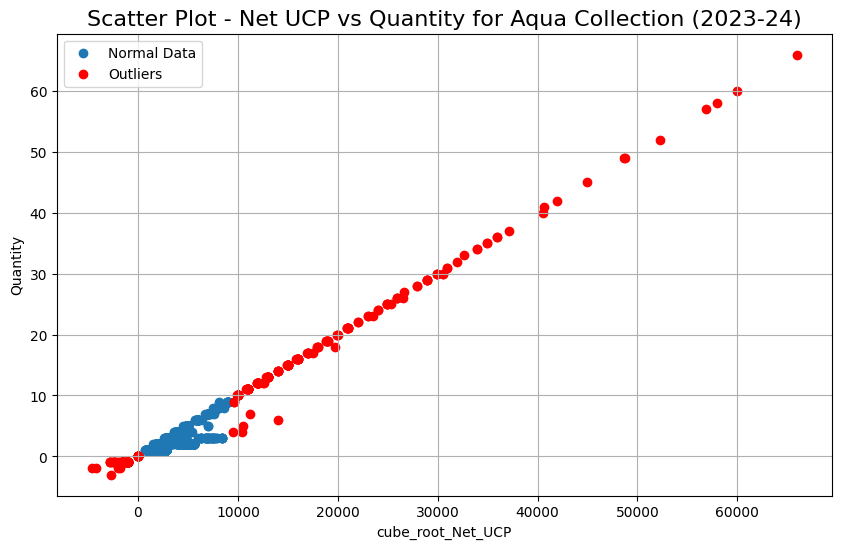

In [ ]:
#OUTLIERS DETECTION USING ZSCORE CALCULATION

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

# Assuming your data is stored in a DataFrame named 'df_transformed2'

# Filter data for the year 2023-24
df_2023_24 = df_transformed2[df_transformed2['Year'] == '2023-24']

# Filter data for the 'Aqua' collection
df_aqua = df_2023_24[df_2023_24['Collection'] == 'Aqua']

# Calculate Z-scores for 'Net UCP' and 'Quantity' columns
df_aqua['Net UCP Z-score'] = zscore(df_aqua['cube_root_Net_UCP'])
df_aqua['Quantity Z-score'] = zscore(df_aqua['Quantity'])

# Output the numeric values of the Z-scores
print("Numeric values of Z-scores:")
print(df_aqua[['Net UCP Z-score', 'Quantity Z-score']])

# Determine outliers based on Z-score threshold (e.g., |Z| > 3)
z_score_threshold = 3
outliers = (np.abs(df_aqua['Net UCP Z-score']) > z_score_threshold) | (np.abs(df_aqua['Quantity Z-score']) > z_score_threshold)

# Calculate the percentage of data that will be lost if outliers are removed
percent_data_lost = outliers.mean() * 100
print("\nPercentage of data lost if outliers are removed:")
print(percent_data_lost)

# Create the scatter plot for the 'Aqua' collection with outliers highlighted
plt.figure(figsize=(10, 6))
plt.scatter(df_aqua.loc[~outliers, ' Net UCP'], df_aqua.loc[~outliers, 'Quantity'], marker='o', label='Normal Data')
plt.scatter(df_aqua.loc[outliers, ' Net UCP'], df_aqua.loc[outliers, 'Quantity'], marker='o', color='red', label='Outliers')
plt.title('Scatter Plot - Net UCP vs Quantity for Aqua Collection (2023-24)', fontsize=16)
plt.xlabel('cube_root_Net_UCP')
plt.ylabel('Quantity')
plt.grid(True)
plt.legend()
plt.show()


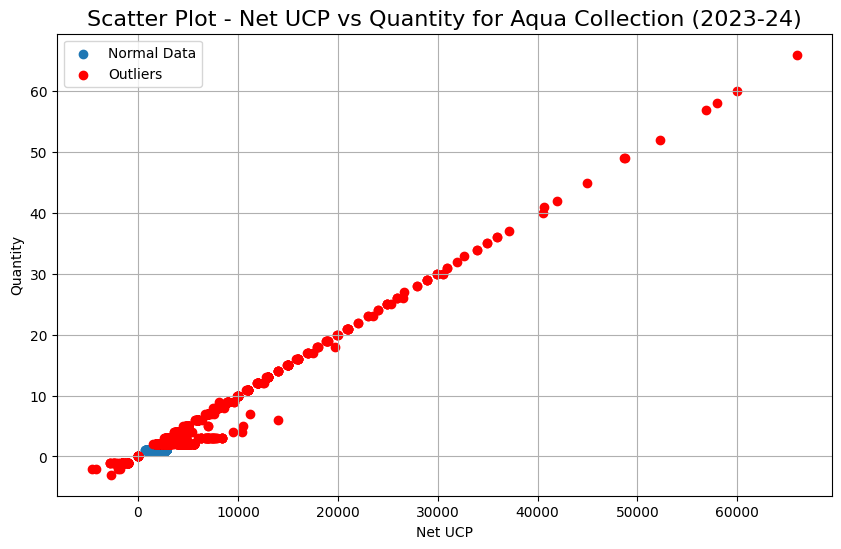

IQR for Net UCP: 1298.75
IQR for Quantity: 0.0


In [ ]:
#OUTLIERS DETECTION USING IQR METHOD
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df_transformed2'

# Filter data for the year 2023-24
df_2023_24 = df_transformed2[df_transformed2['Year'] == '2023-24']

# Filter data for the 'Aqua' collection
df_aqua = df_2023_24[df_2023_24['Collection'] == 'Aqua']

# Calculate the Interquartile Range (IQR) for 'Net UCP' and 'Quantity' columns
Q1 = df_aqua[[' Net UCP', 'Quantity']].quantile(0.25)
Q3 = df_aqua[[' Net UCP', 'Quantity']].quantile(0.75)
IQR = Q3 - Q1

# Determine lower and upper bounds for outliers using the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers = ((df_aqua[[' Net UCP', 'Quantity']] < lower_bound) | (df_aqua[[' Net UCP', 'Quantity']] > upper_bound)).any(axis=1)

# Create the scatter plot for the 'Aqua' collection with outliers highlighted
plt.figure(figsize=(10, 6))
plt.scatter(df_aqua.loc[~outliers, ' Net UCP'], df_aqua.loc[~outliers, 'Quantity'], marker='o', label='Normal Data')
plt.scatter(df_aqua.loc[outliers, ' Net UCP'], df_aqua.loc[outliers, 'Quantity'], marker='o', color='red', label='Outliers')
plt.title('Scatter Plot - Net UCP vs Quantity for Aqua Collection (2023-24)', fontsize=16)
plt.xlabel('Net UCP')
plt.ylabel('Quantity')
plt.grid(True)
plt.legend()
plt.show()

# Output the IQR values
print("IQR for Net UCP:", IQR[' Net UCP'])
print("IQR for Quantity:", IQR[ 'Quantity'])

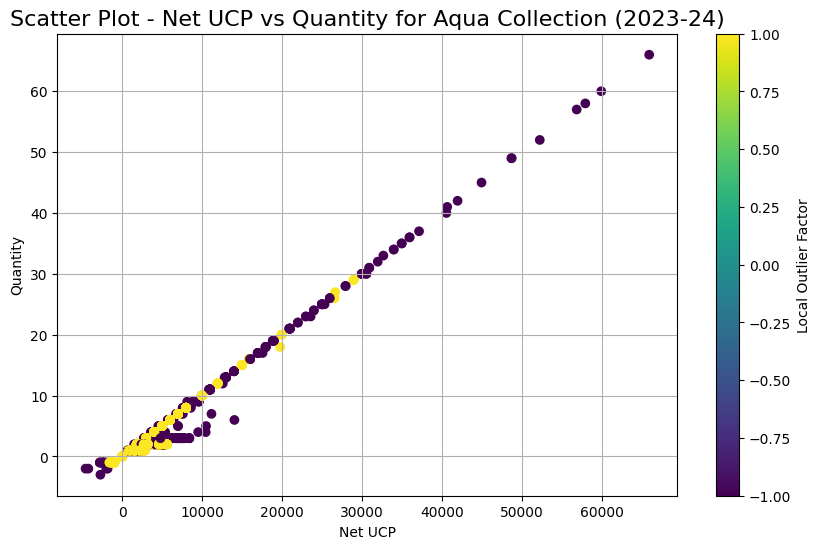

In [ ]:
#OUTLIER DETECTION USING LOCAL OUTLIER FACTOR
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Assuming your data is stored in a DataFrame named 'df_transformed2'

# Filter data for the year 2023-24
df_2023_24 = df_transformed2[df_transformed2['Year'] == '2023-24']

# Filter data for the 'Aqua' collection
df_aqua = df_2023_24[df_2023_24['Collection'] == 'Aqua']

# Extract features for LOF
X = df_aqua[[' Net UCP', 'Quantity']]

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_scores = lof.fit_predict(X)

# Create the scatter plot for the 'Aqua' collection with outliers highlighted
plt.figure(figsize=(10, 6))
plt.scatter(df_aqua[' Net UCP'], df_aqua['Quantity'], c=outlier_scores, cmap='viridis', marker='o')
plt.colorbar(label='Local Outlier Factor')
plt.title('Scatter Plot - Net UCP vs Quantity for Aqua Collection (2023-24)', fontsize=16)
plt.xlabel('Net UCP')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

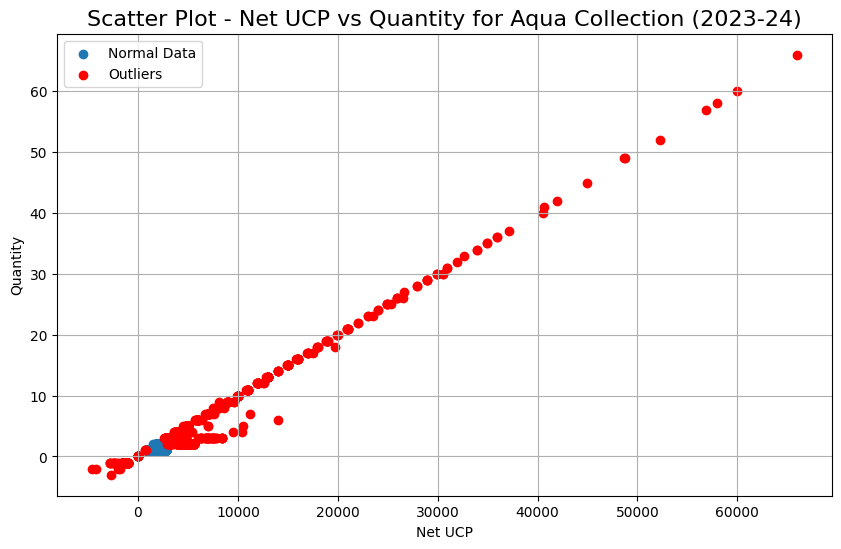

Isolation Forest results:
         Net UCP  Quantity  Outlier
42915     3190.0       2.0       -1
42916     1995.0       1.0        1
42967     2495.0       1.0        1
42984     1595.0       1.0        1
43049     1345.0       1.0        1
...          ...       ...      ...
940471    2795.0       1.0        1
940482    1595.0       1.0        1
940483    1595.0       1.0        1
940484    1595.0       1.0        1
940524    2795.0       1.0        1

[12519 rows x 3 columns]

Percentage of data that are outliers:
9.577442287722661


In [ ]:
#OUTLIER ISOLATION FORESTS

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Assuming your data is stored in a DataFrame named 'df_transformed2'

# Filter data for the year 2023-24
df_2023_24 = df_transformed2[df_transformed2['Year'] == '2023-24']

# Filter data for the 'Aqua' collection
df_aqua = df_2023_24[df_2023_24['Collection'] == 'Aqua']

# Prepare the data for the Isolation Forest model
X = df_aqua[[' Net UCP', 'Quantity']]

# Train the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df_aqua['Outlier'] = iso_forest.fit_predict(X)

# -1 indicates an outlier, 1 indicates an inlier
inliers = df_aqua['Outlier'] == 1
outliers = df_aqua['Outlier'] == -1

# Create the scatter plot for the 'Aqua' collection with outliers highlighted
plt.figure(figsize=(10, 6))
plt.scatter(df_aqua.loc[inliers, ' Net UCP'], df_aqua.loc[inliers, 'Quantity'], marker='o', label='Normal Data')
plt.scatter(df_aqua.loc[outliers, ' Net UCP'], df_aqua.loc[outliers, 'Quantity'], marker='o', color='red', label='Outliers')
plt.title('Scatter Plot - Net UCP vs Quantity for Aqua Collection (2023-24)', fontsize=16)
plt.xlabel('Net UCP')
plt.ylabel('Quantity')
plt.grid(True)
plt.legend()
plt.show()

# Output the Isolation Forest results
print("Isolation Forest results:")
print(df_aqua[[' Net UCP', 'Quantity', 'Outlier']])

# Calculate the percentage of data that are outliers
percent_outliers = (outliers.sum() / len(df_aqua)) * 100
print("\nPercentage of data that are outliers:")
print(percent_outliers)


Coefficients: [1018.08130014]
Intercept: 525.2153671066864


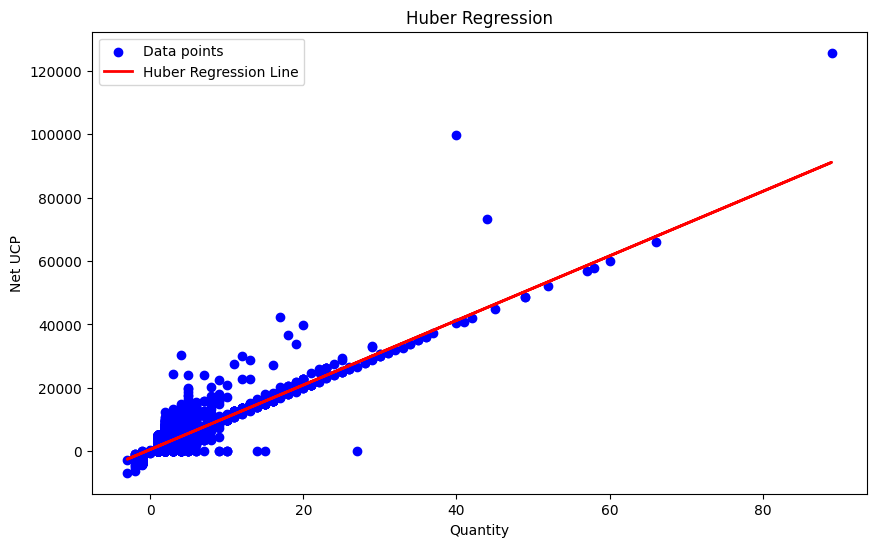

In [ ]:
import pandas as pd
from sklearn.linear_model import HuberRegressor
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df_23_24_sales_lfs' is your DataFrame containing features (X) and target variable (y)

# Separate features (X) and target variable (y)
X = df_23_24_sales_lfs[['Quantity']]  # Selecting 'Quantity' as the feature
y = df_23_24_sales_lfs[' Net UCP']    # Selecting 'Net UCP' as the target variable

# Create a HuberRegressor object (commonly used robust regression model)
huber_reg = HuberRegressor(epsilon=1.35) 

# Fit the model on your data
huber_reg.fit(X, y)

# Optional: Get predictions or perform other model operations with huber_reg
predictions = huber_reg.predict(X)

# Print the coefficients of the fitted model
print("Coefficients:", huber_reg.coef_)
# Print the intercept of the fitted model
print("Intercept:", huber_reg.intercept_)

# Plotting the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions, color='red', linewidth=2, label='Huber Regression Line')
plt.xlabel('Quantity')
plt.ylabel('Net UCP')
plt.title('Huber Regression')
plt.legend()
plt.show()


(array([1.80358e+05, 1.90400e+03, 8.50000e+01, 1.70000e+01, 5.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ -6785.   ,   6464.009,  19713.018,  32962.027,  46211.036,
         59460.045,  72709.054,  85958.063,  99207.072, 112456.081,
        125705.09 ]),
 <BarContainer object of 10 artists>)

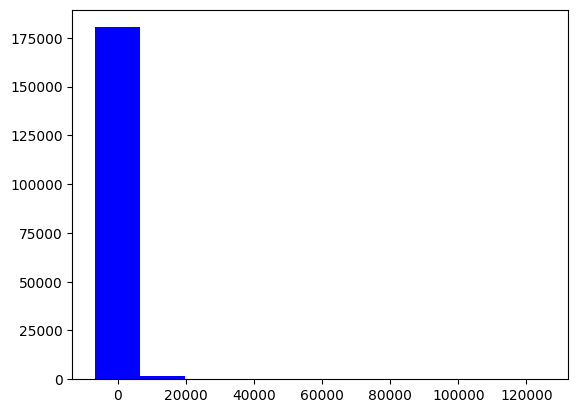

In [ ]:
plt.hist(df_23_24_sales_lfs[' Net UCP'], bins=10, color='blue', alpha=1)

In [ ]:
df_23_24_sales_lfs[' Net UCP'].value_counts()

 Net UCP
499.00     26774
645.00     16756
2595.00    12055
1995.00    11151
1795.50     5758
           ...  
7030.50        1
4535.35        1
1737.91        1
2541.23        1
7602.88        1
Name: count, Length: 7439, dtype: int64

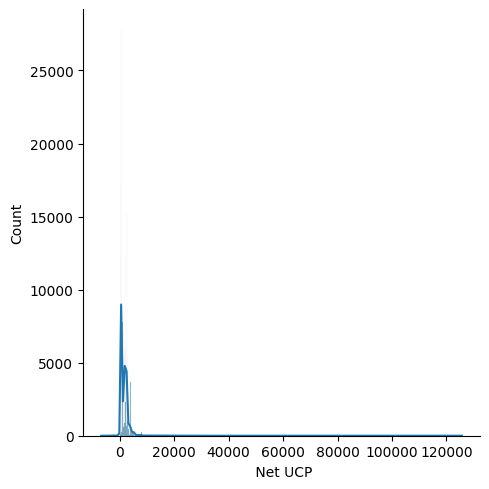

In [ ]:
sns.displot(df_23_24_sales_lfs[' Net UCP'], kde=True)

<Axes: xlabel=' Net UCP'>

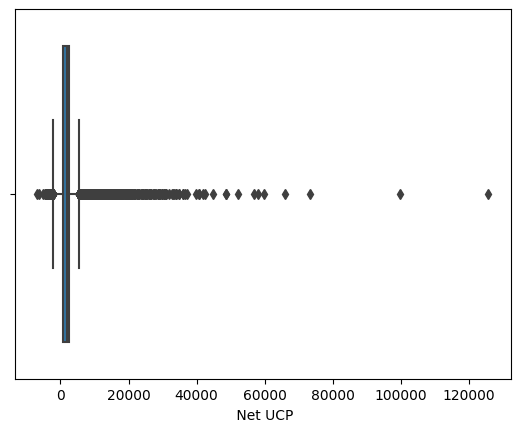

In [ ]:
sns.boxplot(data=df_23_24_sales_lfs, x=' Net UCP')

In [ ]:
df_23_24_sales_lfs[df_23_24_sales_lfs[' Net UCP'] < 0].shape
#These might indicates the return or refunds 

(543, 23)

In [ ]:
df_23_24_sales_lfs[(df_23_24_sales_lfs[' Net UCP'] < 0) & (df_23_24_sales_lfs['Quantity'] >= 0)].shape

(10, 23)

In [ ]:
df_23_24_sales_lfs[(df_23_24_sales_lfs[' Net UCP'] < 0) & (df_23_24_sales_lfs['Quantity'] >= 0)].head()

Year      Month Month Key QTR Region         Invoice Date  \
53626   2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-30 00:00:00   
56352   2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-30 00:00:00   
321424  2023-24 2023-07-01       Jul  Q2   West  2023-07-16 00:00:00   
467528  2023-24 2023-09-01       Sep  Q2   West  2023-09-06 00:00:00   
545593  2023-24 2023-10-01       Oct  Q3   East  2023-10-15 00:00:00   

         Material  Quantity Gender Brand  ...           Bill to Party Name  \
53626   NFFW05PG2       0.0      L    TF  ...            LS-VR Mall-Nagpur   
56352     FW22PC1       0.0      L    TF  ...            LS-VR Mall-Nagpur   
321424  NFFW03PFC       0.0      L    TF  ...  Phoenix Market City-LS-PUNE   
467528  NFFW02PFL       0.0      L    TF  ...         Ls Seasons Mall-Pune   
545593  NFFW04PFC       0.0      L    TF  ...        PT-SOUTH CITY-KOLKATA   

         MRP Gross UCP  Net UCP  Bill to Party City  ShiptopartyStateCode  \
53626   1995       0.0   -44.08              NAGPUR            MAHARASTRA   
56352   3095       0.0   -68.39              NAGPUR            MAHARASTRA   
321424  2595       0.0  -259.50                Pune            MAHARASTRA   
467528  1895       0.0  -189.50                Pune            MAHARASTRA   
545593  2595       0.0  -709.50             Kolkata           WEST BENGAL   

        Channel-2 Billing grp        Varient Name2      Collection  
53626         LFS         LFS   Mini 25 ml W (C,S)       Gift Pack  
56352         LFS         LFS  Noura W Iris 100 ml   Noura W 100ml  
321424        LFS         LFS           100 W Nude  Classic 100 ml  
467528        LFS         LFS         50 W Celeste   Classic 50 ml  
545593        LFS         LFS          100 W Sheer  Classic 100 ml  

[5 rows x 23 columns]

In [ ]:
df_23_24_sales_lfs[df_23_24_sales_lfs[' Net UCP'] < 0][[' Net UCP', 'Gross UCP']]
# df_23_24_sales_lfs[(df_23_24_sales_lfs['Gross UCP'] > df_23_24_sales_lfs[' Net UCP']][[' Net UCP', 'Gross UCP']

Net UCP  Gross UCP
43974   -2306.03    -2595.0
44045    -556.40     -645.0
44048   -2583.60    -2995.0
44097    -645.00     -645.0
44294   -2681.23    -3095.0
...          ...        ...
938859  -1995.00    -1995.0
939700  -1995.00    -1995.0
939912  -1404.66    -1595.0
940415   -998.00     -998.0
940498  -2595.00    -2595.0

[543 rows x 2 columns]

In [ ]:
df_23_24_sales_lfs[(df_23_24_sales_lfs[' Net UCP'] < 0) & (df_23_24_sales_lfs['Gross UCP'] > df_23_24_sales_lfs[' Net UCP'])][[' Net UCP', 'Gross UCP']].sample(12)

Net UCP  Gross UCP
552348   -457.94        0.0
48570   -4000.00    -3995.0
781280  -6380.00    -3190.0
321424   -259.50        0.0
467528   -189.50        0.0
53626     -44.08        0.0
56352     -68.39        0.0
641896     -0.01      645.0
545593   -709.50        0.0
768953   -179.23        0.0
932175    -87.91        0.0
930027    -84.64        0.0

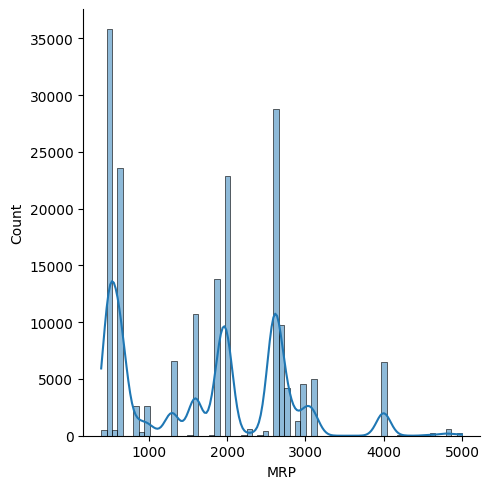

In [ ]:
sns.displot(df_23_24_sales_lfs['MRP'], kde=True)

(array([6.2975e+04, 9.4130e+03, 1.0950e+04, 3.6824e+04, 2.9837e+04,
        2.4734e+04, 0.0000e+00, 6.5250e+03, 4.1000e+01, 1.0750e+03]),
 array([ 395.,  855., 1315., 1775., 2235., 2695., 3155., 3615., 4075.,
        4535., 4995.]),
 <BarContainer object of 10 artists>)

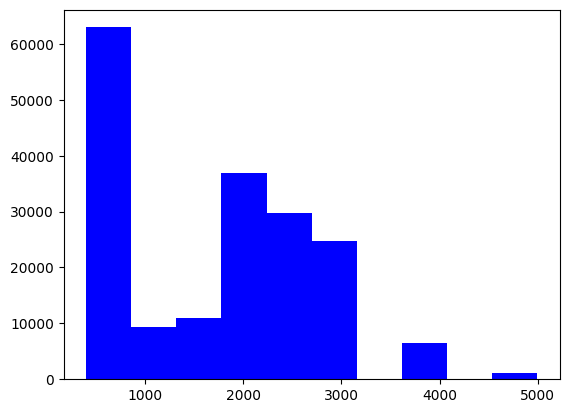

In [ ]:
plt.hist(df_23_24_sales_lfs['MRP'], bins=10, color='blue', alpha=1)

In [ ]:
df_23_24_sales_lfs['Franchisee store'].nunique()

342

In [ ]:
df_23_24_sales_lfs['Channel'].value_counts()
#Here the 'ss' might indicate the small scale values as well or might have the anomanly in the data entry as well

Channel
SS    88915
LS    70208
PT    14569
CT     7917
LL      655
AZ       69
ss       41
Name: count, dtype: int64

<Axes: xlabel='Channel', ylabel='count'>

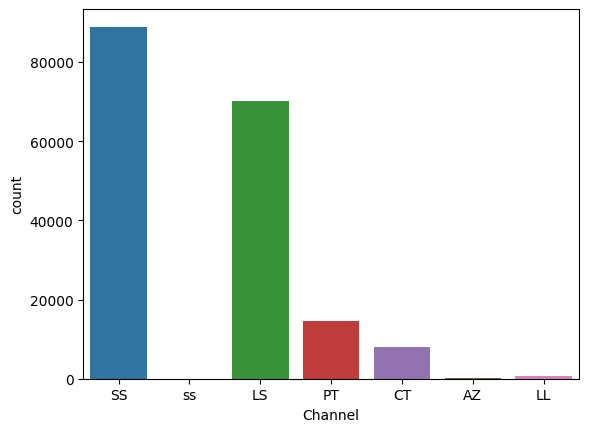

In [ ]:
sns.countplot(data=df_23_24_sales_lfs, x='Channel')

<Axes: xlabel='Quantity'>

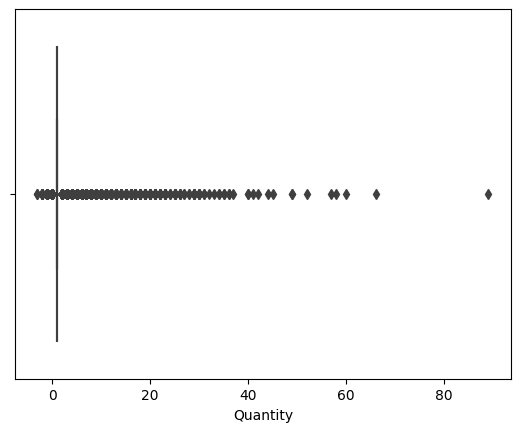

In [ ]:
sns.boxplot(data=df_23_24_sales_lfs, x='Quantity')

In [ ]:
df_23_24_sales_lfs.nlargest(30, 'Quantity')
#Bulk order by the customers which might not play the 

Year      Month Month Key QTR Region         Invoice Date  \
641708  2023-24 2023-11-01       Nov  Q3   West  2023-11-07 00:00:00   
560619  2023-24 2023-10-01       Oct  Q3   East  2023-10-02 00:00:00   
560715  2023-24 2023-10-01       Oct  Q3   East  2023-10-15 00:00:00   
560603  2023-24 2023-10-01       Oct  Q3   East  2023-10-07 00:00:00   
560613  2023-24 2023-10-01       Oct  Q3   East  2023-10-08 00:00:00   
475285  2023-24 2023-09-01       Sep  Q2   East  2023-09-24 00:00:00   
475281  2023-24 2023-09-01       Sep  Q2   East  2023-09-30 00:00:00   
560610  2023-24 2023-10-01       Oct  Q3   East  2023-10-01 00:00:00   
560617  2023-24 2023-10-01       Oct  Q3   East  2023-10-15 00:00:00   
646284  2023-24 2023-11-01       Nov  Q3   West  2023-11-11 00:00:00   
560032  2023-24 2023-10-01       Oct  Q3   East  2023-10-02 00:00:00   
560711  2023-24 2023-10-01       Oct  Q3   East  2023-10-08 00:00:00   
46322   2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-11 00:00:00   
560720  2023-24 2023-10-01       Oct  Q3   East  2023-10-02 00:00:00   
560705  2023-24 2023-10-01       Oct  Q3   East  2023-10-01 00:00:00   
475323  2023-24 2023-09-01       Sep  Q2   East  2023-09-24 00:00:00   
560175  2023-24 2023-10-01       Oct  Q3   East  2023-10-02 00:00:00   
560023  2023-24 2023-10-01       Oct  Q3   East  2023-10-08 00:00:00   
560729  2023-24 2023-10-01       Oct  Q3   East  2023-10-18 00:00:00   
475283  2023-24 2023-09-01       Sep  Q2   East  2023-09-23 00:00:00   
559095  2023-24 2023-10-01       Oct  Q3   East  2023-10-08 00:00:00   
560026  2023-24 2023-10-01       Oct  Q3   East  2023-10-07 00:00:00   
560714  2023-24 2023-10-01       Oct  Q3   East  2023-10-07 00:00:00   
560606  2023-24 2023-10-01       Oct  Q3   East  2023-10-10 00:00:00   
560611  2023-24 2023-10-01       Oct  Q3   East  2023-10-14 00:00:00   
475279  2023-24 2023-09-01       Sep  Q2   East  2023-09-28 00:00:00   
475325  2023-24 2023-09-01       Sep  Q2   East  2023-09-26 00:00:00   
560020  2023-24 2023-10-01       Oct  Q3   East  2023-10-01 00:00:00   
560704  2023-24 2023-10-01       Oct  Q3   East  2023-10-14 00:00:00   
560726  2023-24 2023-10-01       Oct  Q3   East  2023-10-17 00:00:00   

          Material  Quantity Gender Brand  ...            Bill to Party Name  \
641708   NFFM01CL2      89.0      G    TF  ...           CT-Vadodara Central   
560619   NFFM14PH1      66.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
560715   NFFW14PH1      60.0      L    TF  ...    128-SSL-SOUTH CITY KOLKATA   
560603   NFFM14PH1      58.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
560613   NFFM14PH1      57.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
475285   NFFM14PH1      52.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
475281   NFFM14PH1      49.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
560610   NFFM14PH1      49.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
560617   NFFM14PH1      45.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
646284   NFFP01PG2      44.0      P    TF  ...               Runwal - Mulund   
560032   NFFM14PH1      42.0      G    TF  ...     115-SSL-SALT LAKE KOLKATA   
560711   NFFW14PH1      41.0      L    TF  ...    128-SSL-SOUTH CITY KOLKATA   
46322   NFFP01PGFL      40.0      P    TF  ...  223-SSL - CHINCHWAD PUNE 223   
560720   NFFW14PH1      40.0      L    TF  ...    128-SSL-SOUTH CITY KOLKATA   
560705   NFFW14PH1      37.0      L    TF  ...    128-SSL-SOUTH CITY KOLKATA   
475323   NFFW14PH1      36.0      L    TF  ...    128-SSL-SOUTH CITY KOLKATA   
560175   NFFW14PH1      36.0      L    TF  ...     115-SSL-SALT LAKE KOLKATA   
560023   NFFM14PH1      35.0      G    TF  ...     115-SSL-SALT LAKE KOLKATA   
560729   NFFW14PH1      35.0      L    TF  ...    128-SSL-SOUTH CITY KOLKATA   
475283   NFFM14PH1      34.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
559095   NFFM14PH1      34.0      G    TF  ...     188-SSL-ACROPOLIS KOLKATA   
560026   NFFM14PH1

In [ ]:
df_23_24_sales_lfs[df_23_24_sales_lfs['Quantity'] > 10]

Year      Month Month Key QTR Region         Invoice Date  \
46322   2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-11 00:00:00   
48028   2023-24 2023-04-01       Apr  Q1  NORTH  2023-04-26 00:00:00   
186242  2023-24 2023-06-01       Jun  Q1   West  2023-06-24 00:00:00   
193177  2023-24 2023-06-01       Jun  Q1   West  2023-06-11 00:00:00   
196021  2023-24 2023-06-01       Jun  Q1   East  2023-06-15 00:00:00   
...         ...        ...       ...  ..    ...                  ...   
888313  2023-24 2024-01-01       Jan  Q4    NaN  2024-01-28 00:00:00   
888314  2023-24 2024-01-01       Jan  Q4    NaN  2024-01-18 00:00:00   
888416  2023-24 2024-01-01       Jan  Q4    NaN  2024-01-14 00:00:00   
888423  2023-24 2024-01-01       Jan  Q4    NaN  2024-01-04 00:00:00   
888427  2023-24 2024-01-01       Jan  Q4    NaN  2024-01-13 00:00:00   

          Material  Quantity Gender Brand  ...            Bill to Party Name  \
46322   NFFP01PGFL      40.0      P    TF  ...  223-SSL - CHINCHWAD PUNE 223   
48028    NFFW01CL2      13.0      G    TF  ...            182-SSL-WTP JAIPUR   
186242   NFFM14PH1      11.0      G    TF  ...   Phoenix Market City-LS-PUNE   
193177   NFFM02PFL      12.0      G    TF  ...                 153-SSL-THANE   
196021   NFFM02PFL      11.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
...            ...       ...    ...   ...  ...                           ...   
888313   NFFM14PH1      15.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
888314   NFFM14PH1      15.0      G    TF  ...    128-SSL-SOUTH CITY KOLKATA   
888416   NFFW14PH1      11.0      L    TF  ...    128-SSL-SOUTH CITY KOLKATA   
888423   NFFW14PH1      12.0      L    TF  ...    128-SSL-SOUTH CITY KOLKATA   
888427   NFFW14PH1      11.0      L    TF  ...    128-SSL-SOUTH CITY KOLKATA   

         MRP Gross UCP   Net UCP  Bill to Party City  ShiptopartyStateCode  \
46322   2995  119800.0  99800.00                Pune            MAHARASTRA   
48028   1995   25935.0  22935.00              Jaipur             RAJASTHAN   
186242  1595   17545.0  10839.15                Pune            MAHARASTRA   
193177  1895   22740.0  13740.00              Mumbai            MAHARASTRA   
196021  1895   20845.0  12595.00             Kolkata            WESTBENGAL   
...      ...       ...       ...                 ...                   ...   
888313  1595   23925.0  14985.00             Kolkata           WEST BENGAL   
888314  1595   23925.0  14985.00             Kolkata           WEST BENGAL   
888416  1595   17545.0  10989.00             Kolkata           WEST BENGAL   
888423  1595   19140.0  11988.00             Kolkata           WEST BENGAL   
888427  1595   17545.0  10989.00             Kolkata           WEST BENGAL   

        Channel-2 Billing grp          Varient Name2     Collection  
46322         LFS         LFS  His & Her 50 ml (R,C)      Gift Pack  
48028         LFS         LFS  Coffret Deo W Celeste      Gift Pack  
186242        LFS         LFS           Aqua M 30 ml           Aqua  
193177        LFS         LFS            50 M Steele  Classic 50 ml  
196021        LFS         LFS            50 M Steele  Classic 50 ml  
...           ...         ...                    ...            ...  
888313        LFS         LFS           Aqua M 30 ml           Aqua  
888314        LFS         LFS           Aqua M 30 ml           Aqua  
888416        LFS         LFS           Aqua W 30 ml           Aqua  
888423        LFS         LFS           Aqua W 30 ml           Aqua  
888427        LFS         LFS           Aqua W 30 ml           Aqua  

[263 rows x 23 columns]

In [ ]:
df_23_24_sales_lfs[df_23_24_sales_lfs['Franchisee store'].isnull()]

Year      Month Month Key QTR Region         Invoice Date  \
308390  2023-24 2023-07-01       Jul  Q2  South  2023-07-26 00:00:00   
308391  2023-24 2023-07-01       Jul  Q2  South  2023-07-29 00:00:00   
308392  2023-24 2023-07-01       Jul  Q2  South  2023-07-22 00:00:00   
308393  2023-24 2023-07-01       Jul  Q2  South  2023-07-16 00:00:00   
308394  2023-24 2023-07-01       Jul  Q2  South  2023-07-29 00:00:00   
...         ...        ...       ...  ..    ...                  ...   
326504  2023-24 2023-07-01       Jul  Q2  North  2023-07-31 00:00:00   
326505  2023-24 2023-07-01       Jul  Q2  North  2023-07-31 00:00:00   
326506  2023-24 2023-07-01       Jul  Q2   West  2023-07-31 00:00:00   
326507  2023-24 2023-07-01       Jul  Q2   West  2023-07-31 00:00:00   
326508  2023-24 2023-07-01       Jul  Q2   West  2023-07-31 00:00:00   

         Material  Quantity Gender Brand  ...              Bill to Party Name  \
308390  NEFM02PFC       1.0      G    TF  ...               158-SSL-VIJAYWADA   
308391  NFFM01PGC       1.0      G    TF  ...               158-SSL-VIJAYWADA   
308392  NFFM01PGC       1.0      G    TF  ...               158-SSL-VIJAYWADA   
308393  NFFM01PGC       1.0      G    TF  ...               158-SSL-VIJAYWADA   
308394  NFFM02PFC       1.0      G    TF  ...               158-SSL-VIJAYWADA   
...           ...       ...    ...   ...  ...                             ...   
326504   NFW01DQ1       1.0      L    TF  ...  PT-VINAYAK CITY CENTRE-ALLAHAB   
326505   NFM04DQ1       1.0      G    TF  ...         PT-PHOENIX MALL-LUCKNOW   
326506   NFW02DQ1       1.0      L    TF  ...     PT-VIVANA MALL THANE-MUMBAI   
326507  NFFW03PFC       1.0      L    TF  ...     PT-VIVANA MALL THANE-MUMBAI   
326508  NFFP01PG2       1.0      P    TF  ...     PT-PHOENIX MARKET CITY-PUNE   

         MRP Gross UCP  Net UCP  Bill to Party City  ShiptopartyStateCode  \
308390  2295    2295.0  2065.50          Vijayawada        ANDHRA PRADESH   
308391  2595    2595.0  2335.50          Vijayawada        ANDHRA PRADESH   
308392  2595    2595.0  2335.50          Vijayawada        ANDHRA PRADESH   
308393  2595    2595.0  2335.50          Vijayawada        ANDHRA PRADESH   
308394  2595    2595.0  2335.50          Vijayawada        ANDHRA PRADESH   
...      ...       ...      ...                 ...                   ...   
326504   499     499.0   481.51           Allahabad         UTTAR PRADESH   
326505   499     499.0   499.00             Lucknow         UTTAR PRADESH   
326506   499     499.0   499.00              Mumbai            MAHARASTRA   
326507  2595    2595.0  2595.00              Mumbai            MAHARASTRA   
326508  1995    1995.0  1795.50                Pune            MAHARASTRA   

        Channel-2 Billing grp               Varient Name2      Collection  
308390        LFS         LFS                100 M Steele  Classic 100 ml  
308391        LFS         LFS                   100 M Raw  Classic 100 ml  
308392        LFS         LFS                   100 M Raw  Classic 100 ml  
308393        LFS         LFS                   100 M Raw  Classic 100 ml  
308394        LFS         LFS                100 M Steele  Classic 100 ml  
...           ...         ...                         ...             ...  
326504        LFS         LFS           150 W Celeste Deo     Premium Deo  
326505        LFS         LFS        Deo M F Rouge 150 ml    Escapade Deo  
326506        LFS         LFS              150 W Nude Deo     Premium Deo  
326507        LFS         LFS                  100 W Nude  Classic 100 ml  
326508        LFS         LFS  His & Her Mini 25 ml (V,S)       Gift Pack  

[18119 rows x 23 columns]

<Axes: xlabel='Gross UCP', ylabel='Quantity'>

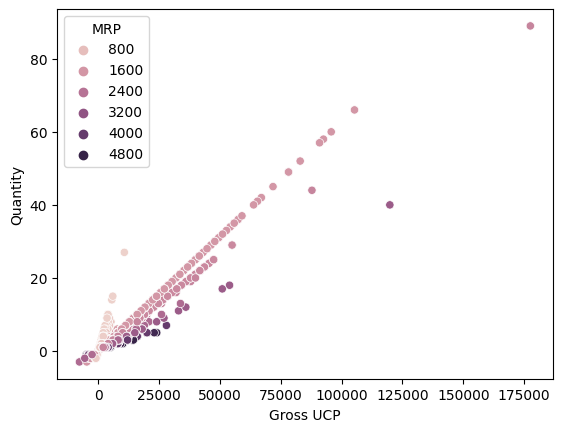

In [ ]:
#BIVARIATE ANALYSIS
sns.scatterplot(data=df_23_24_sales_lfs, x='Gross UCP', y='Quantity', hue='MRP')

<Axes: xlabel='MRP', ylabel='Quantity'>

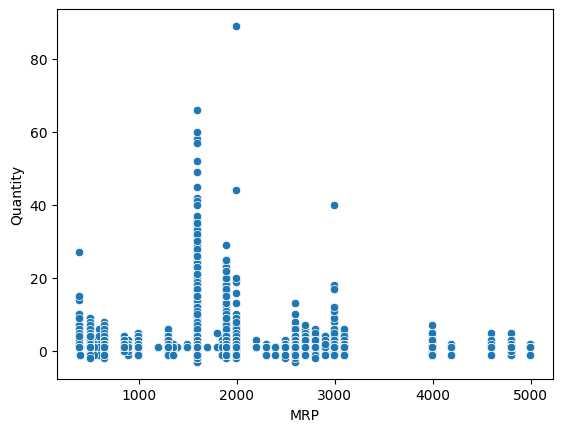

In [ ]:
sns.scatterplot(data=df_23_24_sales_lfs, x='MRP', y='Quantity')

<Axes: xlabel='Gross UCP', ylabel='Quantity'>

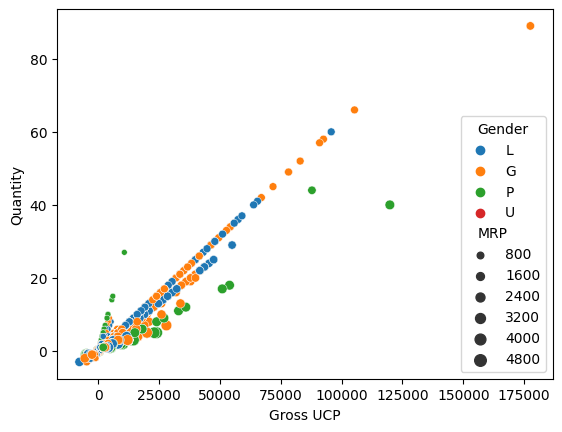

In [ ]:
sns.scatterplot(data=df_23_24_sales_lfs, x='Gross UCP', y='Quantity', size='MRP', hue='Gender')

<Axes: xlabel='Gross UCP', ylabel='Quantity'>

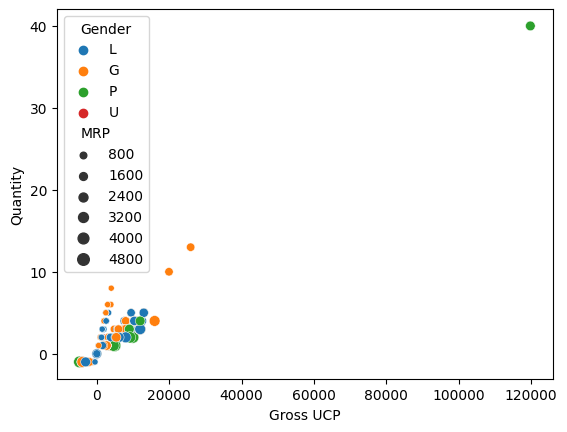

In [ ]:
sns.scatterplot(data=df_23_24_sales_lfs[df_23_24_sales_lfs['Region'] == 'NORTH'], x='Gross UCP', y='Quantity', size='MRP', hue='Gender')

In [ ]:
df_23_24_sales_lfs['Region'].value_counts()

Region
West     46309
South    39364
North    34229
East     31761
NORTH    16354
Name: count, dtype: int64

In [ ]:
df_23_24_sales_lfs['Region'] = df_23_24_sales_lfs['Region'].replace('NORTH', 'North')

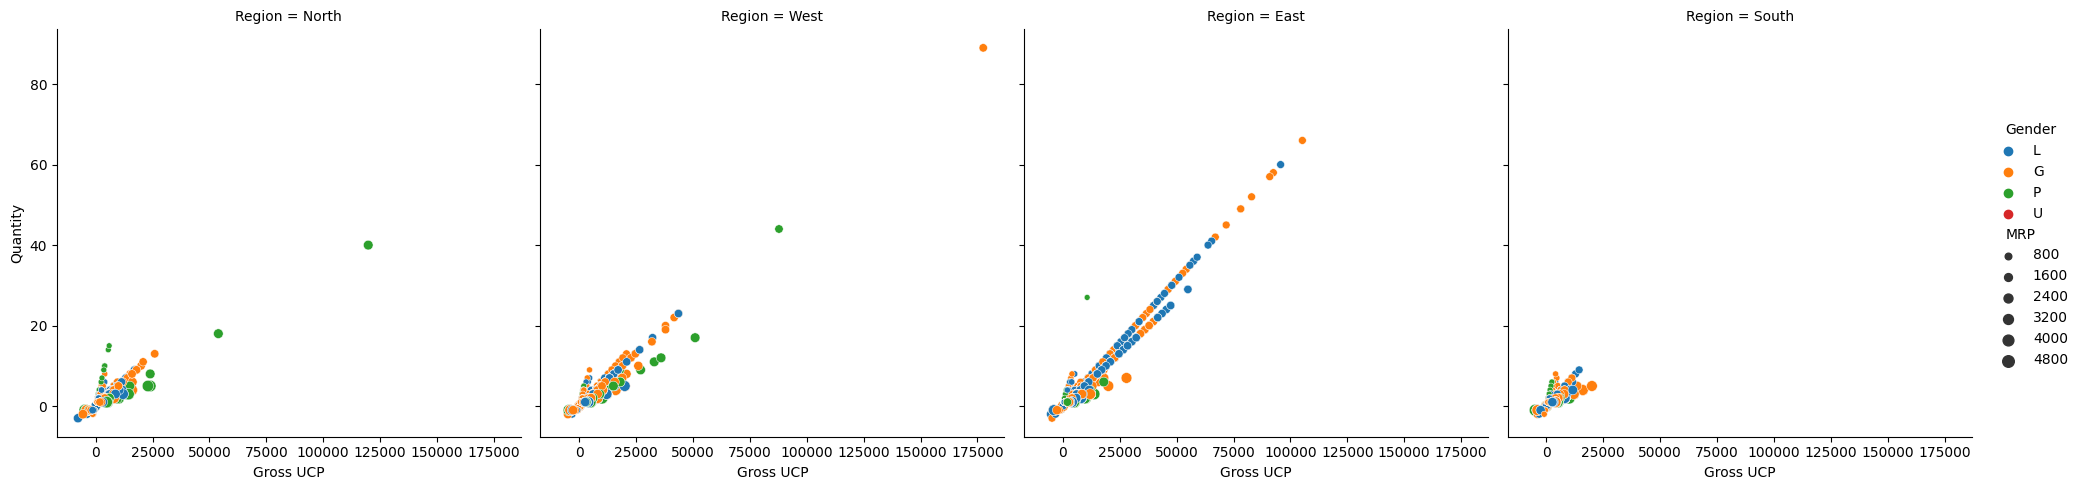

In [ ]:
sns.relplot(data=df_23_24_sales_lfs, x='Gross UCP', y='Quantity', size='MRP', hue='Gender', col='Region', kind='scatter')

In [ ]:
df_23_24_sales_lfs.sample(10)

Year      Month Month Key QTR Region         Invoice Date  \
361583  2023-24 2023-08-01       Aug  Q2   West  2023-08-29 00:00:00   
192002  2023-24 2023-06-01       Jun  Q1   West  2023-06-20 00:00:00   
282936  2023-24 2023-05-01       May  Q1  North  2023-05-22 00:00:00   
774987  2023-24 2023-12-01       Dec  Q3  South  2023-12-28 00:00:00   
45575   2023-24 2023-04-01       Apr  Q1  North  2023-04-23 00:00:00   
559540  2023-24 2023-10-01       Oct  Q3   East  2023-10-13 00:00:00   
885819  2023-24 2024-01-01       Jan  Q4    NaN  2024-01-06 00:00:00   
465210  2023-24 2023-09-01       Sep  Q2  South  2023-09-28 00:00:00   
776614  2023-24 2023-12-01       Dec  Q3  North  2023-12-23 00:00:00   
195806  2023-24 2023-06-01       Jun  Q1   East  2023-06-10 00:00:00   

          Material  Quantity Gender Brand  ...  \
361583  NFFP01PGFL       1.0      P    TF  ...   
192002   NFFW01CL2       1.0      G    TF  ...   
282936    NFW03DQ1       1.0      L    TF  ...   
774987   NEFW11PD1       1.0      L    TF  ...   
45575    NFFW02PFL       1.0      L    TF  ...   
559540    NFM02DQ1       1.0      G    TF  ...   
885819   NFFW14PH1       3.0      L    TF  ...   
465210   NEFM13PD1       1.0      G    TF  ...   
776614   NFFM02PFL       4.0      G    TF  ...   
195806     FW22PC1       1.0      L    TF  ...   

                      Bill to Party Name   MRP Gross UCP  Net UCP  \
361583                     144-SSL-VASHI  2995    2995.0  2545.75   
192002                   101-SSL-ANDHERI  1995    1995.0  1795.50   
282936               Mahagun - Ghaziabad   499     499.0   433.22   
774987              199-SSL-VISHAKAPATNM   645     645.0   645.00   
45575                     161-SSL-MYSORE  1895    1895.0  1645.00   
559540  484-SSL-MANI SQAURE MALL KOLKATA   499     499.0   349.30   
885819                    168-SSL-INDORE  1595    4785.0  2997.00   
465210                Mantri - Bangalore   645     645.0   645.00   
776614               147-SSL-VASANT KUNJ  1895    7580.0  4548.00   
195806         115-SSL-SALT LAKE KOLKATA  3095    3095.0  3095.00   

        Bill to Party City  ShiptopartyStateCode  Channel-2 Billing grp  \
361583              Mumbai            MAHARASTRA        LFS         LFS   
192002              Mumbai            MAHARASTRA        LFS         LFS   
282936           Ghaziabad          UTTARPRADESH        LFS         LFS   
774987               Vizag        ANDHRA PRADESH        LFS         LFS   
45575               MYSORE             KARNATAKA        LFS         LFS   
559540             Kolkata           WEST BENGAL        LFS         LFS   
885819              Indore        MADHYA PRADESH        LFS         LFS   
465210           Bangalore             KARNATAKA        LFS         LFS   
776614               Delhi                 DELHI        LFS         LFS   
195806             Kolkata            WESTBENGAL        LFS         LFS   

                 Varient Name2     Collection  
361583   His & Her 50 ml (R,C)      Gift Pack  
192002   Coffret Deo W Celeste      Gift Pack  
282936  150 W Amalfi Women Deo    Premium Deo  
774987            20 W Celeste  Classic 20 ml  
45575             50 W Celeste  Classic 50 ml  
559540        150 M Steele Deo    Premium Deo  
885819            Aqua W 30 ml           Aqua  
465210              20 M Verge  Classic 20 ml  
776614             50 M Steele  Classic 50 ml  
195806     Noura W Iris 100 ml  Noura W 100ml  

[10 rows x 23 columns]

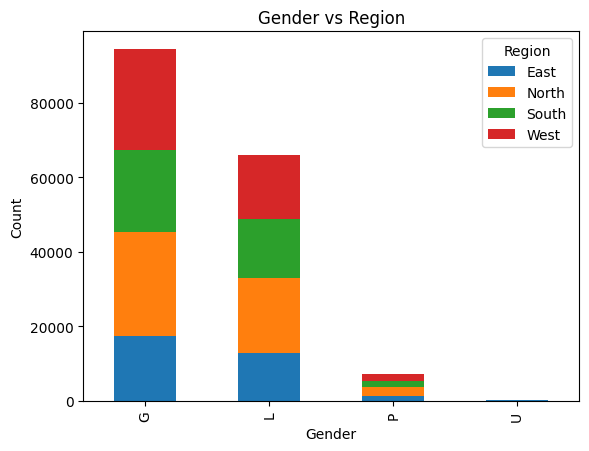

In [ ]:
import matplotlib.pyplot as plt

# Grouping and unstacking the DataFrame
grouped_df = df_23_24_sales_lfs.groupby(['Gender', 'Region']).size().unstack()

# Plotting the grouped DataFrame
grouped_df.plot(kind='bar', stacked=True)

# Set the title and labels
plt.title('Gender vs Region')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()


<Axes: xlabel='Gross UCP', ylabel='Quantity'>

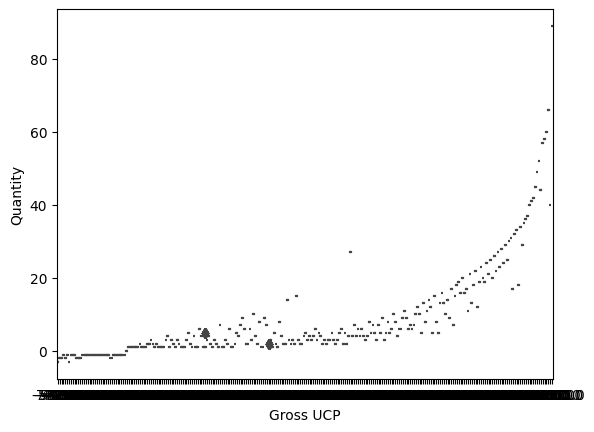

In [ ]:
sns.boxplot(data=df_23_24_sales_lfs, x='Gross UCP', y='Quantity')

<Axes: xlabel='Region', ylabel='Quantity'>

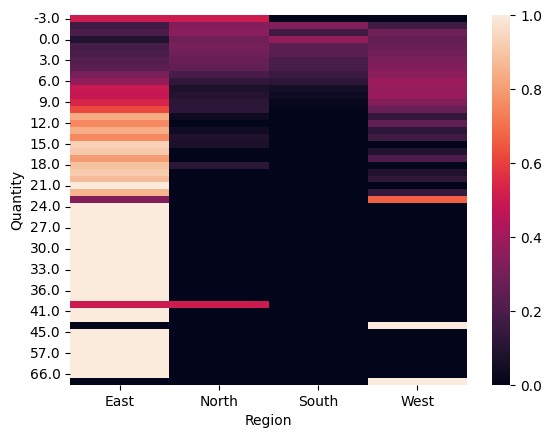

In [ ]:
import pandas as pd
import seaborn as sns

# Create a crosstab with normalization
normalized_crosstab = pd.crosstab(df_23_24_sales_lfs['Quantity'], df_23_24_sales_lfs['Region'], normalize='index')

# Plot heatmap
sns.heatmap(normalized_crosstab)


<Axes: xlabel='Region', ylabel='Gross UCP'>

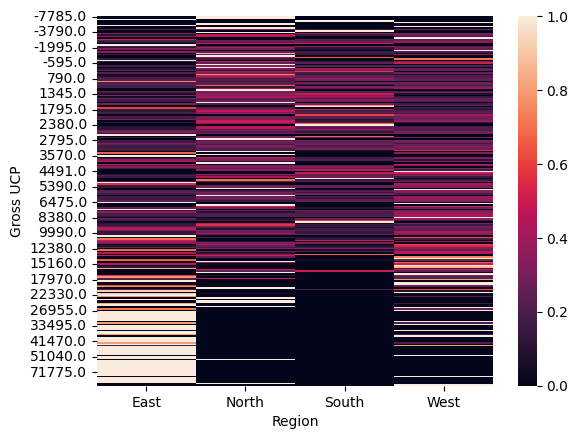

In [ ]:
import pandas as pd
import seaborn as sns

# Create a crosstab with normalization
normalized_crosstab = pd.crosstab(df_23_24_sales_lfs['Gross UCP'], df_23_24_sales_lfs['Region'], normalize='index')

# Plot heatmap
sns.heatmap(normalized_crosstab)


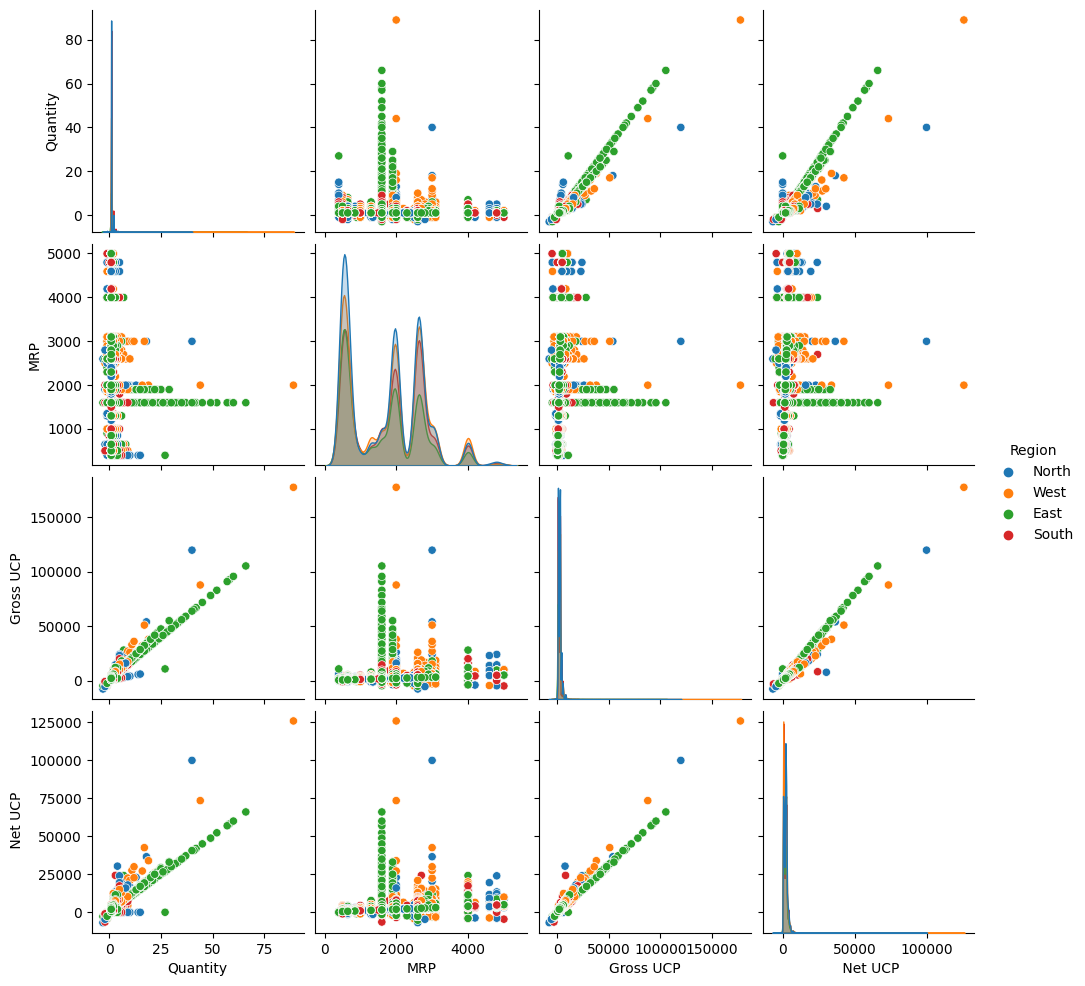

In [ ]:
sns.pairplot(df_23_24_sales_lfs, hue='Region')

In [ ]:
filtered_df = df_23_24_sales_lfs[(df_23_24_sales_lfs['Year'] == '2023-24') & (df_23_24_sales_lfs['Month'] == '2023-04-03')]

In [ ]:
df_23_24_dales_lfs_north = df_23_24_sales_lfs[(df_23_24_sales_lfs['Year'] == '2023-24') & 
                                 (df_23_24_sales_lfs['Region']=='North')]

df_23_24_dales_lfs_north.head()

Year      Month Month Key QTR Region         Invoice Date  \
42915  2023-24 2023-04-01       Apr  Q1  North  2023-04-20 00:00:00   
42916  2023-24 2023-04-01       Apr  Q1  North  2023-04-21 00:00:00   
42917  2023-24 2023-04-01       Apr  Q1  North  2023-04-20 00:00:00   
42918  2023-24 2023-04-01       Apr  Q1  North  2023-04-27 00:00:00   
42919  2023-24 2023-04-01       Apr  Q1  North  2023-04-22 00:00:00   

        Material  Quantity Gender Brand  ... Bill to Party Name   MRP  \
42915  NFFW14PH1       2.0      L    TF  ...  158-SSL-VIJAYWADA  1595   
42916  NEFM14PK1       1.0      G    TF  ...  158-SSL-VIJAYWADA  2495   
42917    FM20PC1       1.0      L    TF  ...  158-SSL-VIJAYWADA  1595   
42918    FM20PC1       1.0      L    TF  ...  158-SSL-VIJAYWADA  1595   
42919  NEFM02PFC       1.0      G    TF  ...  158-SSL-VIJAYWADA  2295   

      Gross UCP  Net UCP  Bill to Party City  ShiptopartyStateCode  Channel-2  \
42915    3190.0   3190.0          VIJAYAWADA        ANDHRA PRADESH        LFS   
42916    2495.0   1995.0          VIJAYAWADA        ANDHRA PRADESH        LFS   
42917    1595.0   1595.0          VIJAYAWADA        ANDHRA PRADESH        LFS   
42918    1595.0   1595.0          VIJAYAWADA        ANDHRA PRADESH        LFS   
42919    2295.0   2295.0          VIJAYAWADA        ANDHRA PRADESH        LFS   

      Billing grp       Varient Name2      Collection  
42915         LFS        Aqua W 30 ml            Aqua  
42916         LFS        Aqua M 90 ml            Aqua  
42917         LFS  Tales M Rio 100 ml     Tales 100ml  
42918         LFS  Tales M Rio 100 ml     Tales 100ml  
42919         LFS        100 M Steele  Classic 100 ml  

[5 rows x 23 columns]

In [ ]:
unique_months = df_23_24_sales_lfs['Month'].unique()
# unique_months.sort_values(ascending=True)
# print(unique_months)
sorted_unique_months = np.sort(unique_months)
# print(sorted_unique_months)

In [ ]:
df_sales_north = df_23_24_dales_lfs_north.copy()
monthly_quantity = df_sales_north.groupby('Month')['Quantity'].sum().reset_index()

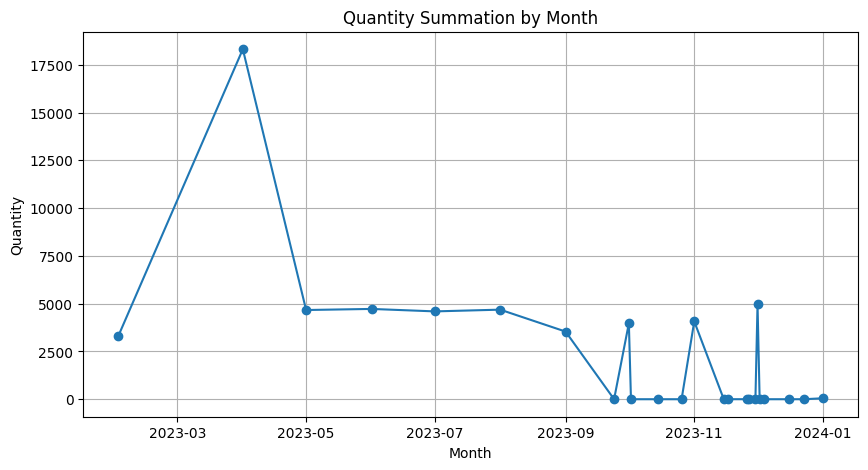

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_quantity['Month'], monthly_quantity['Quantity'], marker='o')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity Summation by Month')
plt.grid(True)
plt.show()

In [ ]:
df_sales_north['Quantity'].sum()

56920.0

In [ ]:
df_23_24_dales_lfs_south = df_23_24_sales_lfs[(df_23_24_sales_lfs['Year'] == '2023-24') & 
                                 (df_23_24_sales_lfs['Region']=='South')]

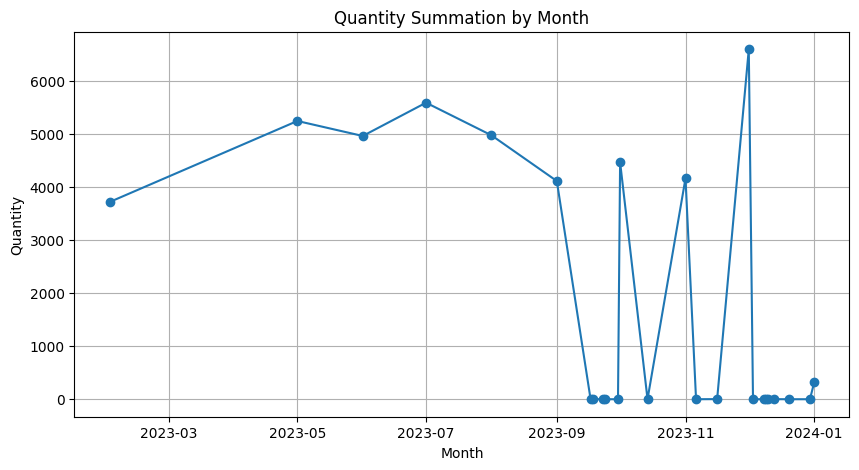

In [ ]:
df_sales_south = df_23_24_dales_lfs_south.copy()
monthly_quantity = df_sales_south.groupby('Month')['Quantity'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(monthly_quantity['Month'], monthly_quantity['Quantity'], marker='o')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity Summation by Month')
plt.grid(True)
plt.show()

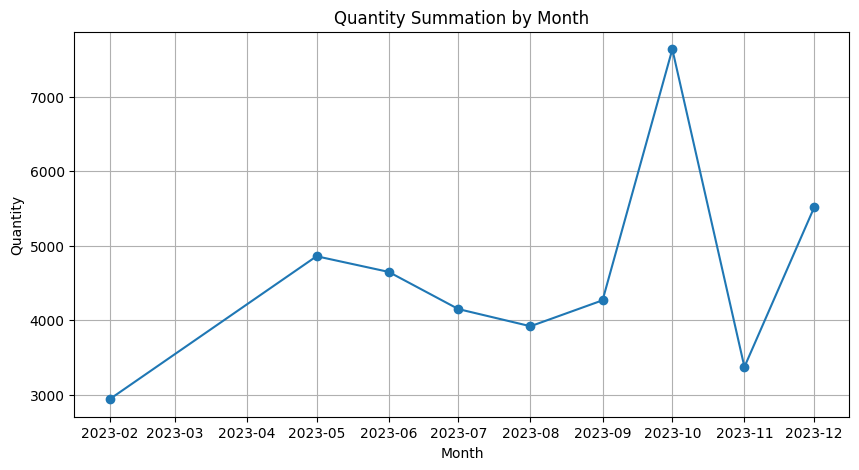

In [ ]:
df_23_24_sales_lfs_east = df_23_24_sales_lfs[(df_23_24_sales_lfs['Year'] == '2023-24') & 
                                 (df_23_24_sales_lfs['Region']=='East')]
df_sales_east = df_23_24_sales_lfs_east.copy()
monthly_quantity = df_sales_east.groupby('Month')['Quantity'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(monthly_quantity['Month'], monthly_quantity['Quantity'], marker='o')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity Summation by Month')
plt.grid(True)
plt.show()

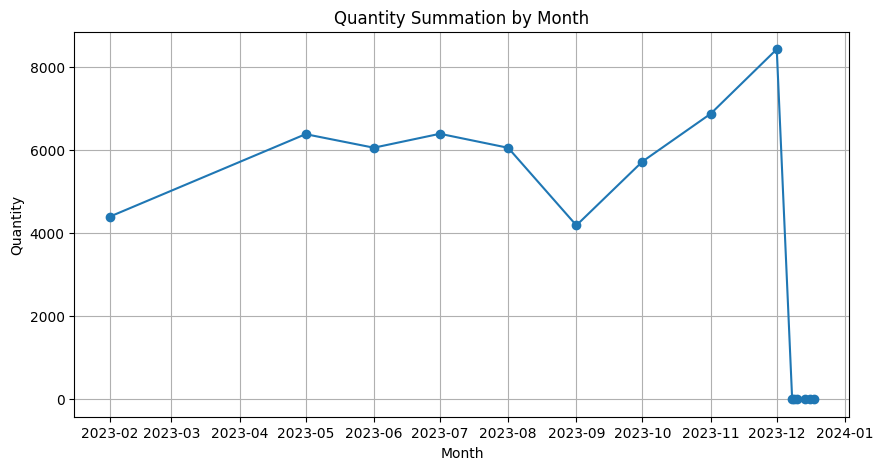

In [ ]:
df_23_24_sales_lfs_west = df_23_24_sales_lfs[(df_23_24_sales_lfs['Year'] == '2023-24') & 
                                 (df_23_24_sales_lfs['Region']=='West')]
df_sales_west = df_23_24_sales_lfs_west.copy()
monthly_quantity = df_sales_west.groupby('Month')['Quantity'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(monthly_quantity['Month'], monthly_quantity['Quantity'], marker='o')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity Summation by Month')
plt.grid(True)
plt.show()

In [ ]:
df_23_24_sales_lfs[
    (df_23_24_sales_lfs['Year'] == '2023-24') & 
    (df_23_24_sales_lfs['Region'] == 'North') & (df_23_24_sales_lfs['Month']=='2023-04-01')
]['Quantity'].sum()

18312.0

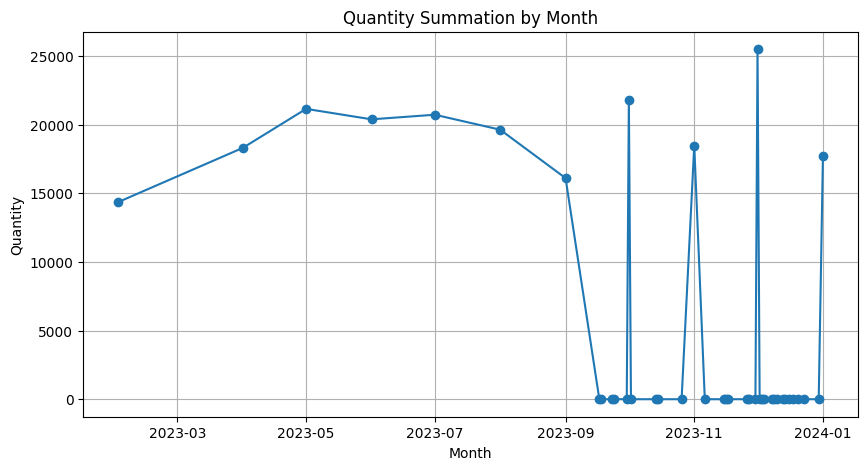

In [ ]:
monthly_quantity = df_23_24_sales_lfs.groupby('Month')['Quantity'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(monthly_quantity['Month'], monthly_quantity['Quantity'], marker='o')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity Summation by Month')
plt.grid(True)
plt.show()

In [ ]:
print(monthly_quantity)

        Month  Quantity
0  2023-02-01   14368.0
1  2023-04-01   18312.0
2  2023-05-01   21153.0
3  2023-06-01   20391.0
4  2023-07-01   20726.0
5  2023-08-01   19635.0
6  2023-09-01   16108.0
7  2023-09-17       2.0
8  2023-09-18       2.0
9  2023-09-23       1.0
10 2023-09-24       2.0
11 2023-09-30       1.0
12 2023-10-01   21801.0
13 2023-10-02       1.0
14 2023-10-14       1.0
15 2023-10-15       1.0
16 2023-10-26       1.0
17 2023-11-01   18481.0
18 2023-11-06       1.0
19 2023-11-15       1.0
20 2023-11-16       3.0
21 2023-11-17       2.0
22 2023-11-26       2.0
23 2023-11-27       2.0
24 2023-11-30       1.0
25 2023-12-01   25498.0
26 2023-12-02       1.0
27 2023-12-03       1.0
28 2023-12-04       1.0
29 2023-12-08       3.0
30 2023-12-09       3.0
31 2023-12-10       3.0
32 2023-12-13       2.0
33 2023-12-14       2.0
34 2023-12-16       2.0
35 2023-12-18       1.0
36 2023-12-20       1.0
37 2023-12-23       1.0
38 2023-12-30       1.0
39 2024-01-01   17694.0


In [ ]:
# Filter the dataframe to keep only the 1st day of each month
monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]

# Display the resulting dataframe
print(monthly_quantity_1st_day)

        Month  Quantity
0  2023-02-01   14368.0
1  2023-04-01   18312.0
2  2023-05-01   21153.0
3  2023-06-01   20391.0
4  2023-07-01   20726.0
5  2023-08-01   19635.0
6  2023-09-01   16108.0
12 2023-10-01   21801.0
17 2023-11-01   18481.0
25 2023-12-01   25498.0
39 2024-01-01   17694.0


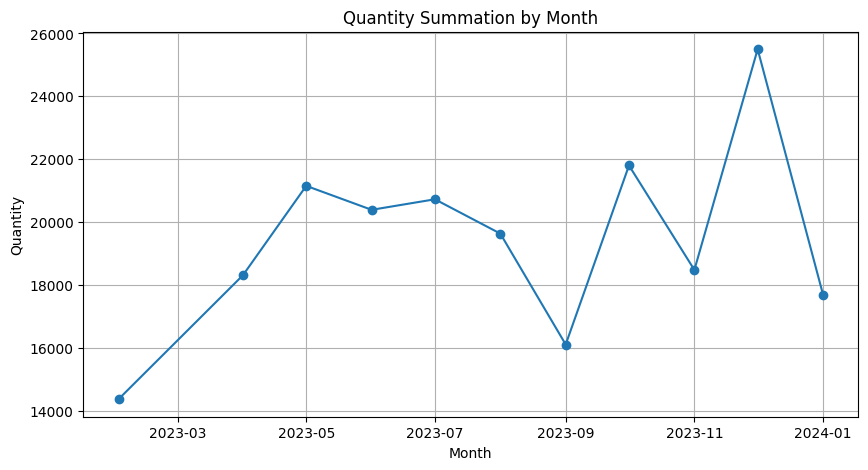

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['Quantity'], marker='o')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity Summation by Month')
plt.grid(True)
plt.show()

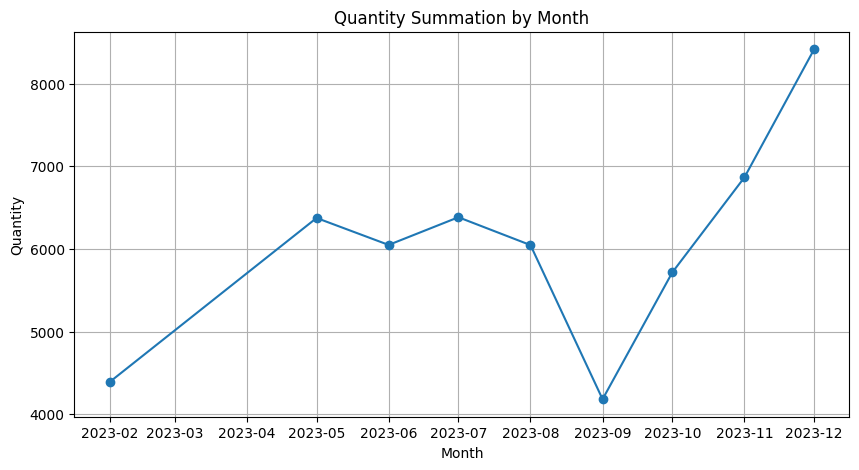

In [ ]:
df_23_24_sales_lfs_west = df_23_24_sales_lfs[(df_23_24_sales_lfs['Year'] == '2023-24') & 
                                 (df_23_24_sales_lfs['Region']=='West')]
df_sales_west = df_23_24_sales_lfs_west.copy()
monthly_quantity = df_sales_west.groupby('Month')['Quantity'].sum().reset_index()
monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]
plt.figure(figsize=(10, 5))
plt.plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['Quantity'], marker='o')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity Summation by Month')
plt.grid(True)
plt.show()

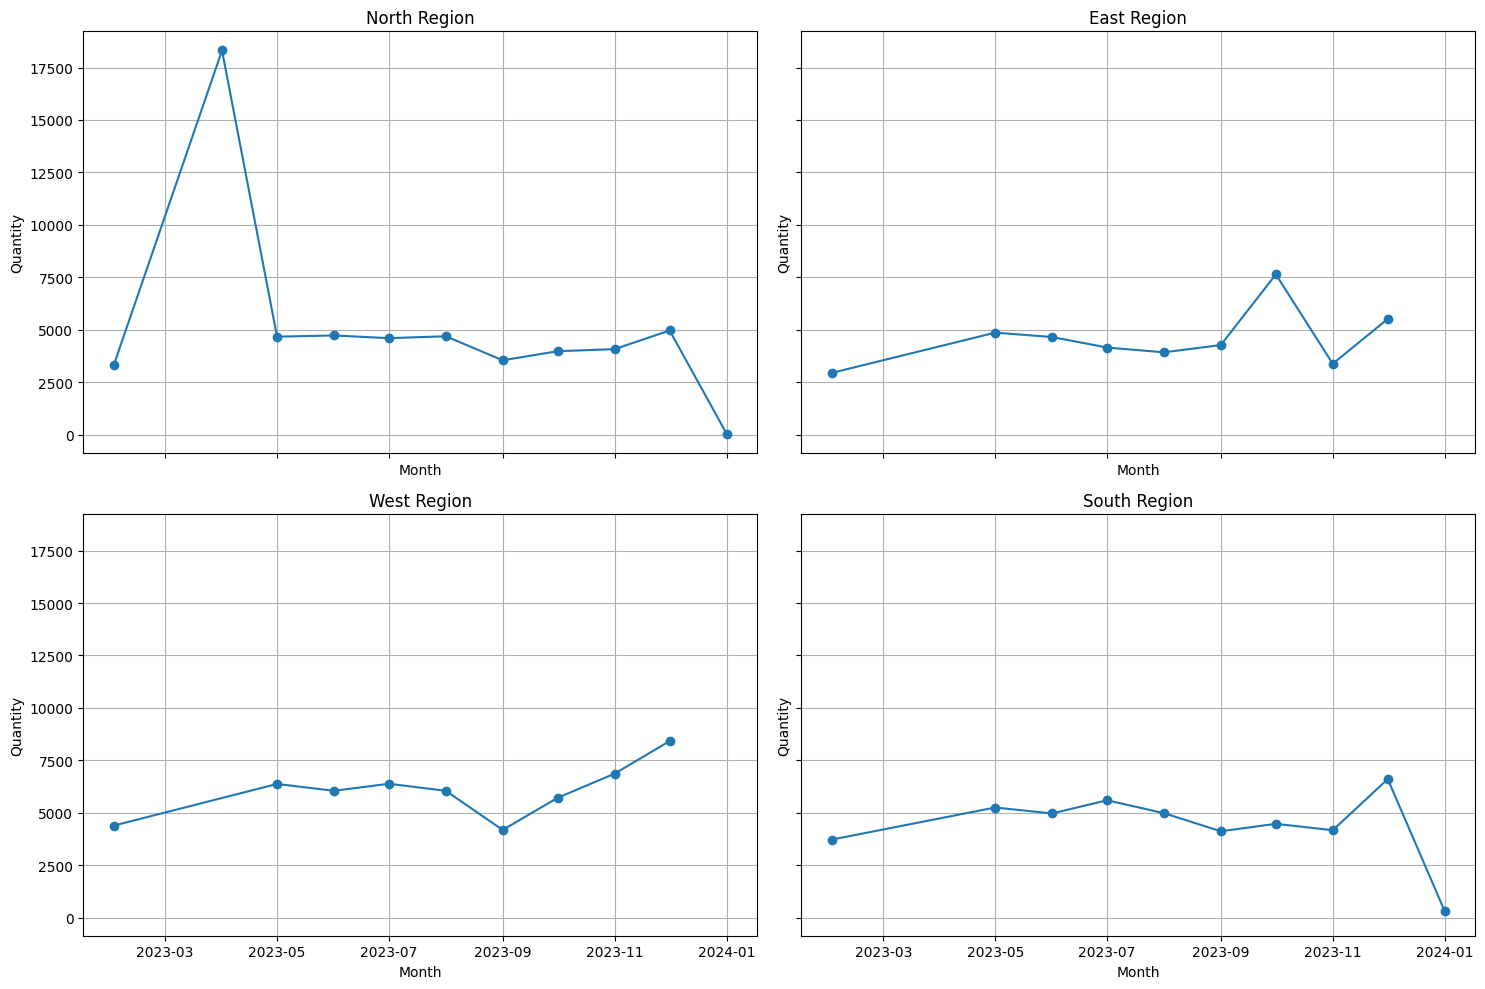

In [ ]:
regions = ["North", "East", "West", "South"]

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i, region in enumerate(regions):
    df_region = df_23_24_sales_lfs[(df_23_24_sales_lfs['Year'] == '2023-24') & 
                                   (df_23_24_sales_lfs['Region'] == region)]
    df_sales_region = df_region.copy()
    monthly_quantity = df_sales_region.groupby('Month')['Quantity'].sum().reset_index()
    monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]
    
    axs[i].plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['Quantity'], marker='o')
    axs[i].set_title(f'{region} Region')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Quantity')
    axs[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

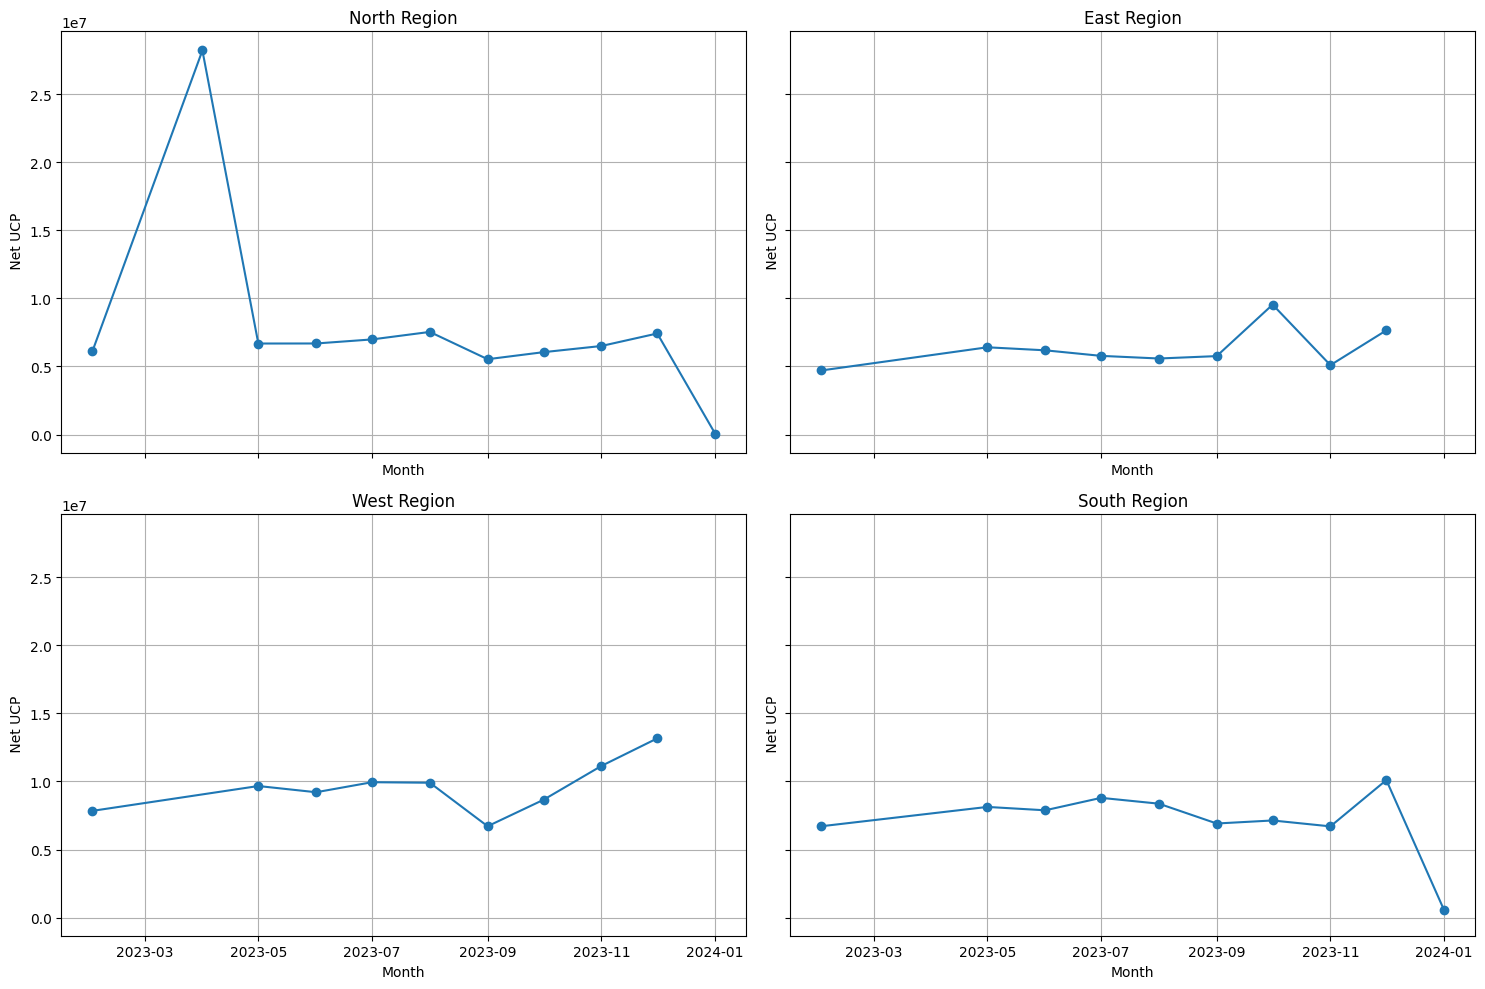

In [ ]:
regions = ["North", "East", "West", "South"]

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i, region in enumerate(regions):
    df_region = df_23_24_sales_lfs[(df_23_24_sales_lfs['Year'] == '2023-24') & 
                                   (df_23_24_sales_lfs['Region'] == region)]
    df_sales_region = df_region.copy()
    monthly_ucp = df_sales_region.groupby('Month')[' Net UCP'].sum().reset_index()
    monthly_ucp_1st_day = monthly_ucp[monthly_ucp['Month'].dt.day == 1]
    
    axs[i].plot(monthly_ucp_1st_day['Month'], monthly_ucp_1st_day[' Net UCP'], marker='o')
    axs[i].set_title(f'{region} Region')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel(' Net UCP')
    axs[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
df_23_24_sales_lfs['Collection'].value_counts()

Collection
Gift Pack           29563
Classic 100 ml      29340
 Premium Deo        25533
Classic 20 ml       24062
Classic 50 ml       13982
Aqua                12519
 Escapade Deo       10273
Escapade             9795
Nox 100 ml           6525
 Deo Bundle Pack     6384
Noura W 100ml        4997
Nox 20 ml            2661
Noura 20 ml          2586
Tales 100ml          2521
Classic Flanker      1270
Fastrack              346
Skinn Mist             15
 Bohemian               2
Name: count, dtype: int64

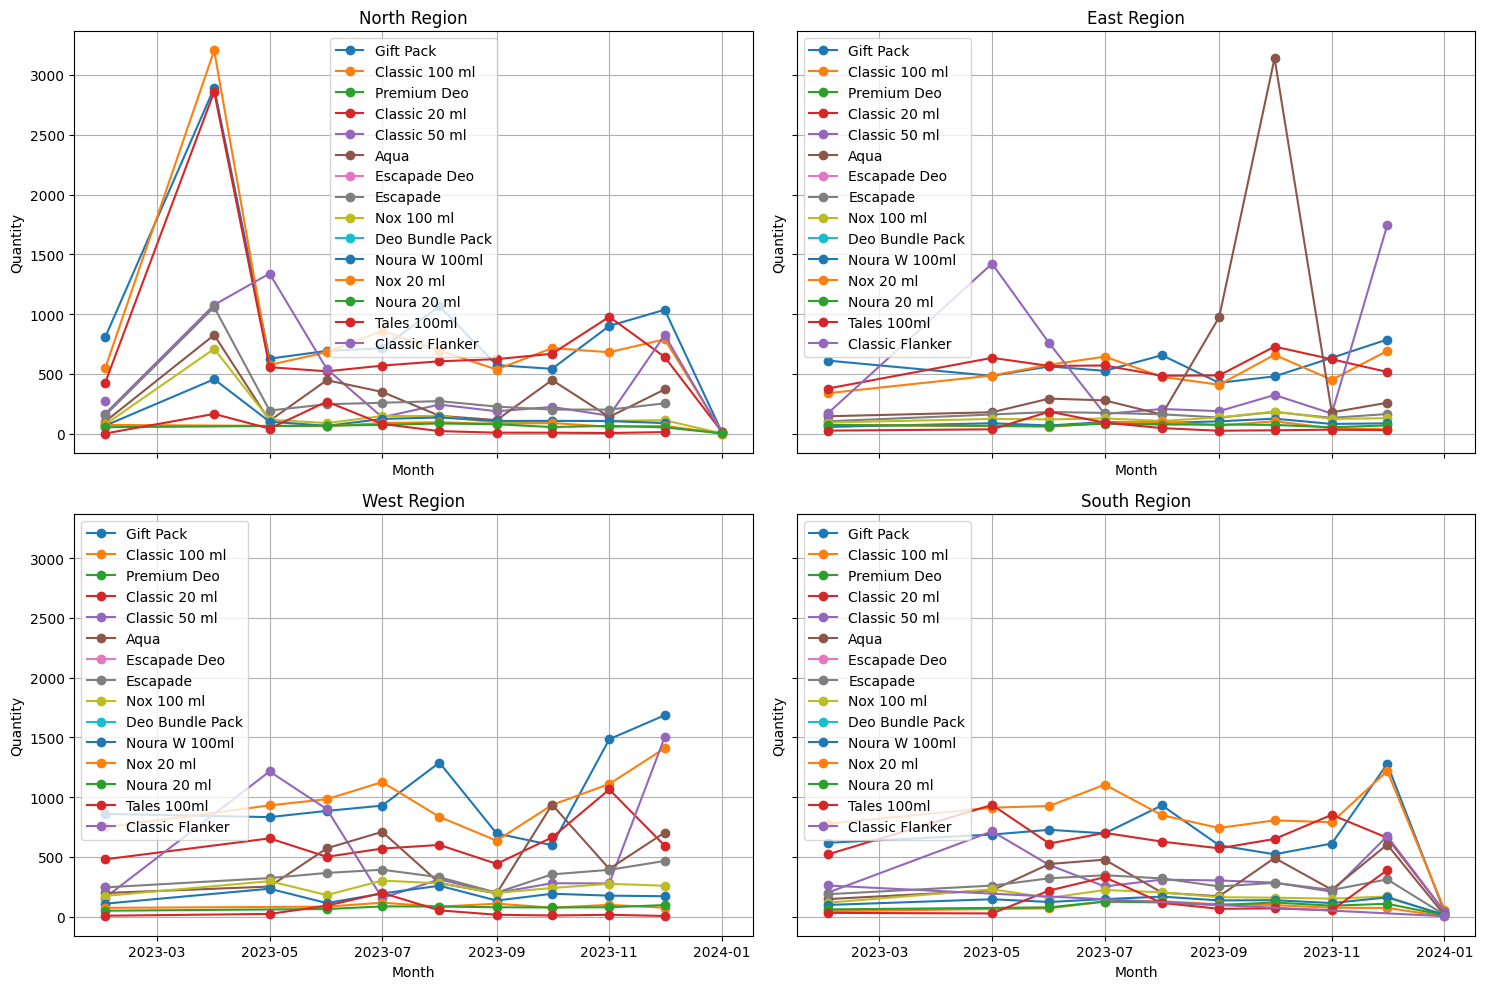

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_23_24_sales_lfs is already defined and loaded with the required data

regions = ["North", "East", "West", "South"]

# Define collections
collections = {
    "Gift Pack": 29563,
    "Classic 100 ml": 29340,
    "Premium Deo": 25533,
    "Classic 20 ml": 24062,
    "Classic 50 ml": 13982,
    "Aqua": 12519,
    "Escapade Deo": 10273,
    "Escapade": 9795,
    "Nox 100 ml": 6525,
    "Deo Bundle Pack": 6384,
    "Noura W 100ml": 4997,
    "Nox 20 ml": 2661,
    "Noura 20 ml": 2586,
    "Tales 100ml": 2521,
    "Classic Flanker": 1270,
    # "Fastrack": 346,
    # "Skinn Mist": 15,
    # "Bohemian": 2
}

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i, region in enumerate(regions):
    for collection, value in collections.items():
        df_region = df_23_24_sales_lfs[(df_23_24_sales_lfs['Year'] == '2023-24') & 
                                       (df_23_24_sales_lfs['Region'] == region) & 
                                       (df_23_24_sales_lfs['Collection'] == collection)]
        df_sales_region = df_region.copy()
        monthly_quantity = df_sales_region.groupby('Month')['Quantity'].sum().reset_index()
        monthly_quantity_1st_day = monthly_quantity[monthly_quantity['Month'].dt.day == 1]
        
        axs[i].plot(monthly_quantity_1st_day['Month'], monthly_quantity_1st_day['Quantity'], marker='o', label=collection)
        axs[i].set_title(f'{region} Region')
        axs[i].set_xlabel('Month')
        axs[i].set_ylabel('Quantity')
        axs[i].grid(True)
        axs[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()
